<a href="https://colab.research.google.com/github/EvansKonadu/AI-Powered-Pneumonia-Detection-in-Low-Resource-Settings/blob/main/EfficientNetB4_NIH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **NIH Dataset Distribution Accross All Pathologies**

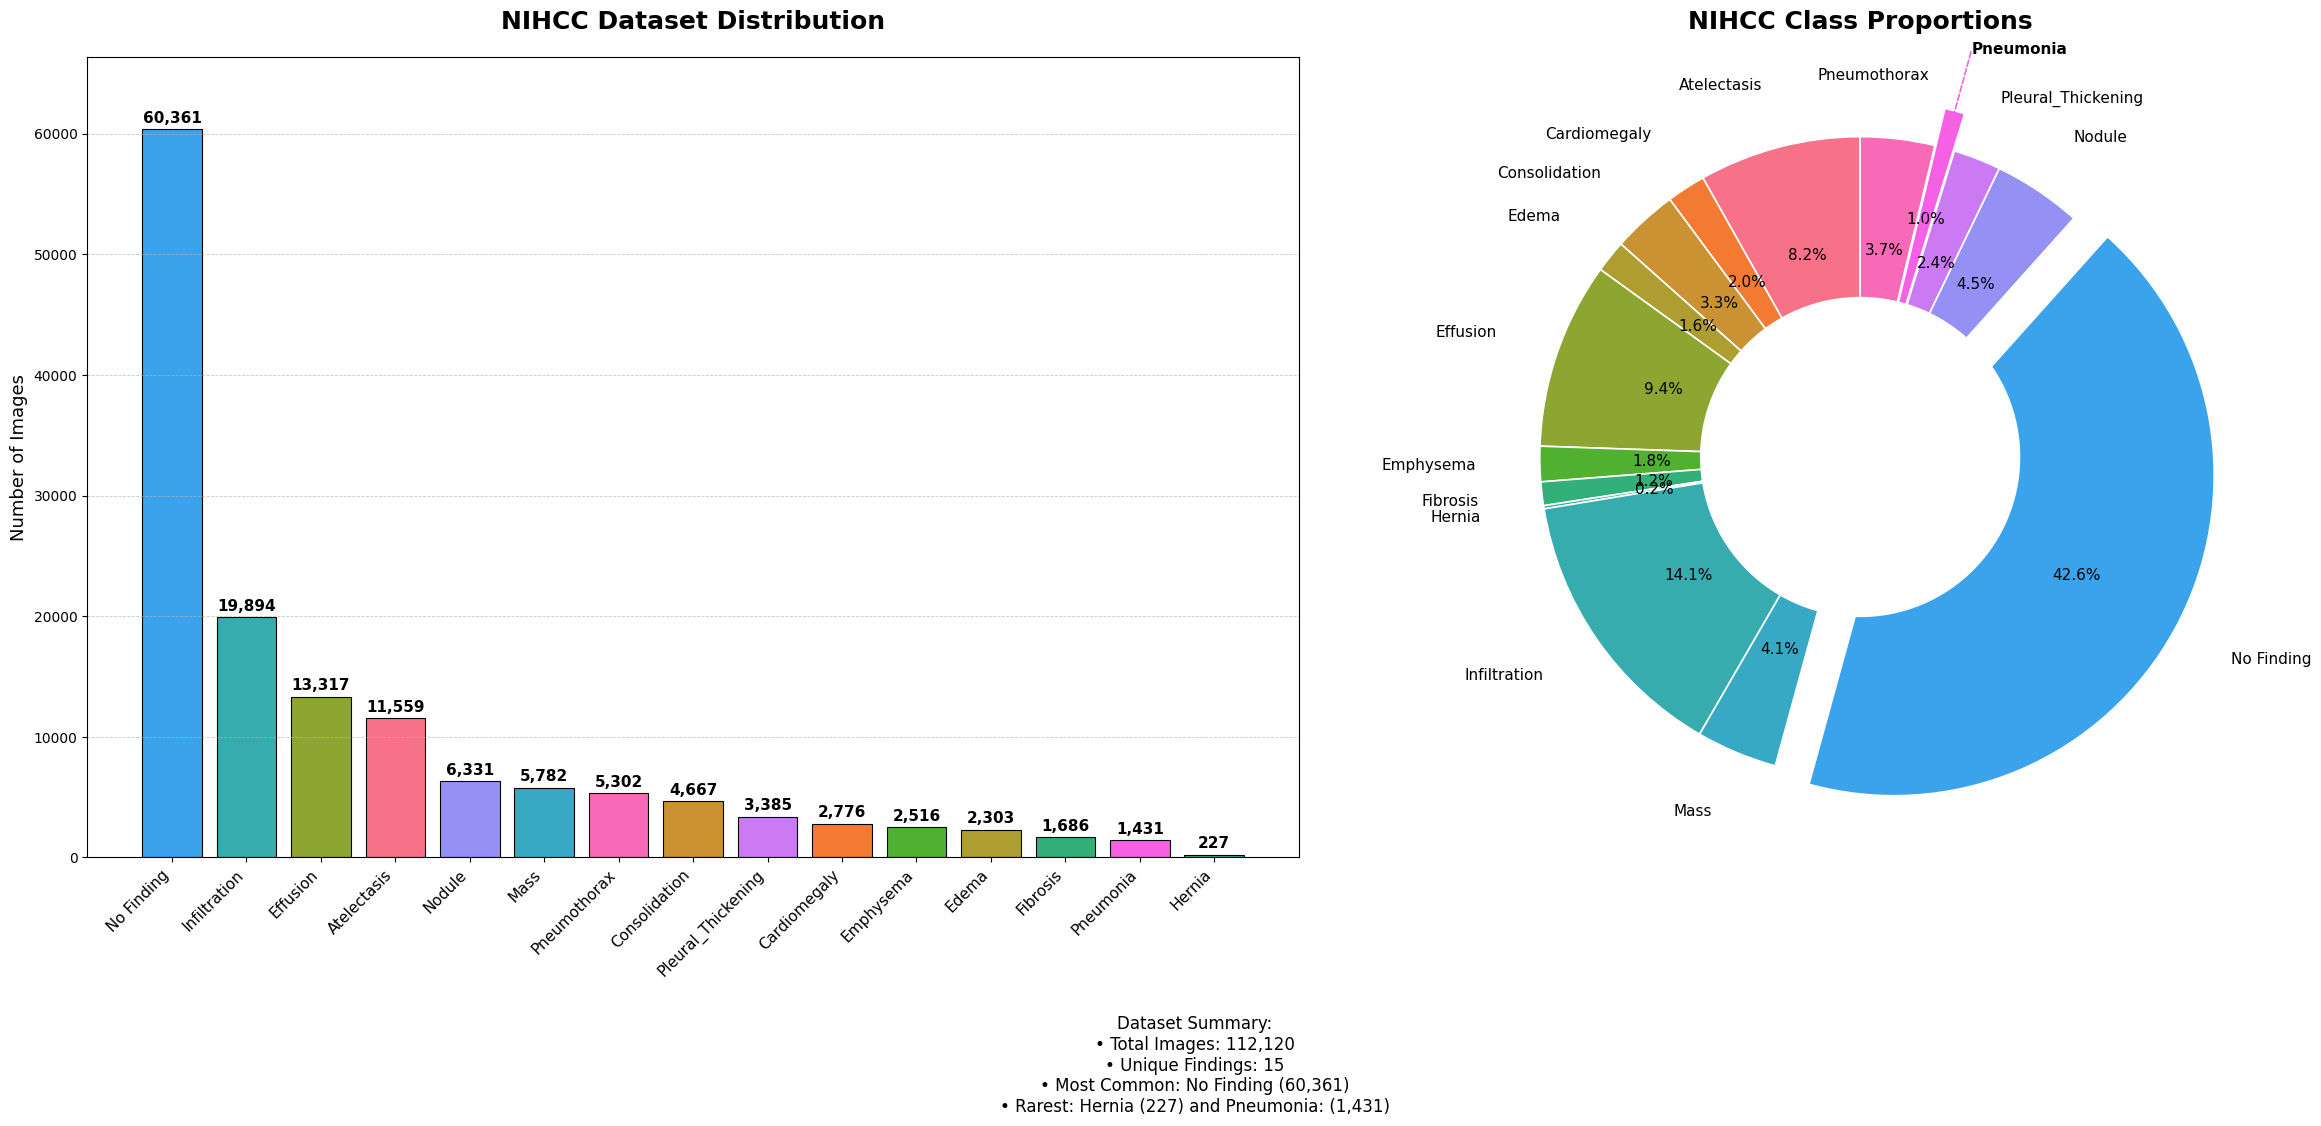

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Adjust this path if needed so it matches where your CSV is in Colab:
csv_path = "/content/drive/MyDrive/NIH_ChestXray/Data_Entry_2017_v2020.csv"


# 1) Read the CSV
df = pd.read_csv(csv_path)

# 2) Extract all unique labels (alphabetical) from “Finding Labels”
all_labels = sorted({
    lab.strip()
    for row in df["Finding Labels"]
    for lab in row.split("|")
})

# 3) Count how many rows contain each label
counts = [int(df["Finding Labels"].str.contains(lbl).sum()) for lbl in all_labels]

# 4) Create a color map so each label has a fixed, truly unique color
#    Using seaborn “husl” palette for 15 distinct, easily distinguishable colors
palette = sns.color_palette("husl", len(all_labels))
color_map = dict(zip(all_labels, palette))

# 5) Prepare sorted lists for the bar chart only (descending by count)
label_count_pairs = sorted(
    zip(all_labels, counts),
    key=lambda x: x[1],
    reverse=True
)
sorted_labels, sorted_counts = zip(*label_count_pairs)

# 6) Create side-by-side subplots
fig, (ax_bar, ax_pie) = plt.subplots(
    1,
    2,
    figsize=(24, 10),
    gridspec_kw={"width_ratios": [1.3, 1]},
)

# 7) BAR CHART on ax_bar (descending order, colors from color_map)
plt.style.use("ggplot")

bar_colors = [color_map[label] for label in sorted_labels]
x_pos = range(len(sorted_labels))
bars = ax_bar.bar(x_pos, sorted_counts, color=bar_colors, edgecolor="black", linewidth=0.8)

# Annotate each bar with its raw count (bold, slightly above)
for bar, cnt in zip(bars, sorted_counts):
    h = bar.get_height()
    ax_bar.text(
        bar.get_x() + bar.get_width() / 2,
        h + max(sorted_counts) * 0.005,
        f"{cnt:,}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

ax_bar.set_xticks(x_pos)
ax_bar.set_xticklabels(sorted_labels, rotation=45, ha="right", fontsize=11)
ax_bar.set_ylabel("Number of Images", fontsize=13)
ax_bar.set_title("NIHCC Dataset Distribution", fontsize=18, fontweight="bold", pad=20)
ax_bar.set_ylim(0, max(sorted_counts) * 1.10)
ax_bar.yaxis.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
ax_bar.xaxis.grid(False)

# 8) PIE CHART on ax_pie (alphabetical order, using same color_map)
explode = [0.0] * len(all_labels)
explode[all_labels.index("Pneumonia")] = 0.12
explode[all_labels.index("No Finding")] = 0.12

pie_colors = [color_map[label] for label in all_labels]
wedges, texts, autotexts = ax_pie.pie(
    counts,
    labels=all_labels,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.65,
    labeldistance=1.2,
    explode=explode,
    colors=pie_colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1.2},
    textprops={"fontsize": 11},
)

ax_pie.set_title("NIHCC Class Proportions", fontsize=18, fontweight="bold", pad=20)
centre_circle = plt.Circle((0, 0), 0.50, fc="white")
ax_pie.add_artist(centre_circle)

# 9) Bold only “Pneumonia” label at its default position
idx_pneum = all_labels.index("Pneumonia")
texts[idx_pneum].set_fontweight("bold")

# 10) Draw a straight dashed line from the Pneumonia wedge to its bold label
mid_angle_pn = (wedges[idx_pneum].theta1 + wedges[idx_pneum].theta2) / 2
angle_rad_pn = np.deg2rad(mid_angle_pn)
x_w_pn, y_w_pn = np.cos(angle_rad_pn) * 0.7, np.sin(angle_rad_pn) * 0.7

x_label_pn, y_label_pn = texts[idx_pneum].get_position()
ax_pie.annotate(
    "",
    xy=(x_w_pn, y_w_pn),
    xytext=(x_label_pn, y_label_pn),
    arrowprops={
        "arrowstyle": "-",
        "linestyle": "--",
        "color": color_map["Pneumonia"],
        "linewidth": 1.2,
        "connectionstyle": "arc3,rad=0"
    },
)

# 11) Shift “Pneumothorax” label left (normal weight) so it sits over its wedge
idx_ptx = all_labels.index("Pneumothorax")
mid_angle_ptx = (wedges[idx_ptx].theta1 + wedges[idx_ptx].theta2) / 2
angle_rad_ptx = np.deg2rad(mid_angle_ptx)
r_ptx_label = 1.2
x_w_ptx, y_w_ptx = np.cos(angle_rad_ptx) * r_ptx_label, np.sin(angle_rad_ptx) * r_ptx_label

# Remove default Pneumothorax text, then add a new one in black
texts[idx_ptx].set_text("")
ax_pie.text(
    x_w_ptx - 0.1,
    y_w_ptx,
    "Pneumothorax",
    ha="center",
    va="center",
    fontsize=11,
    fontweight="normal",
    color="black",
)

# 12) Add summary statistics beneath the combined figure
# Compute summary:
total_images = len(df)
unique_findings = len(all_labels)
label_counts = pd.Series(counts, index=all_labels).sort_values(ascending=False)

most_common = label_counts.index[0]
most_common_count = label_counts.values[0]
rarest = label_counts.index[-1]
rarest_count = label_counts.values[-1]
rarest1 = label_counts.index[-2]
rarest_count1 = label_counts.values[-2]

summary_text = (
    "Dataset Summary:\n"
    f"• Total Images: {total_images:,}\n"
    f"• Unique Findings: {unique_findings}\n"
    f"• Most Common: {most_common} ({most_common_count:,})\n"
    f"• Rarest: {rarest} ({rarest_count:,}) and {rarest1}: ({rarest_count1:,})"
)

# Place summary text centered below both subplots
fig.text(
    0.5, -0.02, summary_text,
    ha="center", va="top", fontsize=12
)

plt.tight_layout()
plt.show()

#### **Visual For Normal Vrs Pneumonia**

In [ ]:
import pandas as pd
import numpy as np
import os
# Paths
csv_path = "/content/drive/MyDrive/NIH_ChestXray/pneumonia_vs_normal_unbalanced.csv"
image_dir = "/content/drive/MyDrive/NIH_ChestXray/images_extracted/images"


# Load and prepare dataset
print("Loading dataset...")
df = pd.read_csv(csv_path)
print("Original dataset size:", len(df))

# Create proper binary labels
df['class'] = df['Finding Labels'].apply(lambda x: 'pneumonia' if 'pneumonia' in x.lower() else 'normal')

# Map filenames to full paths
df['filepath'] = df['Image Index'].apply(lambda x: os.path.join(image_dir, x))

# Verify files exist
df = df[df['filepath'].apply(os.path.exists)]
print("Dataset size after verification:", len(df))

# Compute class counts
class_counts = df['class'].value_counts()
print("\nClass distribution:")
print(class_counts)

Loading dataset...
Original dataset size: 61792
Dataset size after verification: 61790

Class distribution:
class
normal       60359
pneumonia     1431
Name: count, dtype: int64


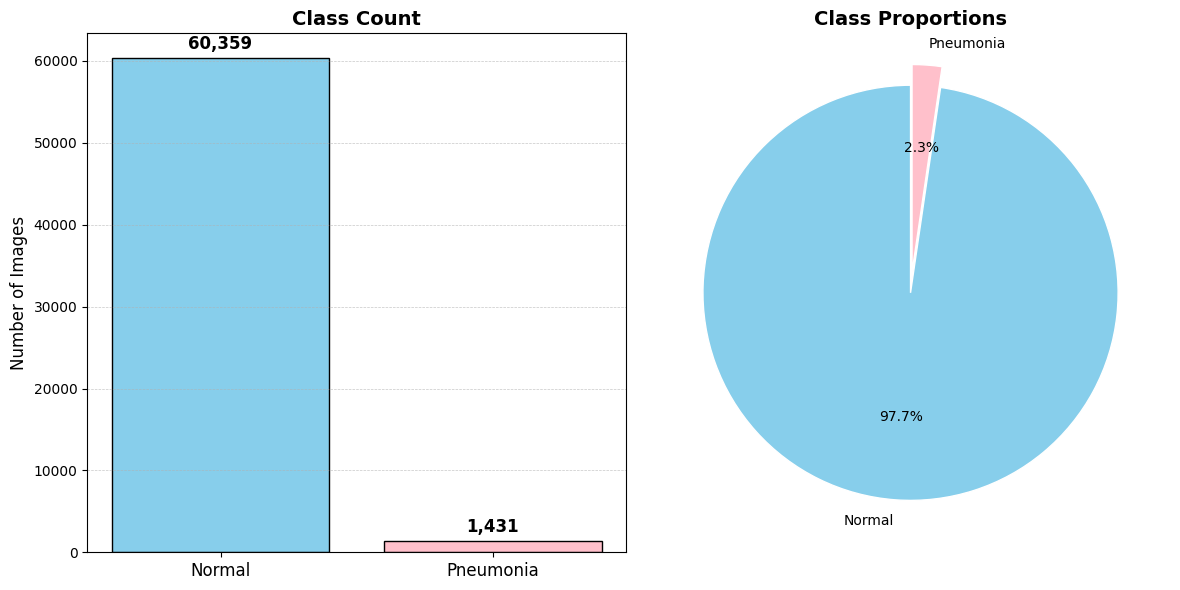

In [ ]:
import matplotlib.pyplot as plt

# Visualization: side-by-side bar & pie

# Define labels and counts in consistent order
labels = ['normal', 'pneumonia']
counts = [class_counts.get('normal', 0), class_counts.get('pneumonia', 0)]

# Color mapping
color_map = {'normal': 'skyblue', 'pneumonia': 'pink'}
bar_colors = [color_map[label] for label in labels]
pie_colors = [color_map[label] for label in labels]

# Create subplots
fig, (ax_bar, ax_pie) = plt.subplots(1, 2, figsize=(12, 6))

# 1) BAR CHART with count annotations
x_pos = range(len(labels))
bars = ax_bar.bar(x_pos, counts, color=bar_colors, edgecolor="black")

for bar, cnt in zip(bars, counts):
    height = bar.get_height()
    ax_bar.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(counts) * 0.01,
        f"{cnt:,}",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold"
    )

ax_bar.set_xticks(x_pos)
ax_bar.set_xticklabels([lbl.capitalize() for lbl in labels], fontsize=12)
ax_bar.set_ylabel("Number of Images", fontsize=12)
ax_bar.set_title("Class Count", fontsize=14, fontweight="bold")
ax_bar.yaxis.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
ax_bar.xaxis.grid(False)

# 2) PIE CHART with percentage annotations and explode pneumonia
explode = [0.0, 0.1]  # explode only the pneumonia slice
ax_pie.pie(
    counts,
    labels=[lbl.capitalize() for lbl in labels],
    autopct="%1.1f%%",
    startangle=90,
    colors=pie_colors,
    explode=explode,
    wedgeprops={"edgecolor": "white", "linewidth": 1}
)
ax_pie.set_title("Class Proportions", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

## **LOADING THE LIBRARIES**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# NIH Dataset paths
train_dir = "/content/drive/MyDrive/NIH_processed/train"
test_dir = "/content/drive/MyDrive/NIH_processed/test"

# Check class imbalance in the NIH dataset
def check_class_imbalance(directory):
    """Check class distribution in the dataset"""
    print(f"Checking class distribution in: {directory}")
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            print(f"  {class_name}: {count} images")
    print()

#### **Preprocessing and Splitting**

In [ ]:
# Check class imbalance
print("NIH Dataset Class Distribution:")
check_class_imbalance(train_dir)
check_class_imbalance(test_dir)

# Define image dimensions and batch size
batch_size = 32
img_size = (224, 224)
seed = 123

# Load datasets with validation split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, label_mode='binary', image_size=img_size,
    batch_size=batch_size, validation_split=0.2, subset='training', shuffle=True, seed=seed
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, label_mode='binary', image_size=img_size,
    batch_size=batch_size, validation_split=0.2, subset='validation', shuffle=True, seed=seed
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, label_mode='binary', image_size=img_size,
    batch_size=batch_size, shuffle=False
)

# Store class names for use in evaluation
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Calculate class weights to handle imbalance
train_counts = {0: 0, 1: 0}
for _, labels in train_ds:
    for label in labels.numpy():
        train_counts[int(label.item())] += 1

total_samples = sum(train_counts.values())
num_classes = len(train_counts)

# Calculate class weights
class_weights = {
    0: total_samples / (num_classes * train_counts[0]),
    1: total_samples / (num_classes * train_counts[1])
}

print("\nCalculated Class Weights:")
print(class_weights)

NIH Dataset Class Distribution:
Checking class distribution in: /content/drive/MyDrive/NIH_processed/train
  normal: 4069 images
  pneumonia: 1251 images

Checking class distribution in: /content/drive/MyDrive/NIH_processed/test
  normal: 1272 images
  pneumonia: 512 images

Found 5320 files belonging to 2 classes.
Using 4256 files for training.
Found 5320 files belonging to 2 classes.
Using 1064 files for validation.
Found 1784 files belonging to 2 classes.
Class names: ['normal', 'pneumonia']

Calculated Class Weights:
{0: 0.6517611026033691, 1: 2.1473259334006056}


In [ ]:
# Define the preprocessing function
def efficientnet_preprocess_fn(x, y):
    return preprocess_input(x), y

# Apply preprocessing to all datasets while preserving class names
train_ds = train_ds.map(efficientnet_preprocess_fn)
val_ds = val_ds.map(efficientnet_preprocess_fn)
test_ds = test_ds.map(efficientnet_preprocess_fn)

# Manually add class_names attribute to the mapped datasets
train_ds.class_names = class_names
val_ds.class_names = class_names
test_ds.class_names = class_names

# Define augmentation for training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest"
)

# Function to apply augmentation to training dataset
def augment_image(image, label):
    # Apply augmentation
    augmented = train_datagen.random_transform(image.numpy())
    return augmented, label

# Apply augmentation only to training dataset
train_ds = train_ds.map(
    lambda x, y: tf.py_function(
        func=augment_image,
        inp=[x, y],
        Tout=[tf.float32, tf.float32]
    )
)

# Ensure the class_names attribute is preserved after augmentation
train_ds.class_names = class_names

### **Model Building**

In [ ]:
from tensorflow.keras.layers import Rescaling
# Build the EfficientNet-B4 model (pretrained on ImageNet)
base_model = EfficientNetB4(include_top=False, weights='imagenet', input_shape=(img_size[0], img_size[1], 3))

### Add preprocessing layers before the base model
# Normalize pixel values
x = Rescaling(1.0 / 255)(base_model.input)

# EfficientNet preprocessing
x = tf.keras.applications.efficientnet.preprocess_input(x * 255.0)


# Connect the base model to the preprocessed input
x = base_model(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 7, 7, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,133,088 (69.17 MB)

 Trainable params: 18,007,881 (68.69 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [ ]:
# Create directory for NIH results
os.makedirs('/content/drive/MyDrive/NIH_models/Results', exist_ok=True)

model_checkpoint_callback_every_epoch = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_{epoch:02d}.h5', # Saves a model at the end of each epoch
    save_best_only=False,
    monitor='val_loss',
    mode='min',
    verbose=1
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15, # Adjust the number of epochs as needed
    callbacks=[model_checkpoint_callback_every_epoch],
    class_weight=class_weights
)

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6363 - loss: 0.6463
Epoch 1: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_01.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 946s 7s/step - accuracy: 0.6365 - loss: 0.6461 - val_accuracy: 0.7707 - val_loss: 0.4749
Epoch 2/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7477 - loss: 0.5015
Epoch 2: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_02.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 856s 6s/step - accuracy: 0.7478 - loss: 0.5013 - val_accuracy: 0.7735 - val_loss: 0.4799
Epoch 3/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8396 - loss: 0.3478
Epoch 3: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_03.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 821s 6s/step - accuracy: 0.8397 - loss: 0.3476 - val_accuracy: 0.7735 - val_loss: 0.5465
Epoch 4/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9047 - loss: 0.2156
Epoch 4: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_04.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 818s 6s/step - accuracy: 0.9047 - loss: 0.2154 - val_accuracy: 0.7754 - val_loss: 0.5859
Epoch 5/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9485 - loss: 0.1227
Epoch 5: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_05.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 789s 6s/step - accuracy: 0.9486 - loss: 0.1227 - val_accuracy: 0.7566 - val_loss: 0.6887
Epoch 6/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9620 - loss: 0.0935
Epoch 6: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_06.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 784s 6s/step - accuracy: 0.9620 - loss: 0.0935 - val_accuracy: 0.7585 - val_loss: 0.7945
Epoch 7/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9666 - loss: 0.0942
Epoch 7: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_07.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 782s 6s/step - accuracy: 0.9666 - loss: 0.0941 - val_accuracy: 0.7829 - val_loss: 0.8924
Epoch 8/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9757 - loss: 0.0648
Epoch 8: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_08.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 871s 7s/step - accuracy: 0.9757 - loss: 0.0648 - val_accuracy: 0.7801 - val_loss: 0.9067
Epoch 9/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9792 - loss: 0.0526
Epoch 9: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_09.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 849s 6s/step - accuracy: 0.9792 - loss: 0.0526 - val_accuracy: 0.7528 - val_loss: 1.0649
Epoch 10/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9802 - loss: 0.0570
Epoch 10: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_10.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 836s 6s/step - accuracy: 0.9802 - loss: 0.0571 - val_accuracy: 0.7669 - val_loss: 0.9179
Epoch 11/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9807 - loss: 0.0568
Epoch 11: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_11.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 852s 6s/step - accuracy: 0.9806 - loss: 0.0568 - val_accuracy: 0.7754 - val_loss: 0.9410
Epoch 12/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9867 - loss: 0.0376
Epoch 12: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_12.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 834s 6s/step - accuracy: 0.9867 - loss: 0.0377 - val_accuracy: 0.7716 - val_loss: 0.9637
Epoch 13/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9854 - loss: 0.0360
Epoch 13: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_13.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 841s 6s/step - accuracy: 0.9854 - loss: 0.0360 - val_accuracy: 0.7650 - val_loss: 1.1919
Epoch 14/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9916 - loss: 0.0227
Epoch 14: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_14.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 816s 6s/step - accuracy: 0.9916 - loss: 0.0227 - val_accuracy: 0.7613 - val_loss: 1.1008
Epoch 15/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9880 - loss: 0.0280
Epoch 15: saving model to /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5


133/133 ━━━━━━━━━━━━━━━━━━━━ 860s 6s/step - accuracy: 0.9880 - loss: 0.0281 - val_accuracy: 0.7876 - val_loss: 1.0363


#### **EVALUATION**


Evaluating model...
56/56 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8881 - loss: 0.4811
Test Accuracy: 86.10%
Test Loss: 0.6920


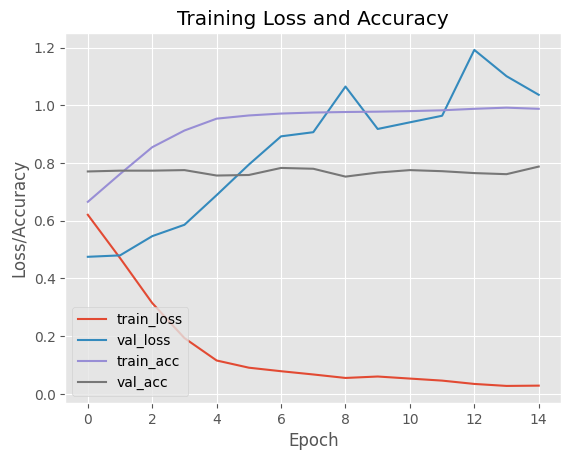

56/56 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step

Classification Report:
              precision    recall  f1-score   support

      normal       0.91      0.89      0.90      1272
   pneumonia       0.74      0.79      0.77       512

    accuracy                           0.86      1784
   macro avg       0.83      0.84      0.83      1784
weighted avg       0.86      0.86      0.86      1784


Confusion Matrix:
[[1132  140]
 [ 108  404]]
Accuracy: 0.8610
Sensitivity: 0.7891
Specificity: 0.8899


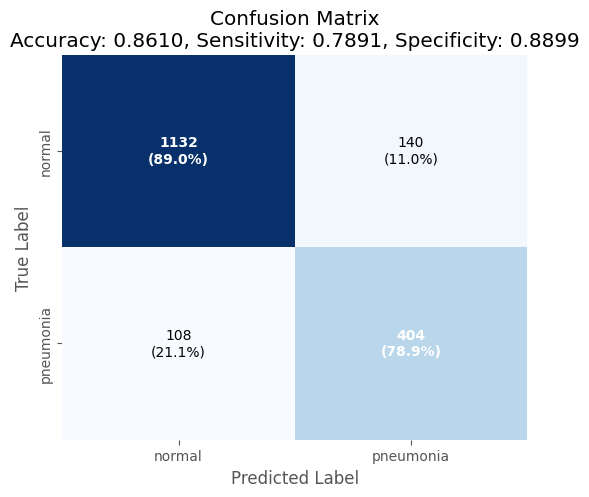

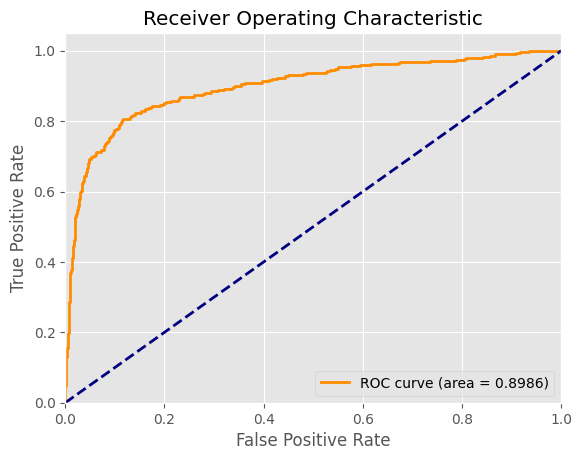

In [ ]:
# Evaluate model
print("\nEvaluating model...")
# Use model.evaluate on the test_ds dataset
test_results = model.evaluate(test_ds)
print("Test Accuracy: {:.2f}%".format(test_results[1] * 100))
print("Test Loss: {:.4f}".format(test_results[0]))

# Plot training history (Loss and Accuracy)
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history["loss"])), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(history.history["val_loss"])), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, len(history.history["accuracy"])), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, len(history.history["val_accuracy"])), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

# Predictions
# Get true labels and predictions from the test dataset
true_labels = np.concatenate([y for x, y in test_ds], axis=0)
predictions = model.predict(test_ds)

# Convert probabilities to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

print("\nClassification Report:")
# Get class names from the test dataset
class_names = test_ds.class_names
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
# Calculate Sensitivity and Specificity
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0

print("\nConfusion Matrix:")
print(cm)
print("Accuracy: {:.4f}".format(acc))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))

# Plot confusion matrix with class-wise percentages
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names,
                cbar=False)

# Add annotations with counts and class-wise percentages
for i in range(cm.shape[0]):
    row_sum = cm[i, :].sum()
    for j in range(cm.shape[1]):
        percentage = (cm[i, j] / row_sum) * 100 if row_sum > 0 else 0
        is_correct = (i == j)
        text = f"{cm[i, j]}\n({percentage:.1f}%)"
        ax.text(j + 0.5, i + 0.5, text,
               ha='center', va='center',
               color='white' if is_correct else 'black',
               weight='bold' if is_correct else 'normal')

plt.title(f'Confusion Matrix\nAccuracy: {acc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC
# For binary classification with sigmoid output, roc_curve expects true labels and prediction probabilities
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### **Evaluate from all saved epochs**

Evaluating each saved epoch on the test dataset...



--- Evaluating EffNetB4_epoch_01.h5 ---
Test Loss: 0.5009, Test Accuracy: 0.7550
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.8019    0.8719    0.8354      1272
   pneumonia     0.5935    0.4648    0.5214       512

    accuracy                         0.7550      1784
   macro avg     0.6977    0.6683    0.6784      1784
weighted avg     0.7421    0.7550    0.7453      1784


Confusion Matrix:
[[1109  163]
 [ 274  238]]
Accuracy: 0.7550
Sensitivity: 0.4648
Specificity: 0.8719
Pneumonia Precision: 0.5935
Pneumonia F1-score: 0.5214


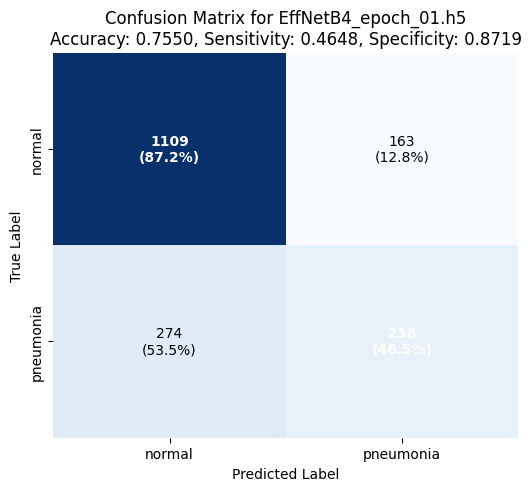


ROC AUC Score: 0.7827


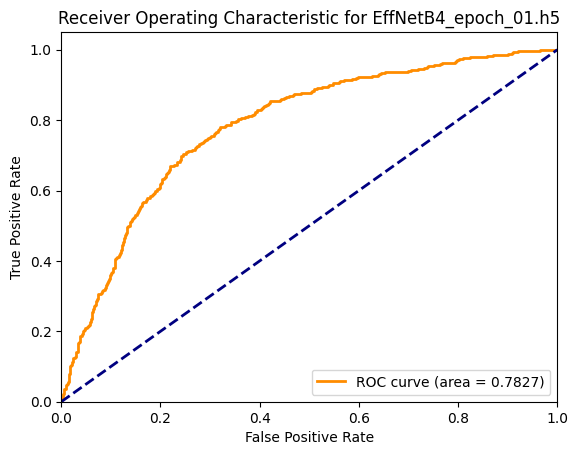


--- Evaluating EffNetB4_epoch_02.h5 ---
Test Loss: 0.4819, Test Accuracy: 0.7741
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.8397    0.8443    0.8420      1272
   pneumonia     0.6079    0.5996    0.6037       512

    accuracy                         0.7741      1784
   macro avg     0.7238    0.7220    0.7229      1784
weighted avg     0.7732    0.7741    0.7736      1784


Confusion Matrix:
[[1074  198]
 [ 205  307]]
Accuracy: 0.7741
Sensitivity: 0.5996
Specificity: 0.8443
Pneumonia Precision: 0.6079
Pneumonia F1-score: 0.6037


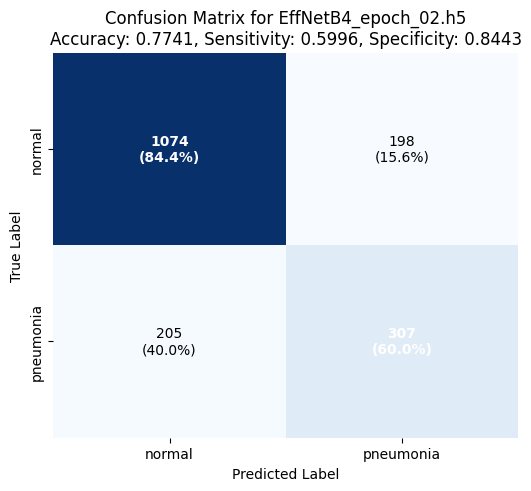


ROC AUC Score: 0.8115


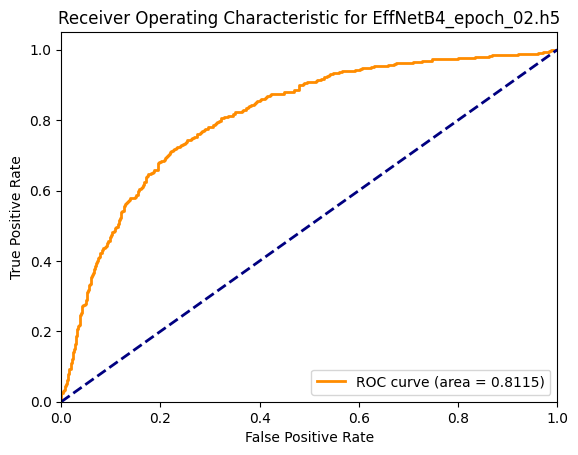


--- Evaluating EffNetB4_epoch_03.h5 ---
Test Loss: 0.4910, Test Accuracy: 0.7971
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.8473    0.8726    0.8598      1272
   pneumonia     0.6582    0.6094    0.6329       512

    accuracy                         0.7971      1784
   macro avg     0.7528    0.7410    0.7463      1784
weighted avg     0.7931    0.7971    0.7947      1784


Confusion Matrix:
[[1110  162]
 [ 200  312]]
Accuracy: 0.7971
Sensitivity: 0.6094
Specificity: 0.8726
Pneumonia Precision: 0.6582
Pneumonia F1-score: 0.6329


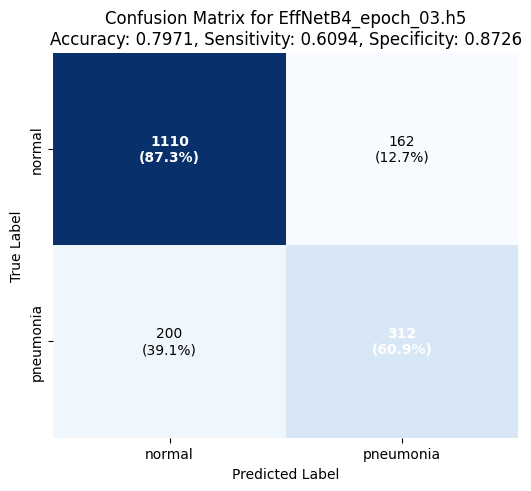


ROC AUC Score: 0.8326


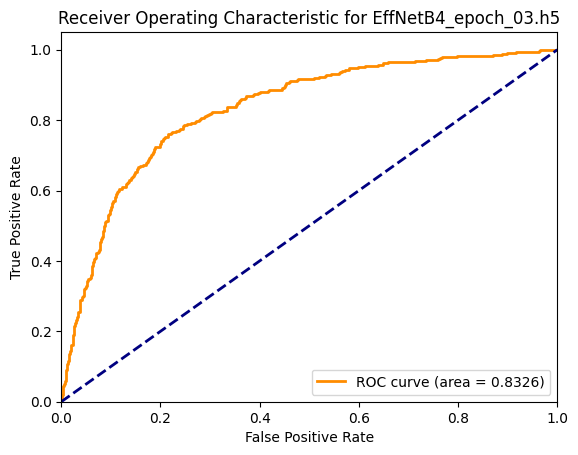


--- Evaluating EffNetB4_epoch_04.h5 ---
Test Loss: 0.4735, Test Accuracy: 0.8223
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.8733    0.8781    0.8757      1272
   pneumonia     0.6931    0.6836    0.6883       512

    accuracy                         0.8223      1784
   macro avg     0.7832    0.7809    0.7820      1784
weighted avg     0.8216    0.8223    0.8219      1784


Confusion Matrix:
[[1117  155]
 [ 162  350]]
Accuracy: 0.8223
Sensitivity: 0.6836
Specificity: 0.8781
Pneumonia Precision: 0.6931
Pneumonia F1-score: 0.6883


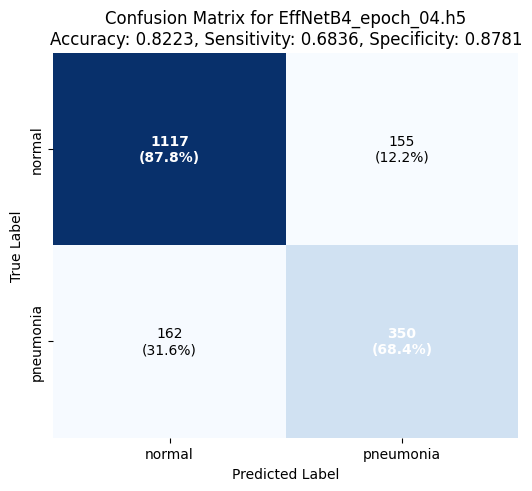


ROC AUC Score: 0.8681


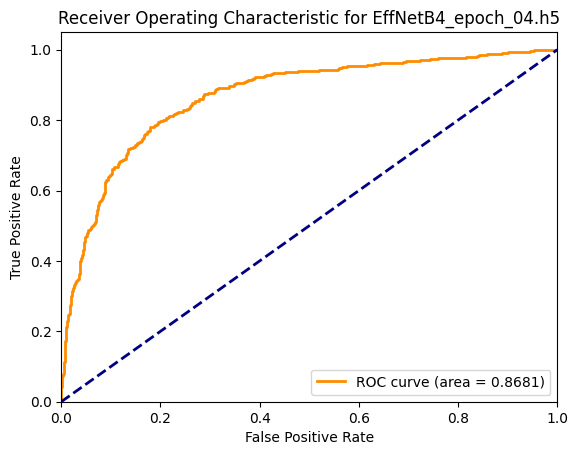


--- Evaluating EffNetB4_epoch_05.h5 ---
Test Loss: 0.5199, Test Accuracy: 0.8201
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9013    0.8396    0.8694      1272
   pneumonia     0.6594    0.7715    0.7111       512

    accuracy                         0.8201      1784
   macro avg     0.7803    0.8056    0.7902      1784
weighted avg     0.8319    0.8201    0.8239      1784


Confusion Matrix:
[[1068  204]
 [ 117  395]]
Accuracy: 0.8201
Sensitivity: 0.7715
Specificity: 0.8396
Pneumonia Precision: 0.6594
Pneumonia F1-score: 0.7111


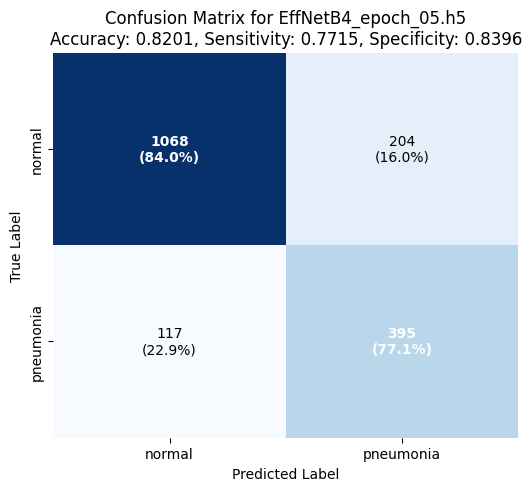


ROC AUC Score: 0.8784


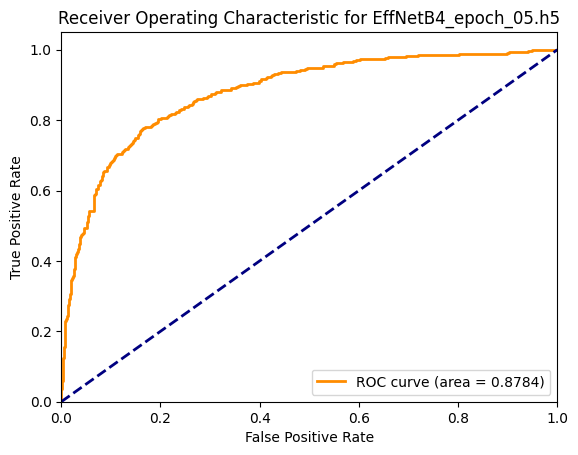


--- Evaluating EffNetB4_epoch_06.h5 ---
Test Loss: 0.5156, Test Accuracy: 0.8436
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.8994    0.8789    0.8891      1272
   pneumonia     0.7153    0.7559    0.7350       512

    accuracy                         0.8436      1784
   macro avg     0.8074    0.8174    0.8121      1784
weighted avg     0.8466    0.8436    0.8449      1784


Confusion Matrix:
[[1118  154]
 [ 125  387]]
Accuracy: 0.8436
Sensitivity: 0.7559
Specificity: 0.8789
Pneumonia Precision: 0.7153
Pneumonia F1-score: 0.7350


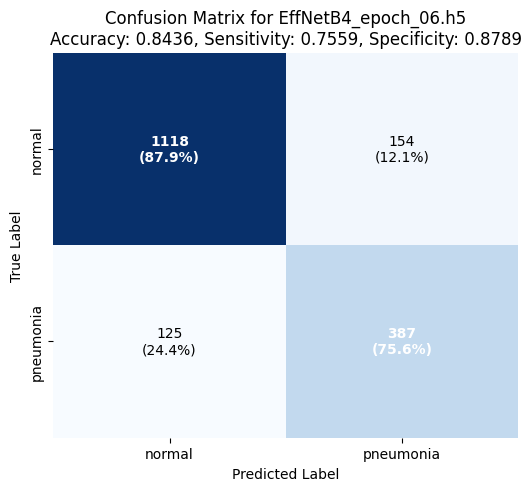


ROC AUC Score: 0.8922


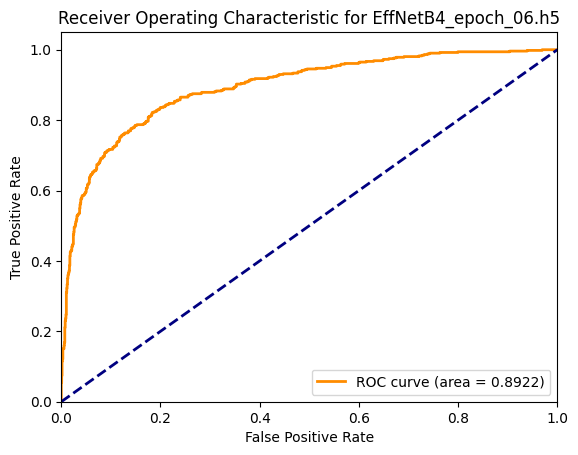


--- Evaluating EffNetB4_epoch_07.h5 ---
Test Loss: 0.5575, Test Accuracy: 0.8627
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.8990    0.9096    0.9043      1272
   pneumonia     0.7686    0.7461    0.7572       512

    accuracy                         0.8627      1784
   macro avg     0.8338    0.8278    0.8307      1784
weighted avg     0.8616    0.8627    0.8620      1784


Confusion Matrix:
[[1157  115]
 [ 130  382]]
Accuracy: 0.8627
Sensitivity: 0.7461
Specificity: 0.9096
Pneumonia Precision: 0.7686
Pneumonia F1-score: 0.7572


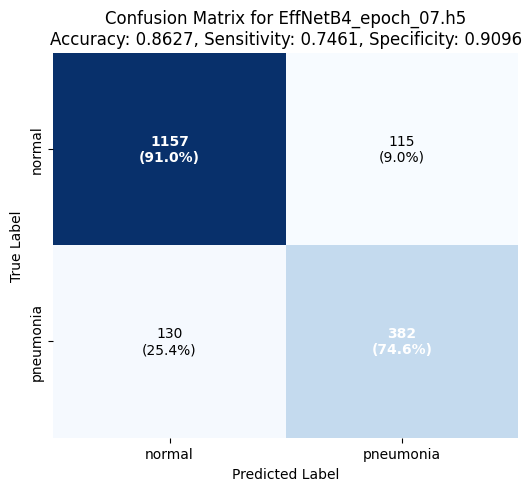


ROC AUC Score: 0.8995


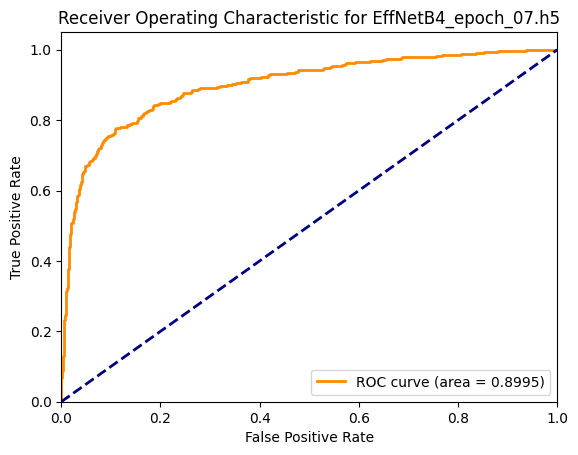


--- Evaluating EffNetB4_epoch_08.h5 ---
Test Loss: 0.6737, Test Accuracy: 0.8369
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9146    0.8506    0.8815      1272
   pneumonia     0.6839    0.8027    0.7385       512

    accuracy                         0.8369      1784
   macro avg     0.7992    0.8267    0.8100      1784
weighted avg     0.8484    0.8369    0.8404      1784


Confusion Matrix:
[[1082  190]
 [ 101  411]]
Accuracy: 0.8369
Sensitivity: 0.8027
Specificity: 0.8506
Pneumonia Precision: 0.6839
Pneumonia F1-score: 0.7385


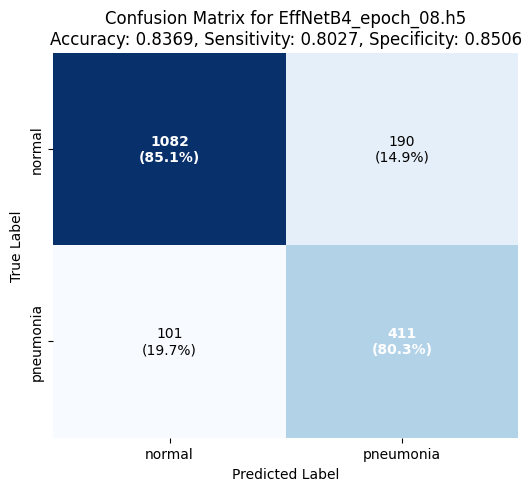


ROC AUC Score: 0.8931


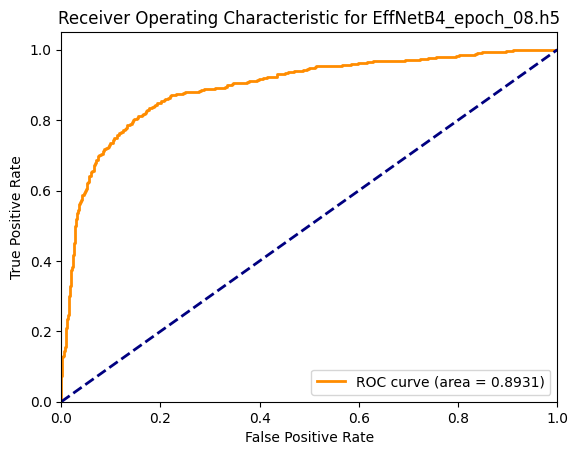


--- Evaluating EffNetB4_epoch_09.h5 ---
Test Loss: 0.8044, Test Accuracy: 0.8077
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9289    0.7909    0.8544      1272
   pneumonia     0.6205    0.8496    0.7172       512

    accuracy                         0.8077      1784
   macro avg     0.7747    0.8202    0.7858      1784
weighted avg     0.8404    0.8077    0.8150      1784


Confusion Matrix:
[[1006  266]
 [  77  435]]
Accuracy: 0.8077
Sensitivity: 0.8496
Specificity: 0.7909
Pneumonia Precision: 0.6205
Pneumonia F1-score: 0.7172


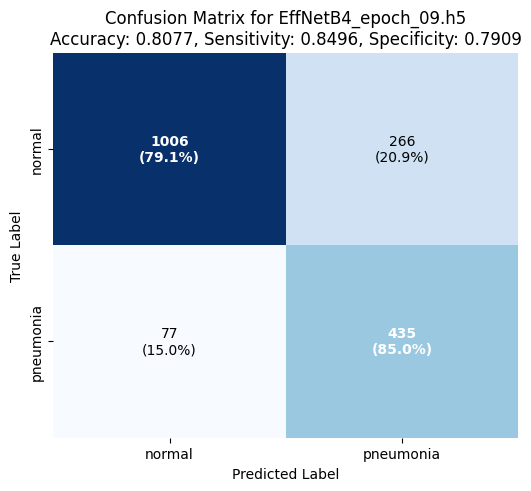


ROC AUC Score: 0.8987


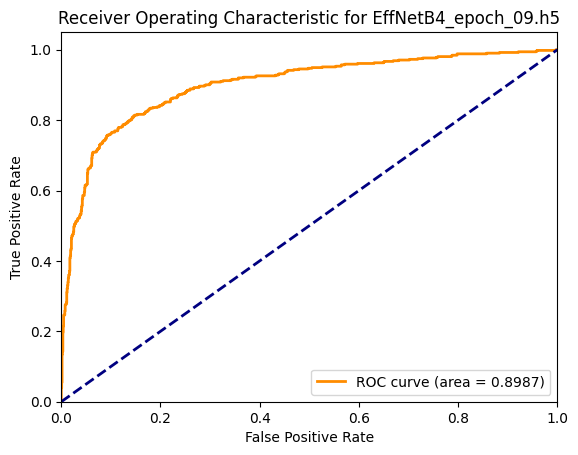


--- Evaluating EffNetB4_epoch_10.h5 ---
Test Loss: 0.6613, Test Accuracy: 0.8290
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9223    0.8302    0.8738      1272
   pneumonia     0.6620    0.8262    0.7350       512

    accuracy                         0.8290      1784
   macro avg     0.7921    0.8282    0.8044      1784
weighted avg     0.8476    0.8290    0.8340      1784


Confusion Matrix:
[[1056  216]
 [  89  423]]
Accuracy: 0.8290
Sensitivity: 0.8262
Specificity: 0.8302
Pneumonia Precision: 0.6620
Pneumonia F1-score: 0.7350


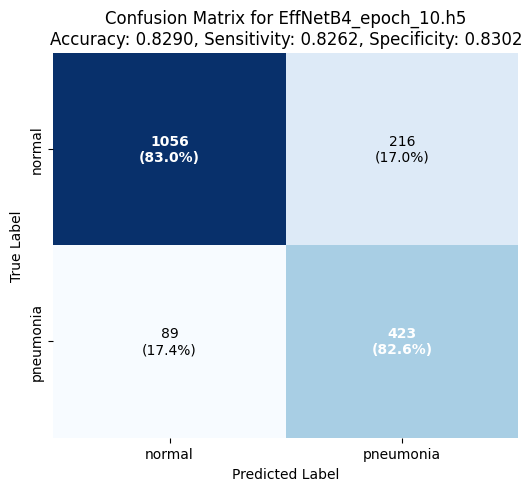


ROC AUC Score: 0.9012


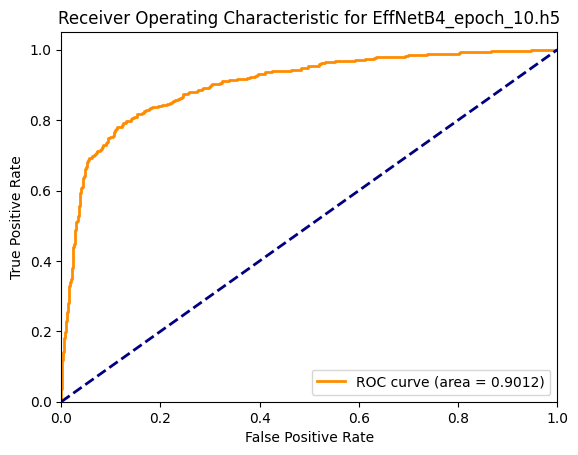


--- Evaluating EffNetB4_epoch_11.h5 ---
Test Loss: 0.6783, Test Accuracy: 0.8324
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9155    0.8428    0.8776      1272
   pneumonia     0.6737    0.8066    0.7342       512

    accuracy                         0.8324      1784
   macro avg     0.7946    0.8247    0.8059      1784
weighted avg     0.8461    0.8324    0.8365      1784


Confusion Matrix:
[[1072  200]
 [  99  413]]
Accuracy: 0.8324
Sensitivity: 0.8066
Specificity: 0.8428
Pneumonia Precision: 0.6737
Pneumonia F1-score: 0.7342


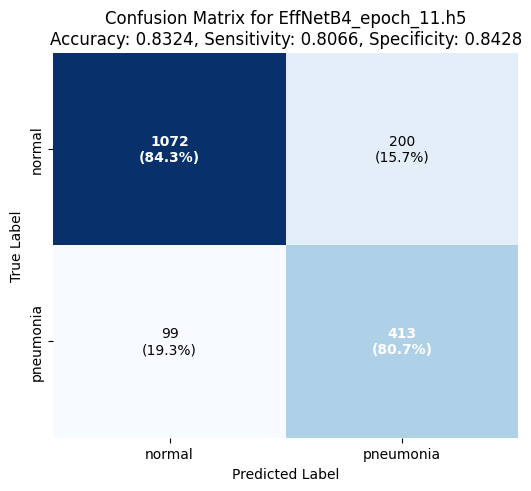


ROC AUC Score: 0.9032


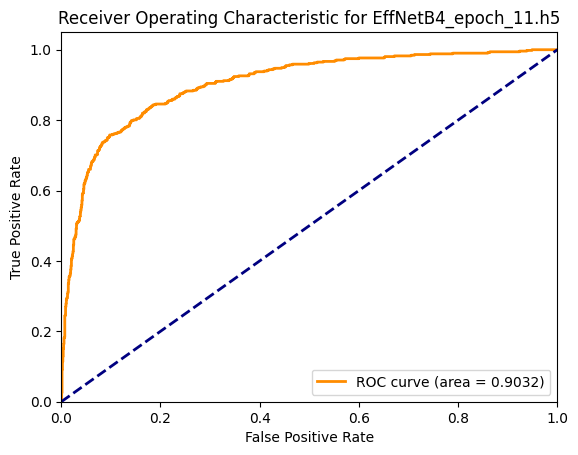


--- Evaluating EffNetB4_epoch_12.h5 ---
Test Loss: 0.6733, Test Accuracy: 0.8554
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9076    0.8876    0.8975      1272
   pneumonia     0.7352    0.7754    0.7548       512

    accuracy                         0.8554      1784
   macro avg     0.8214    0.8315    0.8261      1784
weighted avg     0.8581    0.8554    0.8565      1784


Confusion Matrix:
[[1129  143]
 [ 115  397]]
Accuracy: 0.8554
Sensitivity: 0.7754
Specificity: 0.8876
Pneumonia Precision: 0.7352
Pneumonia F1-score: 0.7548


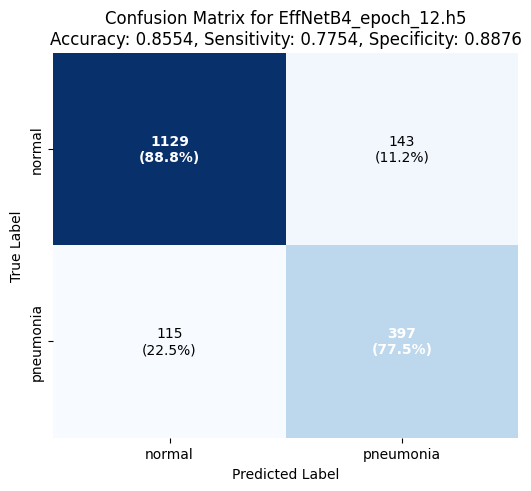


ROC AUC Score: 0.8963


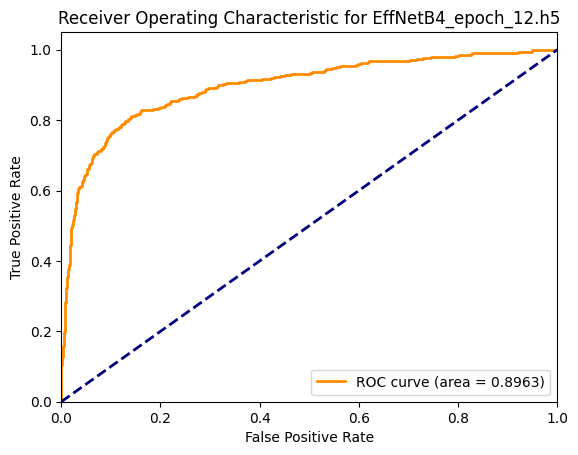


--- Evaluating EffNetB4_epoch_13.h5 ---
Test Loss: 0.8224, Test Accuracy: 0.8302
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9261    0.8278    0.8742      1272
   pneumonia     0.6615    0.8359    0.7386       512

    accuracy                         0.8302      1784
   macro avg     0.7938    0.8319    0.8064      1784
weighted avg     0.8502    0.8302    0.8353      1784


Confusion Matrix:
[[1053  219]
 [  84  428]]
Accuracy: 0.8302
Sensitivity: 0.8359
Specificity: 0.8278
Pneumonia Precision: 0.6615
Pneumonia F1-score: 0.7386


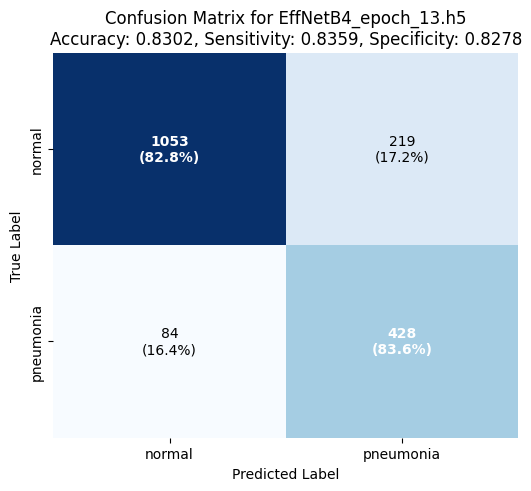


ROC AUC Score: 0.9010


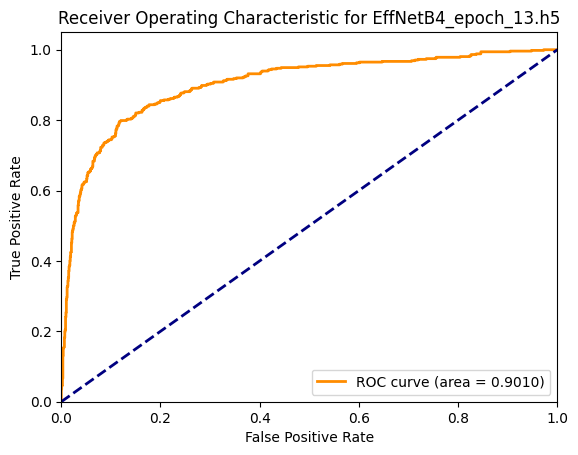


--- Evaluating EffNetB4_epoch_14.h5 ---
Test Loss: 0.7477, Test Accuracy: 0.8369
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9189    0.8459    0.8809      1272
   pneumonia     0.6803    0.8145    0.7413       512

    accuracy                         0.8369      1784
   macro avg     0.7996    0.8302    0.8111      1784
weighted avg     0.8504    0.8369    0.8408      1784


Confusion Matrix:
[[1076  196]
 [  95  417]]
Accuracy: 0.8369
Sensitivity: 0.8145
Specificity: 0.8459
Pneumonia Precision: 0.6803
Pneumonia F1-score: 0.7413


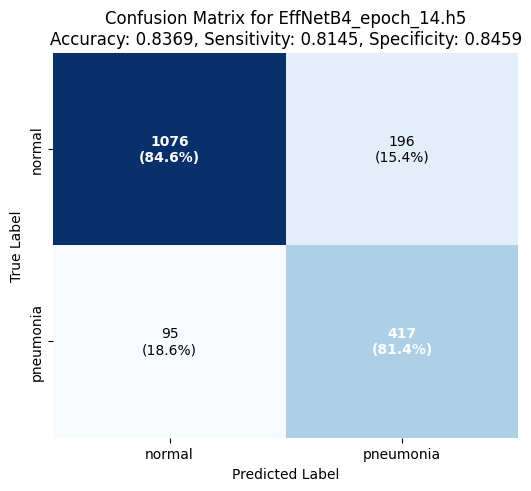


ROC AUC Score: 0.9031


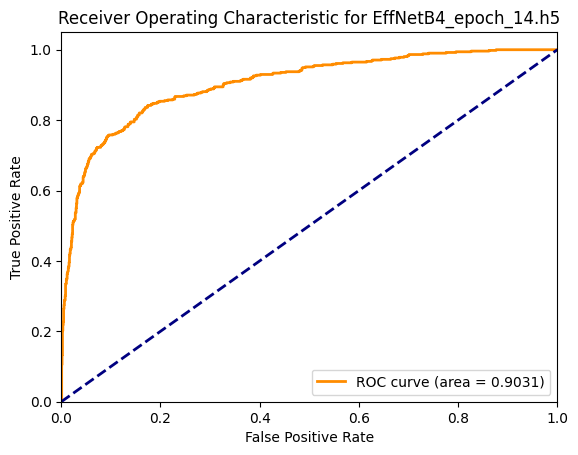


--- Evaluating EffNetB4_epoch_15.h5 ---
Test Loss: 0.6920, Test Accuracy: 0.8610
Generating predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9129    0.8899    0.9013      1272
   pneumonia     0.7426    0.7891    0.7652       512

    accuracy                         0.8610      1784
   macro avg     0.8278    0.8395    0.8332      1784
weighted avg     0.8640    0.8610    0.8622      1784


Confusion Matrix:
[[1132  140]
 [ 108  404]]
Accuracy: 0.8610
Sensitivity: 0.7891
Specificity: 0.8899
Pneumonia Precision: 0.7426
Pneumonia F1-score: 0.7652


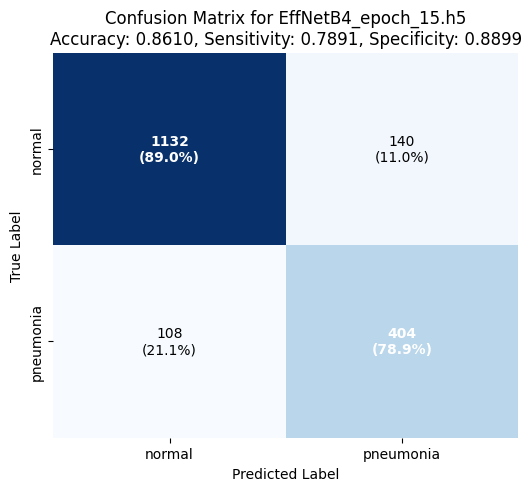


ROC AUC Score: 0.8986


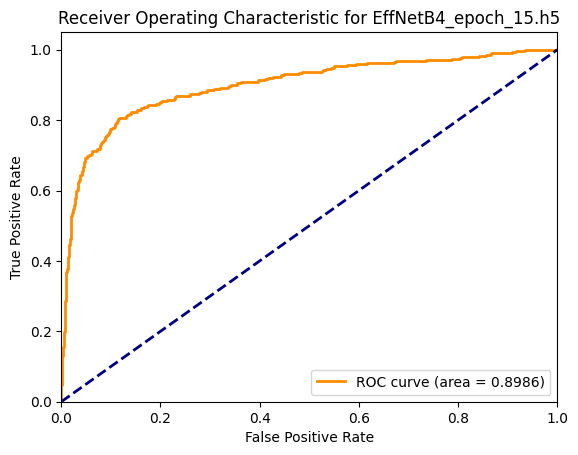


--- Evaluation of all saved epochs complete ---


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate from all saved epochs
# Directory where the models are saved
save_dir = '/content/drive/MyDrive/NIH_models/Results/'

# Get a list of all saved model files
model_files = [f for f in os.listdir(save_dir) if f.startswith('EffNetB4_epoch_') and f.endswith('.h5')]
model_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0])) # Sort files by epoch number

print("Evaluating each saved epoch on the test dataset...")

# Get true labels once outside the loop for efficiency
true_labels = np.concatenate([y for x, y in test_ds], axis=0)
class_names = test_ds.class_names

for model_file in model_files:
    model_path = os.path.join(save_dir, model_file)
    try:
        # Load the model
        loaded_model = tf.keras.models.load_model(model_path)
        print(f"\n--- Evaluating {model_file} ---")

        # Evaluate the loaded model on the test dataset
        test_results = loaded_model.evaluate(test_ds, verbose=0)
        test_loss, test_accuracy = test_results[0], test_results[1]

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        # Predictions using the loaded model
        print("Generating predictions...")
        predictions = loaded_model.predict(test_ds)

        # Convert probabilities to class labels (0 or 1)
        predicted_labels = (predictions > 0.5).astype(int)

        print("\nClassification Report:")
        print(classification_report(true_labels, predicted_labels, target_names=class_names, digits=4))

        # Confusion matrix
        cm = confusion_matrix(true_labels, predicted_labels)
        total = sum(sum(cm))
        acc = (cm[0, 0] + cm[1, 1]) / total
        # Calculate Sensitivity for the positive class (pneumonia, assuming it's class 1)
        sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
        # Calculate Specificity for the negative class (normal, assuming it's class 0)
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0

        # Calculate Precision and F1-score for the 'pneumonia' class (assuming it's class 1)
        pneumonia_precision = precision_score(true_labels, predicted_labels, pos_label=1)
        pneumonia_f1 = f1_score(true_labels, predicted_labels, pos_label=1)


        print("\nConfusion Matrix:")
        print(cm)
        print(f"Accuracy: {acc:.4f}")
        print(f"Sensitivity: {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"Pneumonia Precision: {pneumonia_precision:.4f}")
        print(f"Pneumonia F1-score: {pneumonia_f1:.4f}")


        # Plot confusion matrix with class-wise percentages and bold annotations
        plt.figure(figsize=(6, 5))
        ax = sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                        xticklabels=class_names,
                        yticklabels=class_names,
                        cbar=False)

        # Add annotations with counts and class-wise percentages
        for i in range(cm.shape[0]):
            row_sum = cm[i, :].sum()
            for j in range(cm.shape[1]):
                percentage = (cm[i, j] / row_sum) * 100 if row_sum > 0 else 0
                is_correct = (i == j)
                text = f"{cm[i, j]}\n({percentage:.1f}%)"
                ax.text(j + 0.5, i + 0.5, text,
                       ha='center', va='center',
                       color='white' if is_correct else 'black',
                       weight='bold' if is_correct else 'normal')

        plt.title(f'Confusion Matrix for {model_file}\nAccuracy: {acc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # ROC Curve and AUC
        # For binary classification with sigmoid output, roc_curve expects true labels and prediction probabilities
        fpr, tpr, thresholds = roc_curve(true_labels, predictions)
        roc_auc = auc(fpr, tpr)

        print(f"\nROC AUC Score: {roc_auc:.4f}")

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {model_file}')
        plt.legend(loc="lower right")
        plt.show()

    except Exception as e:
        print(f"Error loading or evaluating {model_file}: {e}")

print("\n--- Evaluation of all saved epochs complete ---")

### **Evaluating The Best Saved Model**

Successfully loaded model from: /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5

Evaluating the loaded model...
56/56 ━━━━━━━━━━━━━━━━━━━━ 367s 6s/step - accuracy: 0.8881 - loss: 0.4811
Test Accuracy: 86.10%
Test Loss: 0.6920
56/56 ━━━━━━━━━━━━━━━━━━━━ 378s 7s/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9129    0.8899    0.9013      1272
   pneumonia     0.7426    0.7891    0.7652       512

    accuracy                         0.8610      1784
   macro avg     0.8278    0.8395    0.8332      1784
weighted avg     0.8640    0.8610    0.8622      1784


Confusion Matrix:
[[1132  140]
 [ 108  404]]
Accuracy: 0.8610
Sensitivity: 0.7891
Specificity: 0.8899
Pneumonia Precision: 0.7426
Pneumonia F1-score: 0.7652


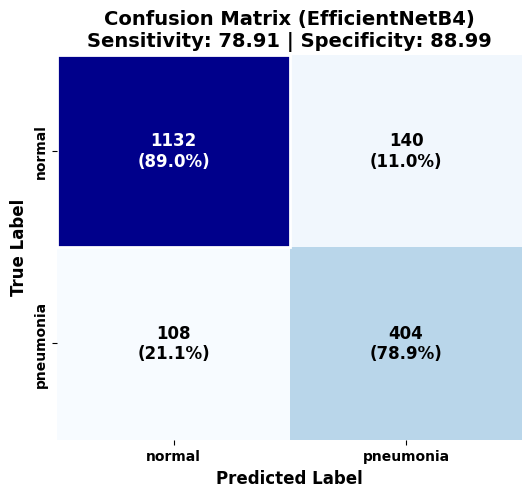


ROC AUC Score: 0.8986


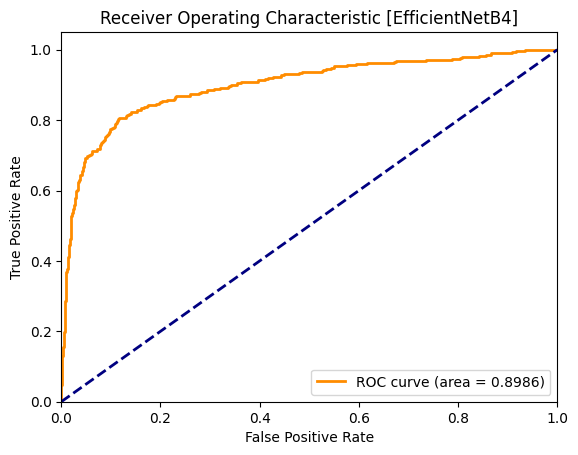

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path to the model saved after the last training epoch
model_path = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'

try:
    # Load the model
    loaded_model = tf.keras.models.load_model(model_path)
    print(f"Successfully loaded model from: {model_path}")

    # Ensure test_ds is available (assuming it was defined in a previous cell)
    if 'test_ds' not in globals():
        print("Error: test_ds not found. Please ensure the cell defining test_ds is run.")
    else:
        # Evaluate the loaded model
        print("\nEvaluating the loaded model...")
        test_results = loaded_model.evaluate(test_ds)
        print("Test Accuracy: {:.2f}%".format(test_results[1] * 100))
        print("Test Loss: {:.4f}".format(test_results[0]))

        # Get true labels and predictions from the test dataset
        true_labels = np.concatenate([y for x, y in test_ds], axis=0)
        predictions = loaded_model.predict(test_ds)

        # Convert probabilities to class labels (0 or 1)
        predicted_labels = (predictions > 0.5).astype(int)

        print("\nClassification Report:")
        # Get class names from the test dataset
        class_names = test_ds.class_names
        print(classification_report(true_labels, predicted_labels, target_names=class_names, digits=4))

        # Confusion matrix
        cm = confusion_matrix(true_labels, predicted_labels)
        total = sum(sum(cm))
        acc = (cm[0, 0] + cm[1, 1]) / total
        # Calculate Sensitivity for the positive class (pneumonia, assuming it's class 1)
        sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
        # Calculate Specificity for the negative class (normal, assuming it's class 0)
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0

        # Calculate Precision and F1-score for the 'pneumonia' class (assuming it's class 1)
        pneumonia_precision = precision_score(true_labels, predicted_labels, pos_label=1)
        pneumonia_f1 = f1_score(true_labels, predicted_labels, pos_label=1)


        print("\nConfusion Matrix:")
        print(cm)
        print(f"Accuracy: {acc:.4f}")
        print(f"Sensitivity: {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"Pneumonia Precision: {pneumonia_precision:.4f}")
        print(f"Pneumonia F1-score: {pneumonia_f1:.4f}")

        # Create custom colormap for the confusion matrix
        # Create a custom color array where only top-left (0,0) is dark blue
        colors = np.array([['darkblue', 'lightblue'], ['lightblue', 'lightblue']])

        # Plot confusion matrix with enhanced styling
        plt.figure(figsize=(6, 5))
        ax = sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                        xticklabels=class_names,
                        yticklabels=class_names,
                        cbar=False)

        # Add annotations with counts and class-wise percentages with enhanced styling
        for i in range(cm.shape[0]):
            row_sum = cm[i, :].sum()
            for j in range(cm.shape[1]):
                percentage = (cm[i, j] / row_sum) * 100 if row_sum > 0 else 0
                text = f"{cm[i, j]}\n({percentage:.1f}%)"

                # Special styling for top-left cell (0,0) - True Negative
                if i == 0 and j == 0:
                    # Create a rectangle patch for deep blue background
                    rect = plt.Rectangle((j, i), 1, 1, facecolor='darkblue', edgecolor='white', linewidth=2)
                    ax.add_patch(rect)
                    # White bold text for top-left
                    ax.text(j + 0.5, i + 0.5, text,
                           ha='center', va='center',
                           color='white',
                           weight='bold', fontsize=12)
                else:
                    # Black bold text for all other cells
                    ax.text(j + 0.5, i + 0.5, text,
                           ha='center', va='center',
                           color='black',
                           weight='bold', fontsize=12)

        # Make axis labels bold
        ax.set_xlabel('Predicted Label', weight='bold', fontsize=12)
        ax.set_ylabel('True Label', weight='bold', fontsize=12)

        # Make tick labels bold
        ax.set_xticklabels(class_names, weight='bold')
        ax.set_yticklabels(class_names, weight='bold')

        plt.title(f'Confusion Matrix (EfficientNetB4)\nSensitivity: {sensitivity*100:.2f} | Specificity: {specificity*100:.2f}',
                 weight='bold', fontsize=14)
        plt.show()

        # ROC Curve and AUC
        # For binary classification with sigmoid output, roc_curve expects true labels and prediction probabilities
        fpr, tpr, thresholds = roc_curve(true_labels, predictions)
        roc_auc = auc(fpr, tpr)

        print(f"\nROC AUC Score: {roc_auc:.4f}")

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic [EfficientNetB4]')
        plt.legend(loc="lower right")
        plt.show()


except Exception as e:
    print(f"Error loading the model or performing evaluation: {e}")

#### **Testing with Optimal threshold**

Successfully loaded model from: /content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5

Evaluating the loaded model...
56/56 ━━━━━━━━━━━━━━━━━━━━ 78s 793ms/step - accuracy: 0.8881 - loss: 0.4811
Test Accuracy: 86.10%
Test Loss: 0.6920
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 612ms/step

Classification Report:
              precision    recall  f1-score   support

      normal     0.9169    0.8852    0.9008      1272
   pneumonia     0.7374    0.8008    0.7678       512

    accuracy                         0.8610      1784
   macro avg     0.8272    0.8430    0.8343      1784
weighted avg     0.8654    0.8610    0.8626      1784


Confusion Matrix:
[[1126  146]
 [ 102  410]]
Accuracy: 0.8610
Sensitivity: 0.8008
Specificity: 0.8852
Pneumonia Precision: 0.7374
Pneumonia F1-score: 0.7678


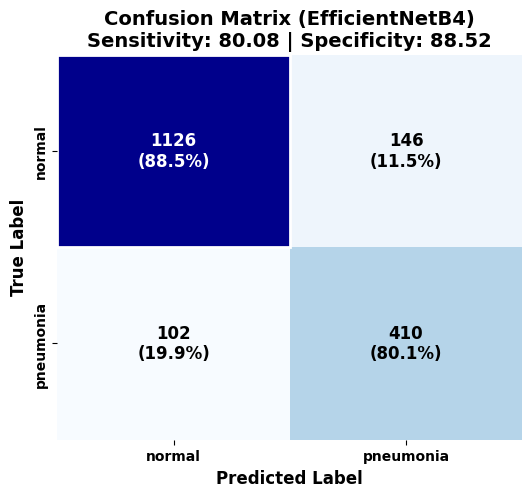


ROC AUC Score: 0.8986


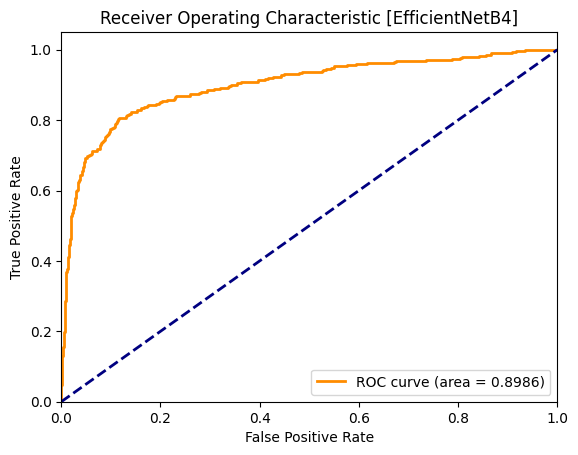

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path to the model saved after the last training epoch
model_path = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'

try:
    # Load the model
    loaded_model = tf.keras.models.load_model(model_path)
    print(f"Successfully loaded model from: {model_path}")

    # Ensure test_ds is available (assuming it was defined in a previous cell)
    if 'test_ds' not in globals():
        print("Error: test_ds not found. Please ensure the cell defining test_ds is run.")
    else:
        # Evaluate the loaded model
        print("\nEvaluating the loaded model...")
        test_results = loaded_model.evaluate(test_ds)
        print("Test Accuracy: {:.2f}%".format(test_results[1] * 100))
        print("Test Loss: {:.4f}".format(test_results[0]))

        # Get true labels and predictions from the test dataset
        true_labels = np.concatenate([y for x, y in test_ds], axis=0)
        predictions = loaded_model.predict(test_ds)

        # Calculate ROC curve and find optimal threshold using Youden's J statistic
        fpr, tpr, thresholds = roc_curve(true_labels, predictions)
        j_scores = tpr - fpr
        optimal_idx = np.argmax(j_scores)
        optimal_threshold = thresholds[optimal_idx]

        # Print the optimal threshold
        # print(f"\nOptimal threshold determined by Youden's J statistic: {optimal_threshold:.4f}")

        # Convert probabilities to class labels using the optimal threshold
        predicted_labels = (predictions > optimal_threshold).astype(int)

        print("\nClassification Report:")
        # Get class names from the test dataset
        class_names = test_ds.class_names
        print(classification_report(true_labels, predicted_labels, target_names=class_names, digits=4))

        # Confusion matrix
        cm = confusion_matrix(true_labels, predicted_labels)
        total = sum(sum(cm))
        acc = (cm[0, 0] + cm[1, 1]) / total
        # Calculate Sensitivity for the positive class (pneumonia, assuming it's class 1)
        sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
        # Calculate Specificity for the negative class (normal, assuming it's class 0)
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0

        # Calculate Precision and F1-score for the 'pneumonia' class (assuming it's class 1)
        pneumonia_precision = precision_score(true_labels, predicted_labels, pos_label=1)
        pneumonia_f1 = f1_score(true_labels, predicted_labels, pos_label=1)


        print("\nConfusion Matrix:")
        print(cm)
        print(f"Accuracy: {acc:.4f}")
        print(f"Sensitivity: {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"Pneumonia Precision: {pneumonia_precision:.4f}")
        print(f"Pneumonia F1-score: {pneumonia_f1:.4f}")

        # Create custom colormap for the confusion matrix
        # Create a custom color array where only top-left (0,0) is dark blue
        colors = np.array([['darkblue', 'lightblue'], ['lightblue', 'lightblue']])

        # Plot confusion matrix with enhanced styling
        plt.figure(figsize=(6, 5))
        ax = sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                        xticklabels=class_names,
                        yticklabels=class_names,
                        cbar=False)

        # Add annotations with counts and class-wise percentages with enhanced styling
        for i in range(cm.shape[0]):
            row_sum = cm[i, :].sum()
            for j in range(cm.shape[1]):
                percentage = (cm[i, j] / row_sum) * 100 if row_sum > 0 else 0
                text = f"{cm[i, j]}\n({percentage:.1f}%)"

                # Special styling for top-left cell (0,0) - True Negative
                if i == 0 and j == 0:
                    # Create a rectangle patch for deep blue background
                    rect = plt.Rectangle((j, i), 1, 1, facecolor='darkblue', edgecolor='white', linewidth=2)
                    ax.add_patch(rect)
                    # White bold text for top-left
                    ax.text(j + 0.5, i + 0.5, text,
                           ha='center', va='center',
                           color='white',
                           weight='bold', fontsize=12)
                else:
                    # Black bold text for all other cells
                    ax.text(j + 0.5, i + 0.5, text,
                           ha='center', va='center',
                           color='black',
                           weight='bold', fontsize=12)

        # Make axis labels bold
        ax.set_xlabel('Predicted Label', weight='bold', fontsize=12)
        ax.set_ylabel('True Label', weight='bold', fontsize=12)

        # Make tick labels bold
        ax.set_xticklabels(class_names, weight='bold')
        ax.set_yticklabels(class_names, weight='bold')

        plt.title(f'Confusion Matrix (EfficientNetB4)\nSensitivity: {sensitivity*100:.2f} | Specificity: {specificity*100:.2f}',
                 weight='bold', fontsize=14)
        plt.show()

        # ROC Curve and AUC
        # For binary classification with sigmoid output, roc_curve expects true labels and prediction probabilities
        fpr, tpr, thresholds = roc_curve(true_labels, predictions)
        roc_auc = auc(fpr, tpr)

        print(f"\nROC AUC Score: {roc_auc:.4f}")

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic [EfficientNetB4]')
        plt.legend(loc="lower right")
        plt.show()


except Exception as e:
    print(f"Error loading the model or performing evaluation: {e}")

In [ ]:
print(f"\nOptimal threshold determined by Youden's J statistic: {optimal_threshold:.4f}")


Optimal threshold determined by Youden's J statistic: 0.4294


#### **FP16 Quantisation of efficientNetB4**

In [ ]:
import tensorflow as tf
import numpy as np
import os


# 1. PATHS AND DIRECTORIES SETUP FOR FP16
original_model_path = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'
quantized_dir = '/content/drive/MyDrive/NIH_models/Quantized/'
os.makedirs(quantized_dir, exist_ok=True)
fp16_model_path = os.path.join(quantized_dir, 'EffNetB4_quantized_fp16.tflite')


# 2. LOAD ORIGINAL MODEL
model = tf.keras.models.load_model(original_model_path)
print("Original model loaded successfully for FP16 quantization")


# 3. PERFORM FP16 QUANTIZATION
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Set target specification for FP16
converter.target_spec.supported_types = [tf.float16]

# Convert and save FP16 model
fp16_quantized_model = converter.convert()
with open(fp16_model_path, 'wb') as f:
    f.write(fp16_quantized_model)

print(f"FP16 quantized model saved to: {fp16_model_path}")
print(f"FP16 model size: {len(fp16_quantized_model)/(1024*1024):.2f} MB")

Original model loaded successfully for FP16 quantization
Saved artifact at '/tmp/tmpm3lqcvvu'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140154082814736: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  140154082819344: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  140155039357968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140154863278736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140154863282384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140155039366800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140155039366416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140154863284304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140154863282768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1401548632

#### **FP16 Evaluation**


FP16 Quantized Model Evaluation Metrics:
Accuracy:    0.8604
Sensitivity: 0.7891
Specificity: 0.8892
AUROC:       0.8986
Precision (Pneumonia): 0.7413
F1-Score (Pneumonia):  0.7644


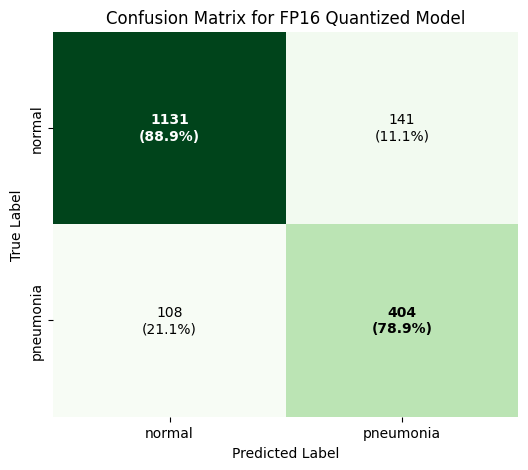

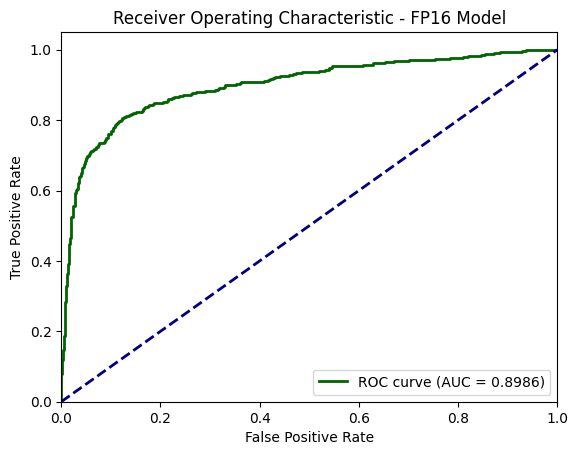

In [ ]:

# 9. EVALUATE FP16 QUANTIZED MODEL

# Initialize TFLite interpreter for FP16 model
fp16_interpreter = tf.lite.Interpreter(model_path=fp16_model_path)
fp16_interpreter.allocate_tensors()
fp16_input_details = fp16_interpreter.get_input_details()
fp16_output_details = fp16_interpreter.get_output_details()

# Collect all predictions and labels for FP16 model
fp16_all_predictions = []
fp16_all_labels = []

for images, labels in test_ds:
    batch_labels = labels.numpy()

    batch_predictions = []
    for i in range(images.shape[0]):
        # Apply same preprocessing as original model
        image = tf.cast(images[i], tf.float32) / 255.0
        preprocessed_image = tf.keras.applications.efficientnet.preprocess_input(
            image * 255.0
        )

        # Set tensor with FP32 input (FP16 models still accept FP32 inputs)
        fp16_interpreter.set_tensor(fp16_input_details[0]['index'],
                                   np.expand_dims(preprocessed_image, axis=0).astype(np.float32))
        fp16_interpreter.invoke()
        output = fp16_interpreter.get_tensor(fp16_output_details[0]['index'])
        batch_predictions.append(output[0])

    fp16_all_predictions.extend(batch_predictions)
    fp16_all_labels.extend(batch_labels)

# Convert to numpy arrays
fp16_all_labels = np.array(fp16_all_labels)
fp16_all_predictions = np.array(fp16_all_predictions).squeeze()
fp16_binary_preds = (fp16_all_predictions > 0.5).astype(int)

# Calculate FP16 metrics
fp16_accuracy = accuracy_score(fp16_all_labels, fp16_binary_preds)
fp16_cm = confusion_matrix(fp16_all_labels, fp16_binary_preds)
fp16_sensitivity = fp16_cm[1, 1] / (fp16_cm[1, 0] + fp16_cm[1, 1]) if (fp16_cm[1, 0] + fp16_cm[1, 1]) > 0 else 0
fp16_specificity = fp16_cm[0, 0] / (fp16_cm[0, 0] + fp16_cm[0, 1]) if (fp16_cm[0, 0] + fp16_cm[0, 1]) > 0 else 0
fp16_auroc = roc_auc_score(fp16_all_labels, fp16_all_predictions)
fp16_pneumonia_precision = precision_score(fp16_all_labels, fp16_binary_preds, pos_label=1)
fp16_pneumonia_f1 = f1_score(fp16_all_labels, fp16_binary_preds, pos_label=1)

# Print FP16 metrics
print("\nFP16 Quantized Model Evaluation Metrics:")
print(f"Accuracy:    {fp16_accuracy:.4f}")
print(f"Sensitivity: {fp16_sensitivity:.4f}")
print(f"Specificity: {fp16_specificity:.4f}")
print(f"AUROC:       {fp16_auroc:.4f}")
print(f"Precision (Pneumonia): {fp16_pneumonia_precision:.4f}")
print(f"F1-Score (Pneumonia):  {fp16_pneumonia_f1:.4f}")


# 10. FP16 CONFUSION MATRIX WITH ANNOTATIONS
plt.figure(figsize=(6, 5))
ax = sns.heatmap(fp16_cm, annot=False, fmt='d', cmap='Greens',
                xticklabels=class_names,
                yticklabels=class_names,
                cbar=False)

# Add annotations with counts and percentages
for i in range(fp16_cm.shape[0]):
    row_sum = fp16_cm[i, :].sum()
    for j in range(fp16_cm.shape[1]):
        count = fp16_cm[i, j]
        percentage = 100 * count / row_sum if row_sum > 0 else 0
        is_correct = (i == j)
        text = f"{count}\n({percentage:.1f}%)"
        ax.text(j+0.5, i+0.5, text,
               ha='center', va='center',
               color='white' if count > fp16_cm.max()/2 else 'black',
               weight='bold' if is_correct else 'normal')

plt.title('Confusion Matrix for FP16 Quantized Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 11. FP16 ROC CURVE

fp16_fpr, fp16_tpr, fp16_thresholds = roc_curve(fp16_all_labels, fp16_all_predictions)
fp16_roc_auc = auc(fp16_fpr, fp16_tpr)

plt.figure()
plt.plot(fp16_fpr, fp16_tpr, color='darkgreen', lw=2,
        label=f'ROC curve (AUC = {fp16_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - FP16 Model')
plt.legend(loc="lower right")
plt.show()

#### **Post-Training Quantization (PT-PQ)- INT8**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Directories (assumes data is organized in subfolders per class)
train_dir = '/content/drive/MyDrive/NIH_processed/train'
test_dir  = '/content/drive/MyDrive/NIH_processed/test'
model_path = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'
quant_save_path = '/content/drive/MyDrive/NIH_models/Quantized_PTPQ/EffNetB4_quantized_int8.tflite'

# Load pre-trained model
model = tf.keras.models.load_model(model_path)

# Image parameters (Use the size the model was trained on: 224x224)
image_size = (224, 224)
batch_size = 32

# Load and preprocess training/validation data with a 90/10 split
train_ds = image_dataset_from_directory(
    train_dir, validation_split=0.1, subset="training", seed=123,
    image_size=image_size, batch_size=batch_size
)
val_ds = image_dataset_from_directory(
    train_dir, validation_split=0.1, subset="validation", seed=123,
    image_size=image_size, batch_size=batch_size
)
# Load test data
test_ds = image_dataset_from_directory(
    test_dir, seed=123, image_size=image_size, batch_size=batch_size
)

# Apply EfficientNet preprocessing (scale pixels)
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds   = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds  = test_ds.map(lambda x, y: (preprocess_input(x), y))

# Optional: prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)
test_ds  = test_ds.prefetch(AUTOTUNE)

# Determine number of validation images for representative dataset (10% of val)
val_count = 0
for images, labels in val_ds:
    val_count += images.shape[0]
rep_count = max(1, int(0.1 * val_count))  # 10% of validation images

# Representative data generator for calibration
def representative_data_gen():
    i = 0
    for images, labels in val_ds:
        for j in range(images.shape[0]):
            if i >= rep_count:
                return
            # Yield one image at a time in a batch of size 1
            img = tf.expand_dims(images[j], axis=0)
            yield [img]
            i += 1

# Convert to TensorFlow Lite with INT8 quantization (float I/O)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32

tflite_model = converter.convert()

# Save the quantized TFLite model, avoiding overwrite
os.makedirs(os.path.dirname(quant_save_path), exist_ok=True)
if not os.path.exists(quant_save_path):
    with open(quant_save_path, 'wb') as f:
        f.write(tflite_model)
    print(f"Quantized model saved to {quant_save_path}")
else:
    print(f"File {quant_save_path} already exists, not overwriting.")

# Load TFLite model for evaluation
interpreter = tf.lite.Interpreter(model_path=quant_save_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

Found 5320 files belonging to 2 classes.
Using 4788 files for training.
Found 5320 files belonging to 2 classes.
Using 532 files for validation.
Found 1784 files belonging to 2 classes.
Saved artifact at '/tmp/tmpttttqsut'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140553219043792: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  140553219043024: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  140554013810448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554013812944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554013812368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554013813136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554013810640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554013810832: Tens

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


File /content/drive/MyDrive/NIH_models/Quantized_PTPQ/EffNetB4_quantized_int8.tflite already exists, not overwriting.


#### **INT8 Evaluation Post-Training Quantization (PT-PQ)**

Accuracy:  0.5095
Sensitivity (Recall): 0.7422
Specificity: 0.4159
Precision: 0.3384
F1 Score: 0.4648
AUROC: 0.6229


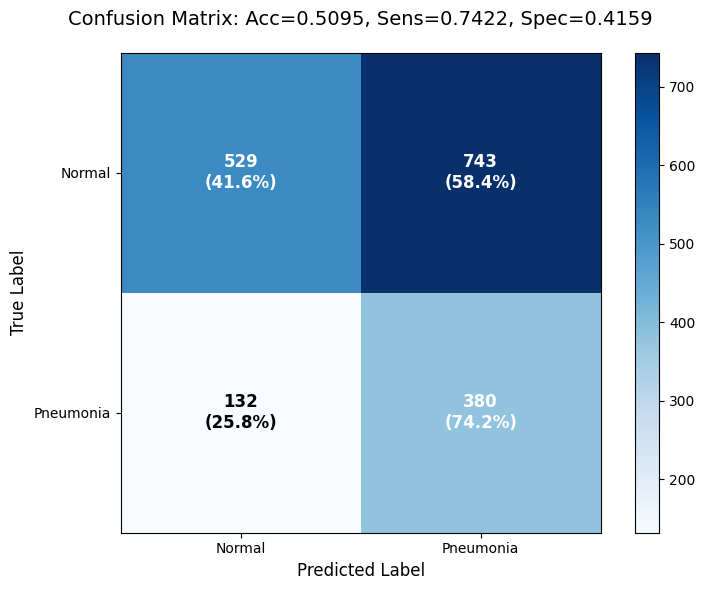

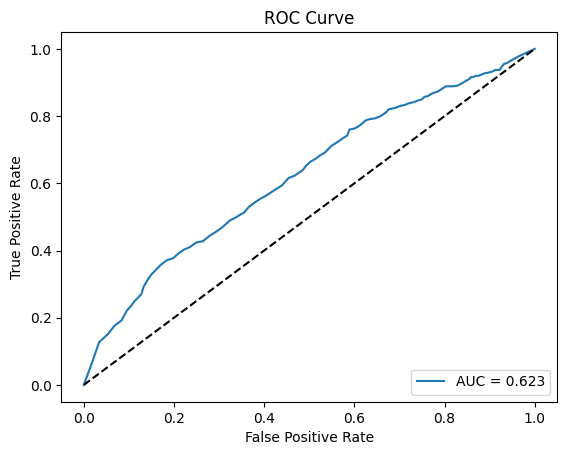

In [ ]:
# Evaluate on test set
y_true, y_pred, y_prob = [], [], []
for images, labels in test_ds:
    images_np = images.numpy().astype(np.float32)
    labels_np = labels.numpy()
    for i in range(images_np.shape[0]):
        img = images_np[i:i+1]  # single image batch
        interpreter.set_tensor(input_details[0]['index'], img)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])[0]
        # Assuming binary classification with sigmoid output
        prob = output[0] if output.ndim > 0 else float(output)
        pred = 1 if prob >= 0.5 else 0
        y_true.append(int(labels_np[i]))
        y_pred.append(pred)
        y_prob.append(prob)

# Compute metrics
acc  = accuracy_score(y_true, y_pred)
sens = recall_score(y_true, y_pred)  # sensitivity = recall
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
spec = tn / (tn + fp)
prec = precision_score(y_true, y_pred)
f1   = f1_score(y_true, y_pred)
auroc = roc_auc_score(y_true, y_prob)

print(f"Accuracy:  {acc:.4f}")
print(f"Sensitivity (Recall): {sens:.4f}")
print(f"Specificity: {spec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUROC: {auroc:.4f}")

# Enhanced Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')
title_str = f"Confusion Matrix: Acc={acc:.4f}, Sens={sens:.4f}, Spec={spec:.4f}"
plt.title(title_str, fontsize=14, pad=20)
plt.colorbar()

# Class labels
classes = ["Normal", "Pneumonia"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Calculate percentages and annotate cells
fmt = '.1f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    row_total = cm[i].sum()
    for j in range(cm.shape[1]):
        # Calculate class-wise percentage
        percentage = f"{100 * cm[i, j] / row_total:{fmt}}%" if row_total > 0 else "0%"

        # Create bold annotation: count on first line, percentage on second line
        text = f"{cm[i, j]}\n({percentage})"
        weight = 'bold'
        color = 'white' if cm[i, j] > thresh else 'black'
        plt.text(j, i, text,
                 ha="center", va="center",
                 color=color, fontsize=12,
                 weight=weight)

plt.tight_layout()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auroc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

In [ ]:
## Size
import os

# Path to the quantized INT8 model
quantized_int8_model_path = '/content/drive/MyDrive/NIH_models/Quantized_PTPQ/EffNetB4_quantized_int8.tflite'

# Get the file size in bytes and convert to MB
if os.path.exists(quantized_int8_model_path):
    quantized_int8_size_bytes = os.path.getsize(quantized_int8_model_path)
    quantized_int8_size_mb = quantized_int8_size_bytes / (1024 * 1024)
    print(f"PT-PQ Quantized INT8 model file size: {quantized_int8_size_mb:.2f} MB")
else:
    print(f"PT-PQ Quantized INT8 model file not found at: {quantized_int8_model_path}")

PT-PQ Quantized INT8 model file size: 19.65 MB


## **Dynamic Range (Hybrid) Quantisation**

In [ ]:
import tensorflow as tf
import os
import numpy as np


# PATHS AND DIRECTORIES SETUP

original_model_path = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'
quantized_dir = '/content/drive/MyDrive/NIH_models/Quantized/'
os.makedirs(quantized_dir, exist_ok=True)
quantized_model_path = os.path.join(quantized_dir, 'EffNetB4_quantized_hybrid.tflite')


# LOAD ORIGINAL MODEL AND DATASETS

model = tf.keras.models.load_model(original_model_path)
print("Original model loaded successfully")


# DYNAMIC RANGE QUANTIZATION (HYBRID INT8)

try:
    # Create TFLite converter
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # Set optimization for hybrid quantization
    converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enables INT8 weights, float32 activations

    # Convert the model
    print("Converting model with dynamic range quantization...")
    tflite_quantized_model = converter.convert()

    # Save quantized model
    with open(quantized_model_path, 'wb') as f:
        f.write(tflite_quantized_model)
    print(f"Quantized model saved to: {quantized_model_path}")

    # Report model size
    quantized_size = os.path.getsize(quantized_model_path) / (1024 * 1024)
    original_size = os.path.getsize(original_model_path) / (1024 * 1024)
    print(f"\nModel Size Comparison:")
    print(f"Original : {original_size:.2f} MB")
    print(f"INT8 Dynamic Range Quantized Model: {quantized_size:.2f} MB (reduced by {100*(1-quantized_size/original_size):.1f}%)")

except Exception as e:
    print(f"Quantization failed: {e}")

Original model loaded successfully
Converting model with dynamic range quantization...
Saved artifact at '/tmp/tmpd0inw_8e'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136650927691856: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  136650927696272: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  136652166582672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136652166583056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136652166584016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136652166583248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136652166578448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136652166584976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136652166584592: TensorSpec(shape=(), dtype=tf.res

### **Evaluation Of INT8 Dynamic Quantisation**

Preparing test dataset...
Found 1784 files belonging to 2 classes.
Loaded 1784 test images
Initializing quantized model...
Model ready for inference
Starting image-by-image inference...


Processing Images: 100%|██████████| 1784/1784 [02:07<00:00, 13.98it/s]


Completed inference on 1784 images
Computing evaluation metrics...

MODEL PERFORMANCE METRICS
Accuracy:          0.8094
Sensitivity (TPR): 0.7266  [Pneumonia detection]
Specificity (TNR): 0.8428  [Normal detection]
Precision:         0.6503  [Pneumonia]
F1-Score:          0.6863       [Pneumonia]
ROC-AUC:           0.8563

Classification Report:
              precision    recall  f1-score   support

      Normal     0.8845    0.8428    0.8631      1272
   Pneumonia     0.6503    0.7266    0.6863       512

    accuracy                         0.8094      1784
   macro avg     0.7674    0.7847    0.7747      1784
weighted avg     0.8173    0.8094    0.8124      1784


Generating visualizations...


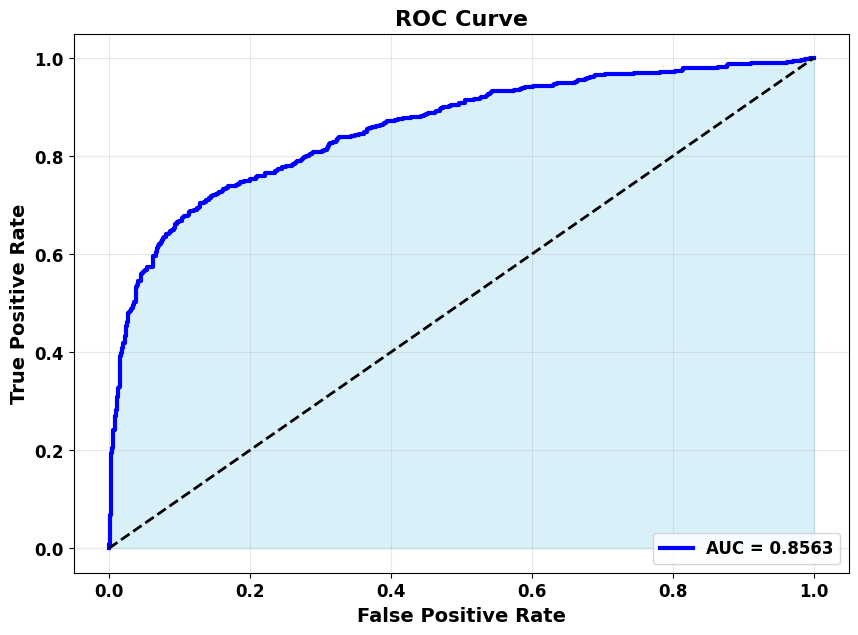

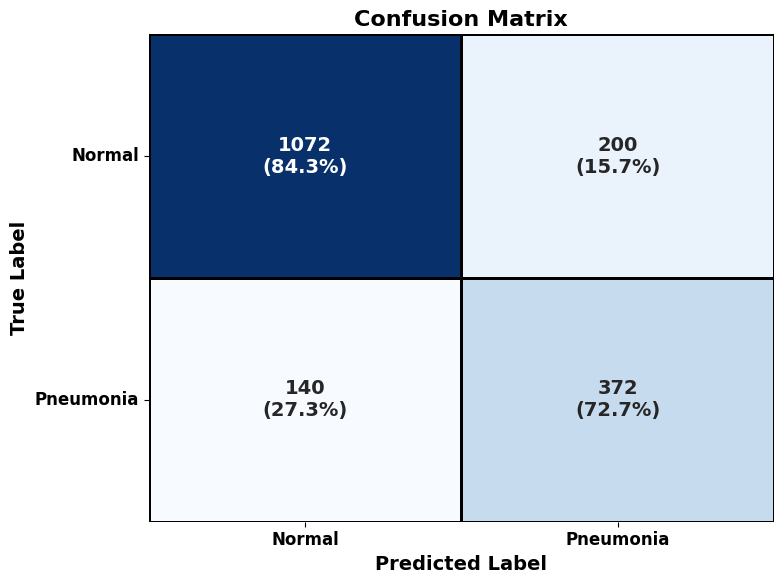

Saving visualizations...
Visualizations saved to /content/drive/MyDrive/NIH_models/Quantized/
Evaluation complete!


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import os
import gc
from tqdm import tqdm
import matplotlib as mpl

# Configure matplotlib for bold text
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['font.size'] = 12


# SETUP AND CONFIGURATION
#
# Path configuration
quantized_dir = '/content/drive/MyDrive/NIH_models/Quantized/'
quantized_model_path = os.path.join(quantized_dir, 'EffNetB4_quantized_hybrid.tflite')
test_dir = "/content/drive/MyDrive/NIH_processed/test"
img_size = (224, 224)
class_names = ['Normal', 'Pneumonia']  # 0=Normal, 1=Pneumonia

# Ensure output directory exists
os.makedirs(quantized_dir, exist_ok=True)


# PREPARE TEST DATASET (MEMORY-EFFICIENT)

print("Preparing test dataset...")

# Load images individually without batching
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='binary',
    image_size=img_size,
    batch_size=None,  # Process one image at a time
    shuffle=False
)

# Preprocess each image for EfficientNet
def preprocess(image, label):
    return tf.keras.applications.efficientnet.preprocess_input(image), label

test_ds = test_ds.map(preprocess)
total_images = len(list(test_ds))
print(f"Loaded {total_images} test images")


# SETUP QUANTIZED MODEL

print("Initializing quantized model...")

# Clean up memory before loading
tf.keras.backend.clear_session()
gc.collect()

# Load TFLite model
interpreter = tf.lite.Interpreter(quantized_model_path)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Configure for single-image processing
interpreter.resize_tensor_input(input_details[0]['index'], [1, *img_size, 3])
interpreter.allocate_tensors()
print("Model ready for inference")


# RUN INFERENCE WITH PROGRESS TRACKING
print("Starting image-by-image inference...")
true_labels = []
predictions = []

# Process images with progress bar
for image, label in tqdm(test_ds, total=total_images, desc="Processing Images"):
    try:
        # Prepare input tensor (add batch dimension)
        input_tensor = tf.expand_dims(image, axis=0)

        # Run inference
        interpreter.set_tensor(input_details[0]['index'], input_tensor)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])

        # Store results
        true_labels.append(label.numpy().item())
        predictions.append(output.squeeze().item())

    except Exception as e:
        print(f"Error processing image: {str(e)}")
        continue  # Skip failed images

    # Clean up memory after each image
    del image, input_tensor, output
    if len(true_labels) % 100 == 0:
        gc.collect()  # Periodic cleanup

# Convert to arrays for metrics
true_labels = np.array(true_labels)
predictions = np.array(predictions)
print(f"Completed inference on {len(true_labels)} images")


# CALCULATE PERFORMANCE METRICS
print("Computing evaluation metrics...")

# Convert probabilities to class predictions
predicted_labels = (predictions > 0.5).astype(int)

# Calculate core metrics
accuracy = np.mean(true_labels == predicted_labels)
sensitivity = recall_score(true_labels, predicted_labels, pos_label=1)  # Pneumonia recall
specificity = recall_score(true_labels, predicted_labels, pos_label=0)  # Normal recall
precision = precision_score(true_labels, predicted_labels, pos_label=1)
f1 = f1_score(true_labels, predicted_labels, pos_label=1)
roc_auc = roc_auc_score(true_labels, predictions)

# Confusion matrix with percentages
cm = confusion_matrix(true_labels, predicted_labels)
cm_percent = cm / cm.sum(axis=1, keepdims=True)  # Row-wise percentages


# DISPLAY RESULTS
print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy:          {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}  [Pneumonia detection]")
print(f"Specificity (TNR): {specificity:.4f}  [Normal detection]")
print(f"Precision:         {precision:.4f}  [Pneumonia]")
print(f"F1-Score:          {f1:.4f}       [Pneumonia]")
print(f"ROC-AUC:           {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels,
                           target_names=class_names, digits=4))


# DISPLAY VISUALIZATIONS IN NOTEBOOK
print("\nGenerating visualizations...")

# 1. ROC Curve
plt.figure(figsize=(10, 7))
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.fill_between(fpr, tpr, alpha=0.3, color='skyblue')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Confusion Matrix Heatmap with bold annotations
plt.figure(figsize=(8, 6))
annotations = [[f"{cm[i,j]}\n({cm_percent[i,j]:.1%})" for j in range(2)] for i in range(2)]
sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, linewidths=2, linecolor='black', annot_kws={'weight': 'bold', 'size': 14})

plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()
plt.show()

# SAVE VISUALIZATIONS (OPTIONAL)
print("Saving visualizations...")
# Save ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=3, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.fill_between(fpr, tpr, alpha=0.3, color='skyblue')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(quantized_dir, 'ROC_Curve.png'), bbox_inches='tight')
plt.close()

# Save Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, linewidths=2, linecolor='black', annot_kws={'weight': 'bold', 'size': 14})
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(quantized_dir, 'Confusion_Matrix.png'), bbox_inches='tight')
plt.close()

print(f"Visualizations saved to {quantized_dir}")
print("Evaluation complete!")

#### **Optimal Threshold**

Preparing test dataset...
Found 1784 files belonging to 2 classes.
Loaded 1784 test images
Initializing quantized model...


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Model ready for inference
Starting image-by-image inference...


Processing Images: 100%|██████████| 1784/1784 [03:48<00:00,  7.81it/s]


Completed inference on 1784 images
Computing evaluation metrics...

MODEL PERFORMANCE METRICS
Accuracy:          0.8296
Sensitivity (TPR): 0.6973  [Pneumonia detection]
Specificity (TNR): 0.8829  [Normal detection]
Precision:         0.7055  [Pneumonia]
F1-Score:          0.7014       [Pneumonia]
ROC-AUC:           0.8562

Classification Report:
              precision    recall  f1-score   support

      Normal     0.8787    0.8829    0.8808      1272
   Pneumonia     0.7055    0.6973    0.7014       512

    accuracy                         0.8296      1784
   macro avg     0.7921    0.7901    0.7911      1784
weighted avg     0.8290    0.8296    0.8293      1784


Generating visualizations...


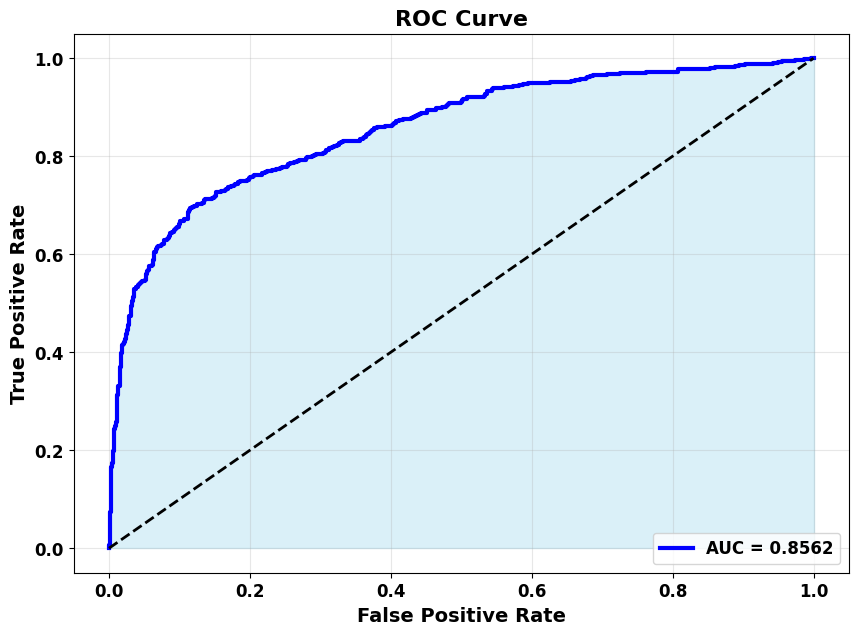

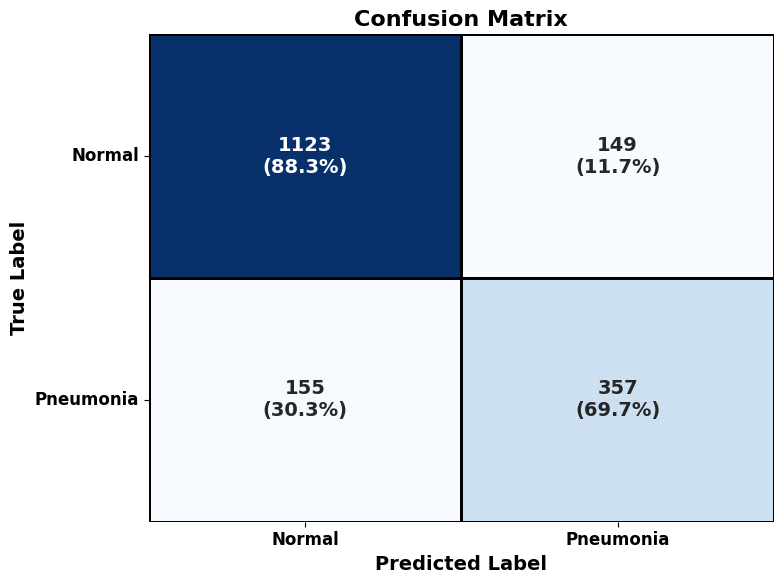

Saving visualizations...
Evaluation complete!


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import os
import gc
from tqdm import tqdm
import matplotlib as mpl

# Configure matplotlib for bold text
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['font.size'] = 12


# SETUP AND CONFIGURATION
#
# Path configuration
quantized_dir = '/content/drive/MyDrive/NIH_models/Quantized/'
quantized_model_path = os.path.join(quantized_dir, 'EffNetB4_quantized_hybrid.tflite')
test_dir = "/content/drive/MyDrive/NIH_processed/test"
img_size = (224, 224)
class_names = ['Normal', 'Pneumonia']  # 0=Normal, 1=Pneumonia

# Ensure output directory exists
os.makedirs(quantized_dir, exist_ok=True)


# PREPARE TEST DATASET (MEMORY-EFFICIENT)

print("Preparing test dataset...")

# Load images individually without batching
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='binary',
    image_size=img_size,
    batch_size=None,  # Process one image at a time
    shuffle=False
)

# Preprocess each image for EfficientNet
def preprocess(image, label):
    return tf.keras.applications.efficientnet.preprocess_input(image), label

test_ds = test_ds.map(preprocess)
total_images = len(list(test_ds))
print(f"Loaded {total_images} test images")


# SETUP QUANTIZED MODEL

print("Initializing quantized model...")

# Clean up memory before loading
tf.keras.backend.clear_session()
gc.collect()

# Load TFLite model
interpreter = tf.lite.Interpreter(quantized_model_path)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Configure for single-image processing
interpreter.resize_tensor_input(input_details[0]['index'], [1, *img_size, 3])
interpreter.allocate_tensors()
print("Model ready for inference")


# RUN INFERENCE WITH PROGRESS TRACKING
print("Starting image-by-image inference...")
true_labels = []
predictions = []

# Process images with progress bar
for image, label in tqdm(test_ds, total=total_images, desc="Processing Images"):
    try:
        # Prepare input tensor (add batch dimension)
        input_tensor = tf.expand_dims(image, axis=0)

        # Run inference
        interpreter.set_tensor(input_details[0]['index'], input_tensor)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])

        # Store results
        true_labels.append(label.numpy().item())
        predictions.append(output.squeeze().item())

    except Exception as e:
        print(f"Error processing image: {str(e)}")
        continue  # Skip failed images

    # Clean up memory after each image
    del image, input_tensor, output
    if len(true_labels) % 100 == 0:
        gc.collect()  # Periodic cleanup

# Convert to arrays for metrics
true_labels = np.array(true_labels)
predictions = np.array(predictions)
print(f"Completed inference on {len(true_labels)} images")


# CALCULATE PERFORMANCE METRICS
print("Computing evaluation metrics...")

# Find optimal threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# print(f"Optimal threshold: {optimal_threshold:.4f}")

# Convert probabilities to class predictions using optimal threshold
predicted_labels = (predictions >= optimal_threshold).astype(int)

# Calculate core metrics
accuracy = np.mean(true_labels == predicted_labels)
sensitivity = recall_score(true_labels, predicted_labels, pos_label=1)  # Pneumonia recall
specificity = recall_score(true_labels, predicted_labels, pos_label=0)  # Normal recall
precision = precision_score(true_labels, predicted_labels, pos_label=1)
f1 = f1_score(true_labels, predicted_labels, pos_label=1)
roc_auc = roc_auc_score(true_labels, predictions)

# Confusion matrix with percentages
cm = confusion_matrix(true_labels, predicted_labels)
cm_percent = cm / cm.sum(axis=1, keepdims=True)  # Row-wise percentages


# DISPLAY RESULTS
print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy:          {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}  [Pneumonia detection]")
print(f"Specificity (TNR): {specificity:.4f}  [Normal detection]")
print(f"Precision:         {precision:.4f}  [Pneumonia]")
print(f"F1-Score:          {f1:.4f}       [Pneumonia]")
print(f"ROC-AUC:           {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels,
                           target_names=class_names, digits=4))


# DISPLAY VISUALIZATIONS IN NOTEBOOK
print("\nGenerating visualizations...")

# 1. ROC Curve
plt.figure(figsize=(10, 7))
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.fill_between(fpr, tpr, alpha=0.3, color='skyblue')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Confusion Matrix Heatmap with bold annotations
plt.figure(figsize=(8, 6))
annotations = [[f"{cm[i,j]}\n({cm_percent[i,j]:.1%})" for j in range(2)] for i in range(2)]
sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, linewidths=2, linecolor='black', annot_kws={'weight': 'bold', 'size': 14})

plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()
plt.show()

# SAVE VISUALIZATIONS (OPTIONAL)
print("Saving visualizations...")
# Save ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=3, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.fill_between(fpr, tpr, alpha=0.3, color='skyblue')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(quantized_dir, 'ROC_Curve.png'), bbox_inches='tight')
plt.close()

# Save Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, linewidths=2, linecolor='black', annot_kws={'weight': 'bold', 'size': 14})
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(quantized_dir, 'Confusion_Matrix.png'), bbox_inches='tight')
plt.close()

#print(f"Visualizations saved to {quantized_dir}")
print("Evaluation complete!")

In [ ]:
print(f"Optimal threshold: {optimal_threshold:.4f}")

Optimal threshold: 0.7505


Preparing test dataset...
Found 1784 files belonging to 2 classes.
Loaded 1784 test images
Initializing quantized model...


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Model ready for inference
Starting image-by-image inference...


Processing Images: 100%|██████████| 1784/1784 [04:21<00:00,  6.81it/s]


Completed inference on 1784 images
Computing evaluation metrics...

MODEL PERFORMANCE METRICS
Accuracy:          0.8010
Sensitivity (TPR): 0.7363  [Pneumonia detection]
Specificity (TNR): 0.8270  [Normal detection]
Precision:         0.6315  [Pneumonia]
F1-Score:          0.6799       [Pneumonia]
ROC-AUC:           0.8562

Classification Report:
              precision    recall  f1-score   support

      Normal     0.8863    0.8270    0.8556      1272
   Pneumonia     0.6315    0.7363    0.6799       512

    accuracy                         0.8010      1784
   macro avg     0.7589    0.7817    0.7678      1784
weighted avg     0.8131    0.8010    0.8052      1784


Generating visualizations...


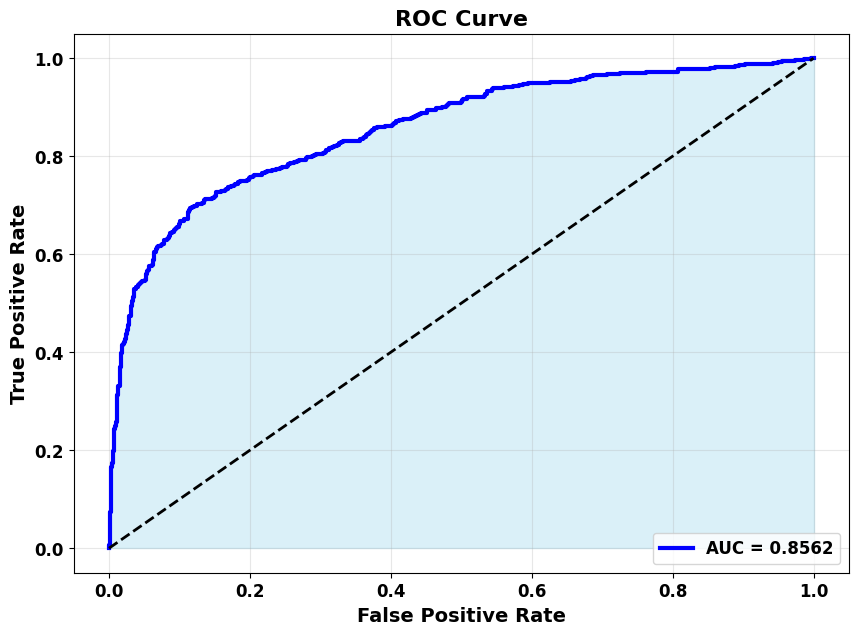

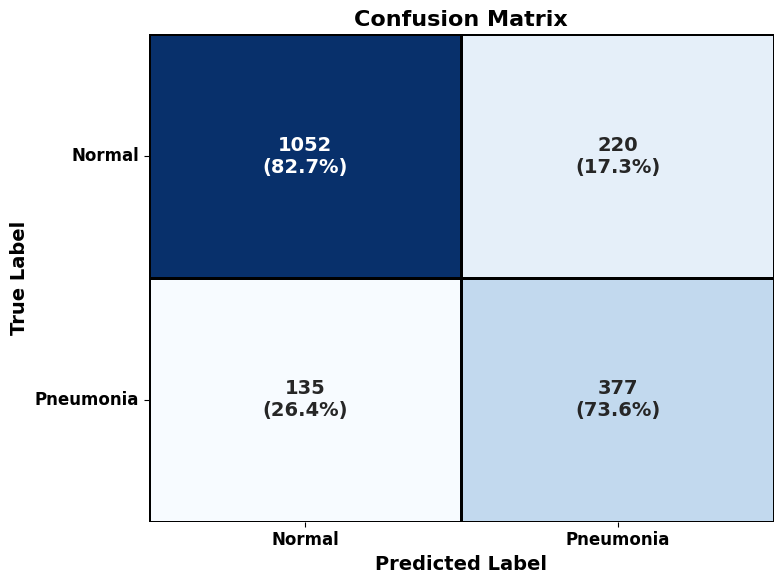

Saving visualizations...
Visualizations saved to /content/drive/MyDrive/NIH_models/Quantized/
Evaluation complete!


In [ ]:
#################### manual threshold
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import os
import gc
from tqdm import tqdm
import matplotlib as mpl

# Configure matplotlib for bold text
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['font.size'] = 12


# SETUP AND CONFIGURATION
#
# Path configuration
quantized_dir = '/content/drive/MyDrive/NIH_models/Quantized/'
quantized_model_path = os.path.join(quantized_dir, 'EffNetB4_quantized_hybrid.tflite')
test_dir = "/content/drive/MyDrive/NIH_processed/test"
img_size = (224, 224)
class_names = ['Normal', 'Pneumonia']  # 0=Normal, 1=Pneumonia

# Ensure output directory exists
os.makedirs(quantized_dir, exist_ok=True)


# PREPARE TEST DATASET (MEMORY-EFFICIENT)

print("Preparing test dataset...")

# Load images individually without batching
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='binary',
    image_size=img_size,
    batch_size=None,  # Process one image at a time
    shuffle=False
)

# Preprocess each image for EfficientNet
def preprocess(image, label):
    return tf.keras.applications.efficientnet.preprocess_input(image), label

test_ds = test_ds.map(preprocess)
total_images = len(list(test_ds))
print(f"Loaded {total_images} test images")


# SETUP QUANTIZED MODEL

print("Initializing quantized model...")

# Clean up memory before loading
tf.keras.backend.clear_session()
gc.collect()

# Load TFLite model
interpreter = tf.lite.Interpreter(quantized_model_path)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Configure for single-image processing
interpreter.resize_tensor_input(input_details[0]['index'], [1, *img_size, 3])
interpreter.allocate_tensors()
print("Model ready for inference")


# RUN INFERENCE WITH PROGRESS TRACKING
print("Starting image-by-image inference...")
true_labels = []
predictions = []

# Process images with progress bar
for image, label in tqdm(test_ds, total=total_images, desc="Processing Images"):
    try:
        # Prepare input tensor (add batch dimension)
        input_tensor = tf.expand_dims(image, axis=0)

        # Run inference
        interpreter.set_tensor(input_details[0]['index'], input_tensor)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])

        # Store results
        true_labels.append(label.numpy().item())
        predictions.append(output.squeeze().item())

    except Exception as e:
        print(f"Error processing image: {str(e)}")
        continue  # Skip failed images

    # Clean up memory after each image
    del image, input_tensor, output
    if len(true_labels) % 100 == 0:
        gc.collect()  # Periodic cleanup

# Convert to arrays for metrics
true_labels = np.array(true_labels)
predictions = np.array(predictions)
print(f"Completed inference on {len(true_labels)} images")


# CALCULATE PERFORMANCE METRICS
print("Computing evaluation metrics...")

# Convert probabilities to class predictions
predicted_labels = (predictions > 0.4294).astype(int)

# Calculate core metrics
accuracy = np.mean(true_labels == predicted_labels)
sensitivity = recall_score(true_labels, predicted_labels, pos_label=1)  # Pneumonia recall
specificity = recall_score(true_labels, predicted_labels, pos_label=0)  # Normal recall
precision = precision_score(true_labels, predicted_labels, pos_label=1)
f1 = f1_score(true_labels, predicted_labels, pos_label=1)
roc_auc = roc_auc_score(true_labels, predictions)

# Confusion matrix with percentages
cm = confusion_matrix(true_labels, predicted_labels)
cm_percent = cm / cm.sum(axis=1, keepdims=True)  # Row-wise percentages


# DISPLAY RESULTS
print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy:          {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}  [Pneumonia detection]")
print(f"Specificity (TNR): {specificity:.4f}  [Normal detection]")
print(f"Precision:         {precision:.4f}  [Pneumonia]")
print(f"F1-Score:          {f1:.4f}       [Pneumonia]")
print(f"ROC-AUC:           {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels,
                           target_names=class_names, digits=4))


# DISPLAY VISUALIZATIONS IN NOTEBOOK
print("\nGenerating visualizations...")

# 1. ROC Curve
plt.figure(figsize=(10, 7))
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.fill_between(fpr, tpr, alpha=0.3, color='skyblue')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Confusion Matrix Heatmap with bold annotations
plt.figure(figsize=(8, 6))
annotations = [[f"{cm[i,j]}\n({cm_percent[i,j]:.1%})" for j in range(2)] for i in range(2)]
sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, linewidths=2, linecolor='black', annot_kws={'weight': 'bold', 'size': 14})

plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()
plt.show()

# SAVE VISUALIZATIONS (OPTIONAL)
print("Saving visualizations...")
# Save ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=3, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.fill_between(fpr, tpr, alpha=0.3, color='skyblue')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
#plt.savefig(os.path.join(quantized_dir, 'ROC_Curve.png'), bbox_inches='tight')
plt.close()

# Save Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, linewidths=2, linecolor='black', annot_kws={'weight': 'bold', 'size': 14})
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()
#plt.savefig(os.path.join(quantized_dir, 'Confusion_Matrix.png'), bbox_inches='tight')
plt.close()

print(f"Visualizations saved to {quantized_dir}")
print("Evaluation complete!")

# **SECTION B: DEPLOYMENT METRICS CALCULATIONS - EfficientNetB4 NIH**

#### **A. DEPLOYMENT METRICS OF THE ORIGINAL EFFICIENTNETB4 MODEL**

In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
from PIL import Image
import glob
import psutil

# System Hardware Specifications

cpu_freq = psutil.cpu_freq().current
cpu_cores_phys = psutil.cpu_count(logical=False)
cpu_cores_log = psutil.cpu_count(logical=True)
total_ram_gb = psutil.virtual_memory().total / (1024 ** 3)
print(f"CPU: {cpu_freq:.0f} MHz, {cpu_cores_phys}p/{cpu_cores_log}l cores")
print(f"Total RAM: {total_ram_gb:.2f} GB")


# CONFIGURE COLAB TO MIMIC RASPBERRY PI 4 ENVIRONMENT

PI_CORES = 4        # Quad-core ARM Cortex-A72
PI_CPU_GHZ = 1.5     # 1.5GHz clock speed

print("\nOriginal TensorFlow thread configuration:")
print(f"- Intra-op threads: {tf.config.threading.get_intra_op_parallelism_threads()} (default)")
print(f"- Inter-op threads: {tf.config.threading.get_inter_op_parallelism_threads()} (default)")

print("\nConfiguring Colab to mimic Raspberry Pi 4:")
print(f"- Limiting TensorFlow to use {PI_CORES} threads")
print(f"- Mimicking {PI_CPU_GHZ}GHz clock speed behavior")

os.environ['TF_NUM_INTRAOP_THREADS'] = str(PI_CORES)
os.environ['TF_NUM_INTEROP_THREADS'] = '1'


try:
    current_ghz = psutil.cpu_freq().current / 1000
    clock_factor = current_ghz / PI_CPU_GHZ
    print(f"Clock speed adjustment factor: {clock_factor:.2f}x")
except:
    clock_factor = 1.5
    print("Using default clock speed factor: 1.50x")

# MODEL SIZE CALCULATION
def get_model_size(path):
    """Return file size in MB"""
    if os.path.exists(path):
        size_bytes = os.path.getsize(path)
        return size_bytes / (1024 * 1024)
    return 0

# Paths for EfficientNetB4
MODEL_PATH = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'
TEST_DIR = "/content/drive/MyDrive/NIH_processed/test"

model_size_mb = get_model_size(MODEL_PATH)
print(f"\nEfficientNetB4 model file size: {model_size_mb:.2f} MB")

# PERFORMANCE MEASUREMENT FUNCTION ADJUSTED FOR EfficientNetB4
def measure_performance_keras(model_path, test_dir):
    # Load Keras model
    print(f"Loading model: {os.path.basename(model_path)}")
    model = tf.keras.models.load_model(model_path)

    # Report model size
    model_size_mb = get_model_size(model_path)
    print(f"Model file size: {model_size_mb:.2f} MB")

    # EfficientNetB4 specific settings
    target_size = (224, 224)
    print(f"Input dimensions: {target_size[0]}x{target_size[1]} pixels")

    # Collect test images (25 from each class)
    image_paths = []
    for condition in ['normal', 'pneumonia']:
        condition_path = os.path.join(test_dir, condition)
        if os.path.exists(condition_path):
            # Include PNG images in addition to JPEG/JPG
            images = glob.glob(os.path.join(condition_path, '*.jpeg'))[:25]
            images += glob.glob(os.path.join(condition_path, '*.jpg'))[:25]
            images += glob.glob(os.path.join(condition_path, '*.png'))[:25]
            image_paths.extend(images)

    print(f"Found {len(image_paths)} test images")

    # Prepare image function for EfficientNetB4
    def prepare_image(path):
        img = Image.open(path).convert('RGB').resize(target_size)
        img_array = np.array(img, dtype=np.float32)
        img_array = np.expand_dims(img_array, axis=0)
        # Apply EfficientNet preprocessing
        img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
        return img_array

    # Warm-up run
    model(prepare_image(image_paths[0]))

    # Measure inference times
    inference_times = []
    for img_path in image_paths:
        input_data = prepare_image(img_path)
        start = time.perf_counter()
        predictions = model(input_data)
        duration = (time.perf_counter() - start) * 1000  # ms
        # Apply clock speed adjustment
        inference_times.append(duration * clock_factor)

    # Calculate statistics
    mean_time = np.mean(inference_times)
    std_time = np.std(inference_times)

    return mean_time, std_time, len(image_paths), model_size_mb

# RUN MEASUREMENTS (UNCHANGED LOGIC)
print("\n" + "=" * 50)
print("Starting measurements with Pi-simulated environment")
print(f"Applied constraints: {PI_CORES} threads, {clock_factor:.2f}x clock adjustment")
print("=" * 50 + "\n")

mean_time, std_time, img_count, model_size_mb = measure_performance_keras(MODEL_PATH, TEST_DIR)

print("\n" + "=" * 50)
print("Performance Results - EfficientNetB4 Model:")
print("=" * 50)
print(f"Model: {os.path.basename(MODEL_PATH)}")
print(f"Model file size: {model_size_mb:.2f} MB")
print(f"Images processed: {img_count}")
print(f"Adjusted inference time: {mean_time:.2f} ± {std_time:.2f} ms")
print("=" * 50)

CPU: 2200 MHz, 1p/2l cores
Total RAM: 12.67 GB

Original TensorFlow thread configuration:
- Intra-op threads: 0 (default)
- Inter-op threads: 0 (default)

Configuring Colab to mimic Raspberry Pi 4:
- Limiting TensorFlow to use 4 threads
- Mimicking 1.5GHz clock speed behavior
Clock speed adjustment factor: 1.47x

EfficientNetB4 model file size: 208.32 MB

Starting measurements with Pi-simulated environment
Applied constraints: 4 threads, 1.47x clock adjustment

Loading model: EffNetB4_epoch_15.h5


Model file size: 208.32 MB
Input dimensions: 224x224 pixels
Found 50 test images

Performance Results - EfficientNetB4 Model:
Model: EffNetB4_epoch_15.h5
Model file size: 208.32 MB
Images processed: 50
Adjusted inference time: 1461.07 ± 425.52 ms


#### **B. DEPLOYMENT METRICS OF THE QUANTISED EFFICIENTNETB4 MODEL**

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time
from PIL import Image
import glob
import psutil
import gc


# System Hardware Specifications

cpu_freq = psutil.cpu_freq().current
cpu_cores_phys = psutil.cpu_count(logical=False)
cpu_cores_log = psutil.cpu_count(logical=True)
total_ram_gb = psutil.virtual_memory().total / (1024 ** 3)
print(f"CPU: {cpu_freq:.0f} MHz, {cpu_cores_phys}p/{cpu_cores_log}l cores")
print(f"Total RAM: {total_ram_gb:.2f} GB")


# CONFIGURE COLAB TO MIMIC RASPBERRY PI 4 ENVIRONMENT

PI_CORES = 4        # Quad-core ARM Cortex-A72
PI_CPU_GHZ = 1.5     # 1.5GHz clock speed

print("\nOriginal TensorFlow thread configuration:")
print(f"- Intra-op threads: {tf.config.threading.get_intra_op_parallelism_threads()} (default)")
print(f"- Inter-op threads: {tf.config.threading.get_inter_op_parallelism_threads()} (default)")

print("\nConfiguring Colab to mimic Raspberry Pi 4:")
print(f"- Limiting TensorFlow to use {PI_CORES} threads")
print(f"- Mimicking {PI_CPU_GHZ}GHz clock speed behavior")

os.environ['TF_NUM_INTRAOP_THREADS'] = str(PI_CORES)
os.environ['TF_NUM_INTEROP_THREADS'] = '1'

# Get and display original CPU clock speed
try:
    original_ghz = psutil.cpu_freq().current / 1000
    print(f"\nOriginal CPU clock speed: {original_ghz:.2f} GHz")
    print(f"Target Raspberry Pi clock speed: {PI_CPU_GHZ} GHz")

    clock_factor = original_ghz / PI_CPU_GHZ
    print(f"Clock speed adjustment factor: {clock_factor:.2f}x")
except:
    original_ghz = "N/A"
    clock_factor = 1.5
    print("Could not detect CPU frequency - using default clock speed factor: 1.50x")


# MODEL SIZE CALCULATION (ON-DISK FILE SIZE)

def get_model_size(path):
    """Return file size in MB"""
    if os.path.exists(path):
        size_bytes = os.path.getsize(path)
        return size_bytes / (1024 * 1024)
    return 0

quantized_dir = '/content/drive/MyDrive/NIH_models/Quantized/'
quantized_model_path = os.path.join(quantized_dir, 'EffNetB4_quantized_hybrid.tflite')
model_size_mb = get_model_size(quantized_model_path)
print(f"\nQuantized EfficientNetB4 model file size: {model_size_mb:.2f} MB")


# TEST IMAGE COLLECTION (LIMITED TO 50 IMAGES)

test_dir = "/content/drive/MyDrive/NIH_processed/test"
img_size = (224, 224)

# Collect exactly 50 test images
image_paths = []
for cls in os.listdir(test_dir):
    class_path = os.path.join(test_dir, cls)
    if os.path.isdir(class_path):
        image_paths += glob.glob(os.path.join(class_path, '*.jpeg'))
        image_paths += glob.glob(os.path.join(class_path, '*.jpg'))
        image_paths += glob.glob(os.path.join(class_path, '*.png'))
    if len(image_paths) >= 50:
        break

image_paths = image_paths[:50]  # Ensure exactly 50 images
print(f"Selected {len(image_paths)} test images for deployment")


# SETUP QUANTIZED MODEL
print("Initializing quantized model...")
tf.keras.backend.clear_session()
gc.collect()

interpreter = tf.lite.Interpreter(quantized_model_path)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.resize_tensor_input(input_details[0]['index'], [1, *img_size, 3])
interpreter.allocate_tensors()
print("Model ready for inference")


# DEPLOYMENT METRICS: INFERENCE TIME

def prepare_image(path):
    img = Image.open(path).convert('RGB').resize(img_size)
    img_array = np.array(img, dtype=np.float32)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Warm-up
interpreter.set_tensor(input_details[0]['index'], prepare_image(image_paths[0]))
interpreter.invoke()

inference_times = []
for img_path in image_paths:
    input_data = prepare_image(img_path)
    start = time.perf_counter()
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    duration = (time.perf_counter() - start) * 1000  # ms
    inference_times.append(duration * clock_factor)

mean_time = np.mean(inference_times)
std_time = np.std(inference_times)
base_power = 2.7  # Pi 4 idle power
power_w = base_power + min(mean_time/100 * 0.25, 3.7)  # Capped at 6.4W (Optional: just for estimate)


# REPORT DEPLOYMENT METRICS
print("\n" + "=" * 50)
print("Deployment Results - Quantized EfficientNetB4:")
print("=" * 50)
print(f"Model: {os.path.basename(quantized_model_path)}")
print(f"Model file size: {model_size_mb:.2f} MB")
print(f"Images processed: 50")
print(f"Adjusted inference time: {mean_time:.2f} ± {std_time:.2f} ms")
print("=" * 50)

CPU: 2200 MHz, 1p/2l cores
Total RAM: 12.67 GB

Original TensorFlow thread configuration:
- Intra-op threads: 0 (default)
- Inter-op threads: 0 (default)

Configuring Colab to mimic Raspberry Pi 4:
- Limiting TensorFlow to use 4 threads
- Mimicking 1.5GHz clock speed behavior

Original CPU clock speed: 2.20 GHz
Target Raspberry Pi clock speed: 1.5 GHz
Clock speed adjustment factor: 1.47x

Quantized EfficientNetB4 model file size: 18.59 MB
Selected 50 test images for deployment
Initializing quantized model...
Model ready for inference

Deployment Results - Quantized EfficientNetB4:
Model: EffNetB4_quantized_hybrid.tflite
Model file size: 18.59 MB
Images processed: 50
Adjusted inference time: 232.69 ± 93.50 ms
Estimated power: 3.28 W


##### Model size

In [ ]:
import os

# Path to the original model
original_model_path = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'

# Get the file size in bytes and convert to MB
if os.path.exists(original_model_path):
    original_size_bytes = os.path.getsize(original_model_path)
    original_size_mb = original_size_bytes / (1024 * 1024)
    print(f"Original model file size: {original_size_mb:.2f} MB")
else:
    print(f"Model file not found at: {original_model_path}")

Original model file size: 208.32 MB


In [ ]:
import os

# Path to the quantized INT8 model
quantized_int8_model_path = '/content/drive/MyDrive/NIH_models/Quantized_PTPQ/EffNetB4_quantized_int8.tflite'

# Get the file size in bytes and convert to MB
if os.path.exists(quantized_int8_model_path):
    quantized_int8_size_bytes = os.path.getsize(quantized_int8_model_path)
    quantized_int8_size_mb = quantized_int8_size_bytes / (1024 * 1024)
    print(f"Quantized INT8 model file size: {quantized_int8_size_mb:.2f} MB")
else:
    print(f"Quantized INT8 model file not found at: {quantized_int8_model_path}")

Quantized INT8 model file size: 19.65 MB


-------

# **SECTION C: GradCAM Implementation**

---------

#### **a. Full Grad-CAM - Pneumonia**

Found 512 pneumonia images


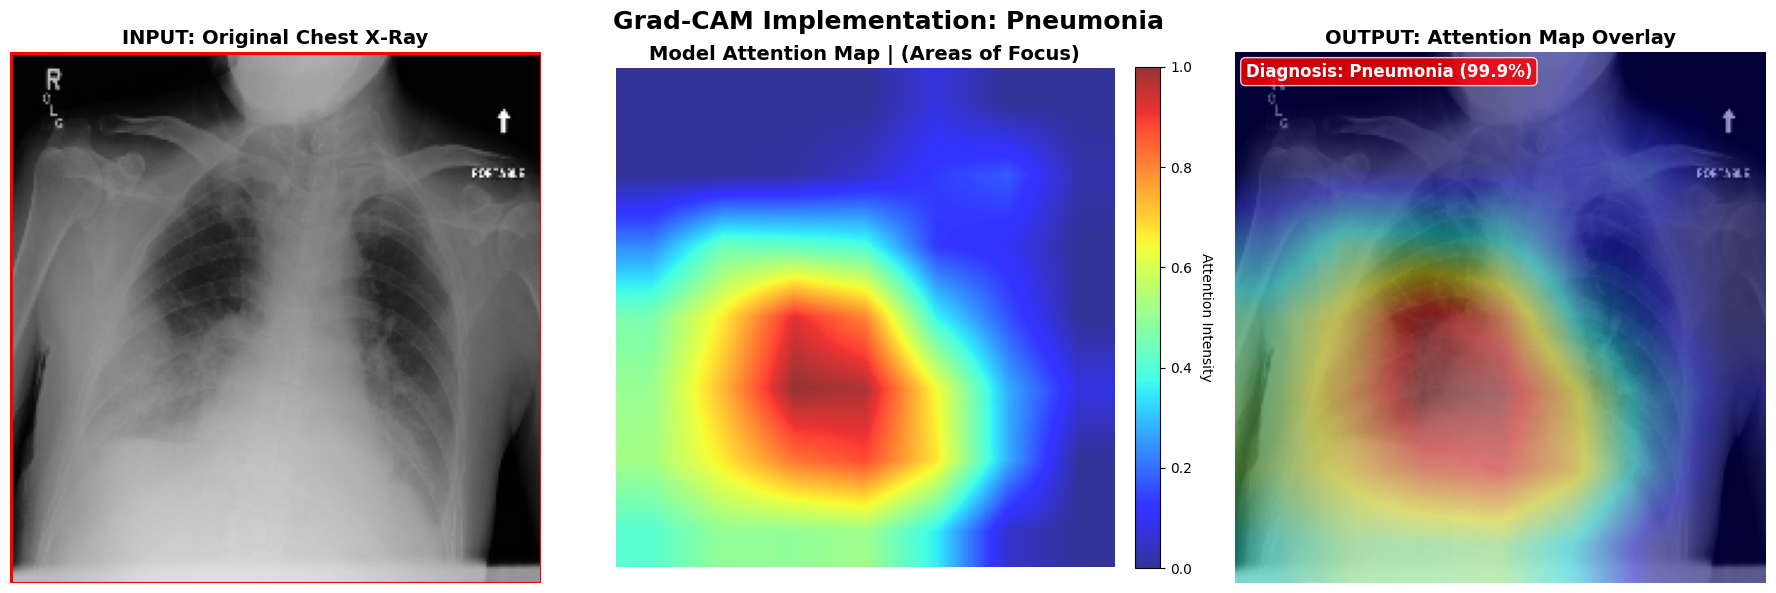

Attempt 1: 00009925_012.png | Pneumonia (99.9%) | raw score = 0.9994
Pneumonia-positive image successfully visualized.


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import random
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

class PneumoniaGradCAM:
    """
    Grad-CAM implementation for visualizing pneumonia detection in chest X-rays.
    """
    def __init__(self, model_path):
        self.model = load_model(model_path)
        self.target_size = (224, 224)
        self.last_conv_layer = self._find_target_layer()
        self.grad_model = Model(
            inputs=self.model.inputs,
            outputs=[
                self.model.get_layer(self.last_conv_layer).output,
                self.model.output
            ]
        )
        # Determine model output type
        self.output_shape = self.model.output_shape
        if len(self.output_shape) == 2 and self.output_shape[1] == 2:
            self.model_type = "softmax"
        else:
            self.model_type = "sigmoid"

    def _find_target_layer(self):
        for layer in reversed(self.model.layers):
            if 'conv' in layer.name.lower() and len(layer.output.shape) == 4:
                return layer.name
        return 'top_conv'

    def prepare_image(self, img_path):
        # Load & preprocess
        img = image.load_img(img_path, target_size=self.target_size)
        arr = image.img_to_array(img)
        arr = np.expand_dims(arr, 0)
        arr = preprocess_input(arr)
        # Original RGB for display
        orig = cv2.imread(img_path)
        orig = cv2.resize(orig, self.target_size)
        orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
        return arr, orig

    def compute_heatmap(self, img_array):
        with tf.GradientTape() as tape:
            conv_out, preds = self.grad_model(img_array)
            if self.model_type == "softmax":
                # Use pneumonia class (index 1)
                score = preds[:, 1]
            else:
                # Sigmoid output
                score = preds[:, 0]
        grads = tape.gradient(score, conv_out)
        pooled = tf.reduce_mean(grads, axis=(0,1,2))
        conv = conv_out[0]
        heatmap = conv @ pooled[..., tf.newaxis]
        heatmap = tf.squeeze(tf.maximum(heatmap, 0))
        heatmap = cv2.resize(heatmap.numpy(), self.target_size)
        if np.max(heatmap) > 0:
            heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
        return heatmap

    def create_overlay(self, orig, heatmap, alpha=0.4):
        hm_col = cv2.applyColorMap((heatmap*255).astype('uint8'),
                                  cv2.COLORMAP_JET)
        hm_col = cv2.cvtColor(hm_col, cv2.COLOR_BGR2RGB)
        overlay = hm_col * alpha + orig * (1 - alpha)
        return overlay.astype('uint8')

    def analyze_xray(self, img_path):
        arr, orig = self.prepare_image(img_path)
        predictions = self.model.predict(arr, verbose=0)[0]

        # Handle different model output types
        if self.model_type == "softmax":
            # Softmax output: [normal_prob, pneumonia_prob]
            normal_prob = predictions[0]
            pneumonia_prob = predictions[1]
            raw_score = pneumonia_prob
        else:
            # Sigmoid output: single probability
            pneumonia_prob = predictions[0]
            normal_prob = 1 - pneumonia_prob
            raw_score = pneumonia_prob

        label = "Pneumonia" if pneumonia_prob > 0.5 else "Normal"
        confidence = pneumonia_prob * 100 if label == "Pneumonia" else normal_prob * 100

        heatmap = self.compute_heatmap(arr)
        overlay = self.create_overlay(orig, heatmap)

        # Visualization
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Grad-CAM Implementation: {label}',
                     fontsize=18, fontweight='bold', y=0.98)

        # Original + border
        axes[0].imshow(orig, cmap='gray')
        border_color = 'red' if label == "Pneumonia" else 'green'
        axes[0].add_patch(Rectangle((0, 0), 224, 224,
                                   fill=False, edgecolor=border_color, linewidth=3))
        axes[0].set_title('INPUT: Original Chest X‑Ray', fontsize=14, fontweight='bold')
        axes[0].axis('off')

        # Heatmap + colorbar
        hm_im = axes[1].imshow(heatmap, cmap='jet', alpha=0.8)
        axes[1].set_title('Model Attention Map | (Areas of Focus)',
                           fontsize=14, fontweight='bold')
        axes[1].axis('off')
        cbar = plt.colorbar(hm_im, ax=axes[1], fraction=0.046, pad=0.04)
        cbar.set_label('Attention Intensity', rotation=270, labelpad=15)

        # Overlay + diagnosis
        axes[2].imshow(overlay)
        axes[2].set_title(f'OUTPUT: Attention Map Overlay',  # Updated title
                          fontsize=14, fontweight='bold')
        axes[2].axis('off')

        # Combined diagnosis and confidence
        diagnosis_text = f"Diagnosis: {label} ({confidence:.1f}%)"  # Combined text
        info_color = 'red' if label == "Pneumonia" else 'green'
        axes[2].text(0.02, 0.98, diagnosis_text,
                     transform=axes[2].transAxes, fontsize=12, fontweight='bold',
                     verticalalignment='top', color='white',
                     bbox=dict(boxstyle='round', facecolor=info_color,
                               alpha=0.8, edgecolor='white'))

        plt.tight_layout()
        plt.show()

        return label, confidence, raw_score

def run_pneumonia_analysis(max_attempts=20):
    MODEL_PATH = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'
    PNEUMONIA_DIR = '/content/drive/MyDrive/NIH_processed/test/pneumonia'

    gradcam = PneumoniaGradCAM(MODEL_PATH)
    imgs = glob.glob(os.path.join(PNEUMONIA_DIR, '*.png'))
    if not imgs:
        raise FileNotFoundError("No images found in pneumonia directory.")

    print(f"Found {len(imgs)} pneumonia images")

    pneumonia_found = False
    for i in range(1, max_attempts + 1):
        img = random.choice(imgs)
        label, conf, raw = gradcam.analyze_xray(img)
        print(f"Attempt {i}: {os.path.basename(img)} | {label} ({conf:.1f}%) | raw score = {raw:.4f}")

        if label == "Pneumonia":
            print("Pneumonia-positive image successfully visualized.")
            pneumonia_found = True
            break

    if not pneumonia_found:
        print(f"\nWARNING: No pneumonia-positive predictions in {max_attempts} attempts")
        print("Possible issues:")
        print("1. Model might be misclassifying pneumonia images")
        print("2. Model performance might be poor on this dataset")
        print("3. Preprocessing might not match training configuration")

        # Find the image with highest pneumonia probability
        print("\nFinding the image with highest pneumonia probability...")
        max_prob = -1
        max_img = None
        for img in random.sample(imgs, min(50, len(imgs))):
            arr, _ = gradcam.prepare_image(img)
            predictions = gradcam.model.predict(arr, verbose=0)[0]

            if gradcam.model_type == "softmax":
                prob = predictions[1]
            else:
                prob = predictions[0]

            if prob > max_prob:
                max_prob = prob
                max_img = img

        print(f"Image with highest pneumonia probability: {max_prob:.4f}")
        print(f"Visualizing: {os.path.basename(max_img)}")
        gradcam.analyze_xray(max_img)

if __name__ == "__main__":
    run_pneumonia_analysis()

#### **b. Full Grad-CAM - Normal**

PNEUMONIA DETECTION ANALYSIS
Analyzing: 00025924_015.png (from normal folder)



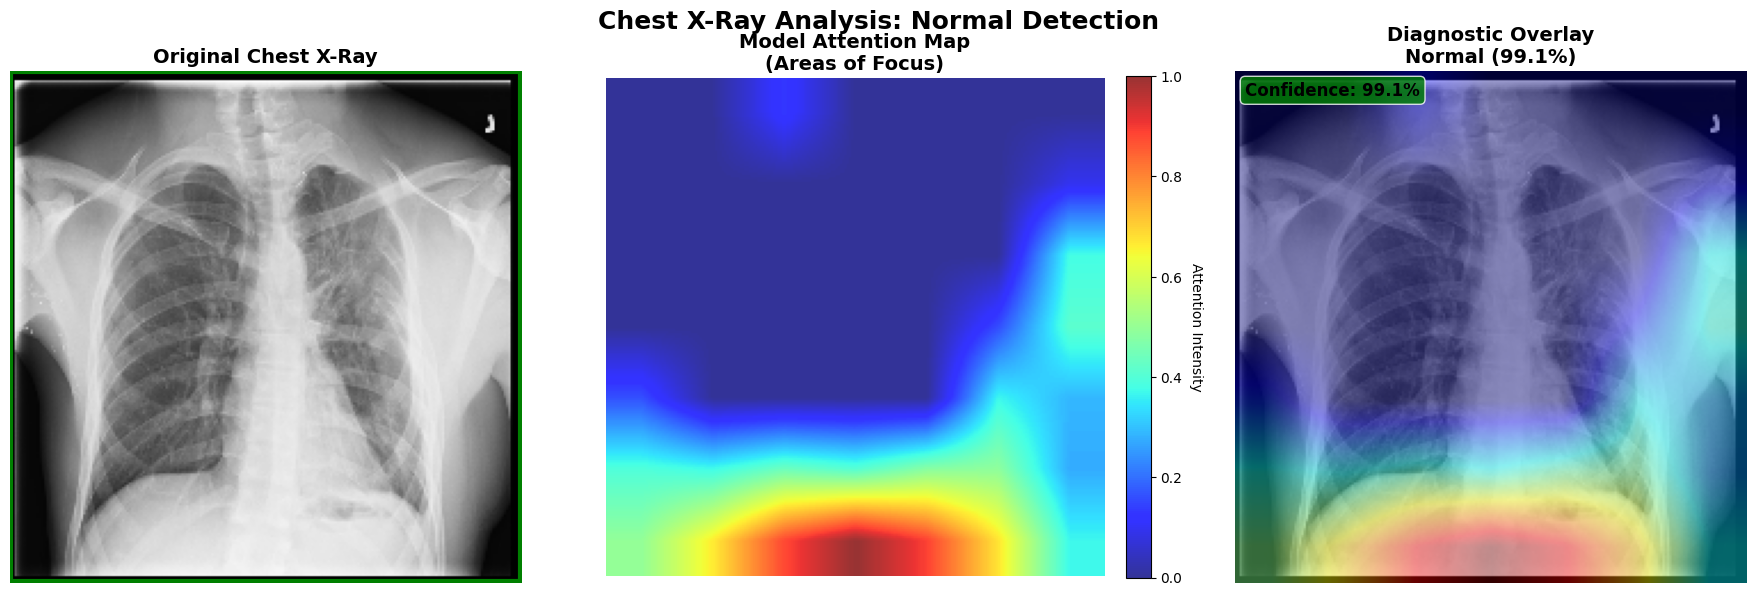

Analysis Results:
• Image: 00025924_015.png (normal)
• Diagnosis: Normal
• Confidence: 99.1%
• Raw Score: 0.0086


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import random
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

class PneumoniaGradCAM:
    """
    GradCAM implementation for visualizing pneumonia detection in chest X-rays
    Uses gradient-based localization to highlight important regions
    """

    def __init__(self, model_path):
        """Load the trained pneumonia detection model"""
        self.model = load_model(model_path)
        self.target_size = (224, 224)

        # Identify the final convolutional layer for feature extraction
        self.last_conv_layer = self._find_target_layer()

        # Build gradient computation model
        self.grad_model = Model(
            inputs=self.model.inputs,
            outputs=[self.model.get_layer(self.last_conv_layer).output, self.model.output]
        )

    def _find_target_layer(self):
        """Locate the last convolutional layer in EfficientNetB4"""
        for layer in reversed(self.model.layers):
            if 'conv' in layer.name.lower() and len(layer.output.shape) == 4:
                return layer.name
        return 'top_conv'

    def prepare_image(self, img_path):
        """Load and preprocess chest X-ray image"""
        # Prepare image for model input
        img = image.load_img(img_path, target_size=self.target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Keep original for visualization
        original_img = cv2.imread(img_path)
        original_img = cv2.resize(original_img, self.target_size)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

        return img_array, original_img

    def compute_heatmap(self, img_array):
        """
        Generate activation heatmap using gradient-based localization
        Shows where the model focuses attention for pneumonia detection
        """
        # Forward pass with gradient tracking
        with tf.GradientTape() as tape:
            conv_outputs, predictions = self.grad_model(img_array)
            class_score = predictions[:, 0]

        # Calculate gradients of the prediction with respect to feature maps
        grads = tape.gradient(class_score, conv_outputs)

        # Weight each feature map by its importance (global average pooling)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

        # Generate weighted feature map combination
        conv_outputs = conv_outputs[0]
        heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
        heatmap = tf.squeeze(heatmap)

        # Apply ReLU to keep only positive contributions
        heatmap = tf.maximum(heatmap, 0)
        heatmap = cv2.resize(heatmap.numpy(), self.target_size)

        # Normalize intensity values
        if np.max(heatmap) > 0:
            heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

        return heatmap

    def create_overlay(self, original_img, heatmap, alpha=0.4):
        """
        Create subtle overlay that preserves X-ray visibility
        Lower alpha value keeps the original image more visible
        """
        # Apply jet colormap to heatmap
        heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
        heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

        # Create gentle overlay that doesn't overwhelm the X-ray
        overlay = heatmap_colored * alpha + original_img * (1 - alpha)

        return overlay.astype(np.uint8)

    def analyze_xray(self, img_path):
        """Complete analysis of chest X-ray with visual explanation"""
        # Process the image
        img_array, original_img = self.prepare_image(img_path)

        # Get model prediction
        prediction = self.model.predict(img_array, verbose=0)[0][0]
        predicted_class = "Pneumonia" if prediction > 0.5 else "Normal"
        confidence = prediction * 100 if prediction > 0.5 else (1 - prediction) * 100

        # Generate attention heatmap
        heatmap = self.compute_heatmap(img_array)

        # Create overlay visualization
        overlay = self.create_overlay(original_img, heatmap)

        # Display comprehensive analysis
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Chest X-Ray Analysis: {predicted_class} Detection',
                    fontsize=18, fontweight='bold', y=0.98)

        # Original X-ray with diagnostic border
        axes[0].imshow(original_img, cmap='gray')
        axes[0].set_title('Original Chest X-Ray', fontsize=14, fontweight='bold')
        axes[0].axis('off')

        # Color-coded border based on diagnosis
        border_color = 'red' if predicted_class == "Pneumonia" else 'green'
        axes[0].add_patch(Rectangle((0, 0), self.target_size[0]-1, self.target_size[1]-1,
                                  fill=False, edgecolor=border_color, linewidth=3))

        # Attention heatmap
        heatmap_display = axes[1].imshow(heatmap, cmap='jet', alpha=0.8)
        axes[1].set_title('Model Attention Map\n(Areas of Focus)', fontsize=14, fontweight='bold')
        axes[1].axis('off')

        # Add intensity scale
        cbar = plt.colorbar(heatmap_display, ax=axes[1], fraction=0.046, pad=0.04)
        cbar.set_label('Attention Intensity', rotation=270, labelpad=15)

        # Enhanced overlay visualization
        axes[2].imshow(overlay)
        axes[2].set_title(f'Diagnostic Overlay\n{predicted_class} ({confidence:.1f}%)',
                         fontsize=14, fontweight='bold')
        axes[2].axis('off')

        # Add diagnostic information box
        info_color = 'red' if predicted_class == 'Pneumonia' else 'green'

        axes[2].text(0.02, 0.98, f'Confidence: {confidence:.1f}%', transform=axes[2].transAxes,
                    fontsize=12, fontweight='bold', verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor=info_color, alpha=0.8, edgecolor='white'))

        plt.tight_layout()
        plt.show()

        return predicted_class, confidence

def run_pneumonia_analysis():
    """
    Execute pneumonia detection analysis on a random normal test image
    """
    # Model and data paths
    MODEL_PATH = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'
    TEST_DIR = "/content/drive/MyDrive/NIH_processed/test"
    NORMAL_DIR = os.path.join(TEST_DIR, 'normal')

    # Initialize the analysis system
    gradcam = PneumoniaGradCAM(MODEL_PATH)

    # Gather normal test images
    if os.path.exists(NORMAL_DIR):
        normal_images = glob.glob(os.path.join(NORMAL_DIR, '*.png'))
    else:
        normal_images = []

    if not normal_images:
        print("No normal images found. Please check the directory path.")
        return

    # Select random normal image for analysis
    selected_image = random.choice(normal_images)
    image_name = os.path.basename(selected_image)

    print("=" * 60)
    print("PNEUMONIA DETECTION ANALYSIS")
    print("=" * 60)
    print(f"Analyzing: {image_name} (from normal folder)")
    print()

    # Perform the analysis
    diagnosis, confidence = gradcam.analyze_xray(selected_image)

    # Display results
    print(f"Analysis Results:")
    print(f"• Image: {image_name} (normal)")
    print(f"• Diagnosis: {diagnosis}")
    print(f"• Confidence: {confidence:.1f}%")
    print(f"• Raw Score: {gradcam.model.predict(gradcam.prepare_image(selected_image)[0], verbose=0)[0][0]:.4f}")
    print("=" * 60)

    return gradcam

# Execute the analysis
if __name__ == "__main__":
    gradcam = run_pneumonia_analysis()

# **Grad-CAM Implementation Optimised Method for Low Resource Use**

#### **A. Optimised Grad-CAM Positive case**

CPU: 2200 MHz, 1p/2l cores
Total RAM: 12.67 GB

Original TensorFlow thread configuration:
- Intra-op threads: 0 (default)
- Inter-op threads: 0 (default)

Configuring Colab to mimic Raspberry Pi 4:
- Limiting TensorFlow to use 4 threads
- Mimicking 1.5GHz clock speed behavior

Original CPU clock speed: 2.20 GHz
Target Raspberry Pi clock speed: 1.5 GHz
Clock speed adjustment factor: 1.47x


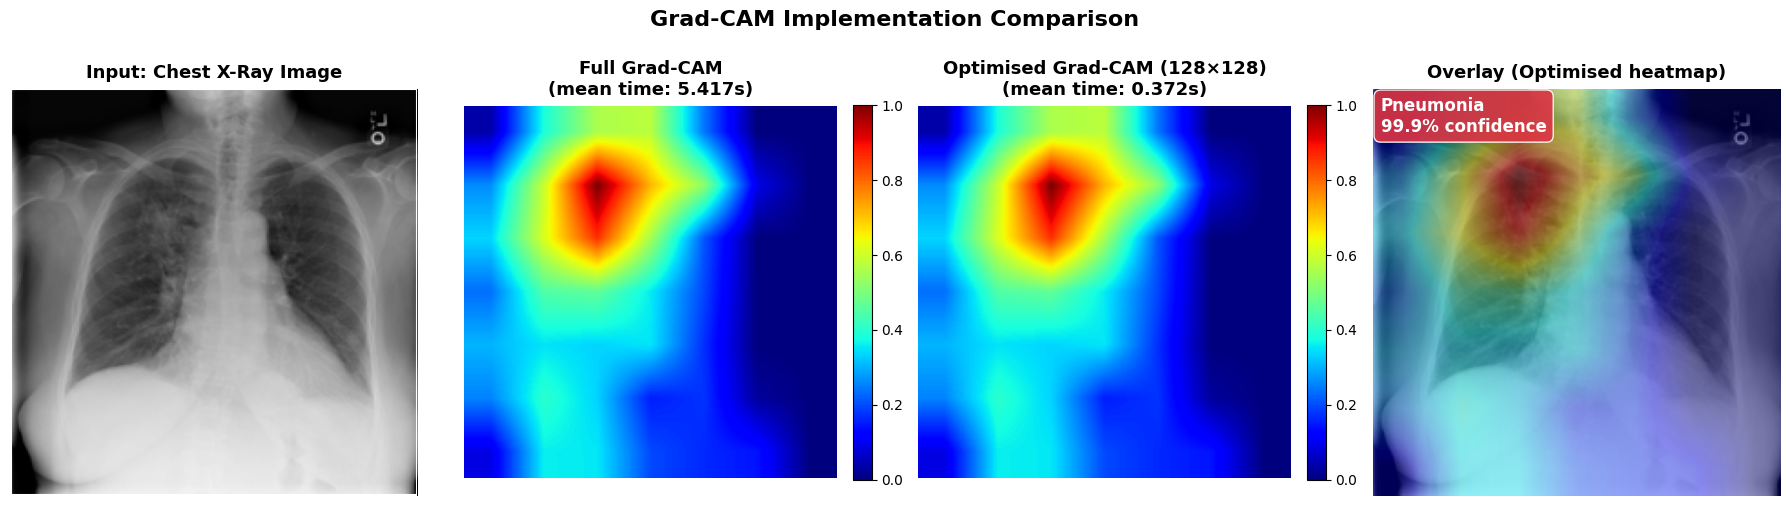


=== GRAD-CAM BENCHMARK SUMMARY ===
Number of images tested: 50
Full Grad-CAM: 5.417 ± 2.218 s (mean ± std)
Optimised Grad-CAM (128×128): 0.372 ± 0.127 s
Speedup (full / optimised): 14.56x
Explanation fidelity: mean correlation = 1.000, mean IoU@0.5 = 1.000


In [ ]:
# Grad-CAM Implementation (Optimised)
import os
import time
import gc
import psutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.efficientnet import preprocess_input
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')



# System Hardware Specifications

cpu_freq = psutil.cpu_freq().current
cpu_cores_phys = psutil.cpu_count(logical=False)
cpu_cores_log = psutil.cpu_count(logical=True)
total_ram_gb = psutil.virtual_memory().total / (1024 ** 3)
print(f"CPU: {cpu_freq:.0f} MHz, {cpu_cores_phys}p/{cpu_cores_log}l cores")
print(f"Total RAM: {total_ram_gb:.2f} GB")


# CONFIGURE COLAB TO MIMIC RASPBERRY PI 4 ENVIRONMENT

PI_CORES = 4        # Quad-core ARM Cortex-A72
PI_CPU_GHZ = 1.5     # 1.5GHz clock speed

print("\nOriginal TensorFlow thread configuration:")
print(f"- Intra-op threads: {tf.config.threading.get_intra_op_parallelism_threads()} (default)")
print(f"- Inter-op threads: {tf.config.threading.get_inter_op_parallelism_threads()} (default)")

print("\nConfiguring Colab to mimic Raspberry Pi 4:")
print(f"- Limiting TensorFlow to use {PI_CORES} threads")
print(f"- Mimicking {PI_CPU_GHZ}GHz clock speed behavior")

os.environ['TF_NUM_INTRAOP_THREADS'] = str(PI_CORES)
os.environ['TF_NUM_INTEROP_THREADS'] = '1'

# Get and display original CPU clock speed
try:
    original_ghz = psutil.cpu_freq().current / 1000
    print(f"\nOriginal CPU clock speed: {original_ghz:.2f} GHz")
    print(f"Target Raspberry Pi clock speed: {PI_CPU_GHZ} GHz")

    clock_factor = original_ghz / PI_CPU_GHZ
    print(f"Clock speed adjustment factor: {clock_factor:.2f}x")
except:
    original_ghz = "N/A"
    clock_factor = 1.5
    print("Could not detect CPU frequency - using default clock speed factor: 1.50x")


## Optimsed Grad-Cam Function.
class OptimisedClinicalGradCAM:
    """
    Minimal, focused Grad-CAM helper:
     - Loads H5 model (for Grad-CAM computation and classification used in overlays)
     - Compiles an optimized (downsampled) tf.function Grad-CAM path
     - Provides full-resolution Grad-CAM (for fidelity baseline) and optimised Grad-CAM
    """

    def __init__(self, h5_path, gradcam_size=(128, 128), target_size=(224, 224), clock_factor=1.0):
        # Use externally-provided clock factor (computed once at top)
        self.clock_factor = clock_factor

        # Load Keras model (used for Grad-CAM and label/confidence for overlay)
        self.h5_model = load_model(h5_path)
        self.target_size = target_size
        self.gradcam_size = gradcam_size

        # Identify last conv layer
        self.last_conv_layer = self._find_last_conv_layer()
        self.grad_model = Model(
            inputs=self.h5_model.inputs,
            outputs=[self.h5_model.get_layer(self.last_conv_layer).output, self.h5_model.output]
        )

        # Determine output type (softmax vs sigmoid)
        out_shape = self.h5_model.output_shape
        self.model_type = "softmax" if len(out_shape) == 2 and out_shape[1] == 2 else "sigmoid"

        # Compile optimized gradcam function
        self._compile_gradcam_function()

    def _find_last_conv_layer(self):
        for layer in reversed(self.h5_model.layers):
            if 'conv' in layer.name.lower() and len(layer.output.shape) == 4:
                return layer.name
        raise ValueError("No suitable convolutional layer found for Grad-CAM")

    def _compile_gradcam_function(self):
        """Compile an efficient Grad-CAM routine that accepts downsampled inputs."""
        @tf.function
        def _gradcam_compiled(input_tensor):
            # input_tensor shape: (1, grad_h, grad_w, 3) OR (1, target_h, target_w, 3)
            with tf.GradientTape() as tape:
                tape.watch(input_tensor)
                conv_output, preds = self.grad_model(input_tensor)
                if self.model_type == "softmax":
                    score = preds[:, 1]    # pneumonia class
                else:
                    score = preds[:, 0]

            grads = tape.gradient(score, conv_output)
            pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
            conv_output = conv_output[0]
            heatmap = tf.tensordot(conv_output, pooled_grads, axes=[[2], [0]])
            heatmap = tf.nn.relu(heatmap)
            heatmap = tf.image.resize(heatmap[..., tf.newaxis], self.target_size)[..., 0]
            return heatmap, preds

        self._gradcam_compiled = _gradcam_compiled
        # Warm-up compile (try with downsampled shape; fallback to target size)
        try:
            dummy = tf.zeros((1, *self.gradcam_size, 3), dtype=tf.float32)
            _ = self._gradcam_compiled(dummy)
        except Exception:
            dummy = tf.zeros((1, *self.target_size, 3), dtype=tf.float32)
            _ = self._gradcam_compiled(dummy)

    def prepare_image(self, img_path):
        img = Image.open(img_path).convert('RGB').resize(self.target_size)
        img_arr = np.array(img, dtype=np.float32)
        img_pre = preprocess_input(img_arr.copy())
        img_keras = np.expand_dims(img_pre, 0).astype(np.float32)
        img_display = np.array(img, dtype=np.uint8)
        return img_keras, img_display

    def generate_optimised_gradcam(self, img_keras):
        """Downsample + compiled tf.function path. Returns (heatmap, preds, elapsed_s)."""
        img_small = tf.image.resize(img_keras, self.gradcam_size, method='bilinear')
        start = time.perf_counter()
        try:
            heatmap_tf, preds = self._gradcam_compiled(img_small)
        except Exception:
            heatmap_tf, preds = self._gradcam_compiled(img_keras)
        elapsed = (time.perf_counter() - start) * self.clock_factor
        heatmap = heatmap_tf.numpy()
        # Normalise
        if heatmap.max() > 0:
            heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
        else:
            heatmap = np.zeros_like(heatmap)
        return heatmap, preds[0], elapsed

    def generate_full_gradcam(self, img_keras):
        """Full-resolution Grad-CAM (baseline). Returns (heatmap, preds, elapsed_s)."""
        input_tensor = tf.convert_to_tensor(img_keras, dtype=tf.float32)
        start = time.perf_counter()
        with tf.GradientTape() as tape:
            tape.watch(input_tensor)
            conv_output, preds = self.grad_model(input_tensor)
            if self.model_type == "softmax":
                score = preds[:, 1]
            else:
                score = preds[:, 0]
        grads = tape.gradient(score, conv_output)
        pooled = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_output = conv_output[0]
        heatmap = tf.tensordot(conv_output, pooled, axes=[[2], [0]])
        heatmap = tf.nn.relu(heatmap)
        heatmap = tf.image.resize(heatmap[..., tf.newaxis], self.target_size)[..., 0]
        elapsed = (time.perf_counter() - start) * self.clock_factor
        heatmap = heatmap.numpy()
        if heatmap.max() > 0:
            heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
        else:
            heatmap = np.zeros_like(heatmap)
        return heatmap, preds[0], elapsed

    def create_overlay(self, original_img, heatmap, alpha=0.4):
        gray = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
        gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
        heatmap_colored = cv2.applyColorMap((heatmap * 255).astype('uint8'), cv2.COLORMAP_JET)
        heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
        overlay = cv2.addWeighted(heatmap_colored, alpha, gray_rgb, 1 - alpha, 0)
        return overlay


def calculate_iou(map1, map2, threshold=0.5):
    b1 = (map1 >= threshold).astype(np.uint8)
    b2 = (map2 >= threshold).astype(np.uint8)
    inter = np.logical_and(b1, b2).sum()
    union = np.logical_or(b1, b2).sum()
    return float(inter / union) if union != 0 else 0.0


def measure_gradcam_overhead_and_visualise(h5_path, test_dir, n_images=50):
    """Measure full vs optimised Grad-CAM on up to n_images and visualise one representative case."""
    gc.collect()
    gradcam = OptimisedClinicalGradCAM(h5_path, clock_factor=clock_factor)

    # Collect image paths
    image_paths = []
    for root, _, files in os.walk(test_dir):
        for f in sorted(files):
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, f))
                if len(image_paths) >= n_images:
                    break
        if len(image_paths) >= n_images:
            break
    if not image_paths:
        raise RuntimeError("No images found in TEST_DIR")

    # For measurements
    full_times = []
    opt_times = []
    fidelity = []

    # Warm-up with first image (compile caches)
    sample = image_paths[0]
    img_keras_w, _ = gradcam.prepare_image(sample)
    _ = gradcam.generate_optimised_gradcam(img_keras_w)
    _ = gradcam.generate_full_gradcam(img_keras_w)

    # Iterate and measure (no TFLite inference here)
    for p in image_paths:
        img_keras, img_display = gradcam.prepare_image(p)

        heat_full, preds_full, t_full = gradcam.generate_full_gradcam(img_keras)
        heat_opt, preds_opt, t_opt = gradcam.generate_optimised_gradcam(img_keras)

        full_times.append(t_full)
        opt_times.append(t_opt)

        # fidelity metrics
        try:
            corr, _ = pearsonr(heat_full.ravel(), heat_opt.ravel())
            iou = calculate_iou(heat_full, heat_opt, threshold=0.5)
        except Exception:
            corr, iou = 0.0, 0.0
        fidelity.append({'correlation': corr, 'iou': iou})

    # Summary statistics
    full_mean, full_std = float(np.mean(full_times)), float(np.std(full_times))
    opt_mean, opt_std = float(np.mean(opt_times)), float(np.std(opt_times))
    speedup = full_mean / opt_mean if opt_mean > 0 else float('inf')
    mean_corr = float(np.mean([m['correlation'] for m in fidelity]))
    mean_iou = float(np.mean([m['iou'] for m in fidelity]))

    # Visualise an image with 4 panels
    # Prepare a representative image
    rep_img = '/content/drive/MyDrive/NIH_processed/test/pneumonia/00010924_003.png'
    img_keras, img_display = gradcam.prepare_image(rep_img)
    heat_full, preds_full, t_full = gradcam.generate_full_gradcam(img_keras)
    heat_opt, preds_opt, t_opt = gradcam.generate_optimised_gradcam(img_keras)

    # Determine diagnosis text from preds_full
    if gradcam.model_type == "softmax":
        normal_prob = float(tf.nn.softmax(np.expand_dims(preds_full, axis=0)).numpy()[0, 0])
        pneumonia_prob = float(tf.nn.softmax(np.expand_dims(preds_full, axis=0)).numpy()[0, 1])
    else:
        pneumonia_prob = float(preds_full)
        normal_prob = 1.0 - pneumonia_prob
    diagnosis = "Pneumonia" if pneumonia_prob > 0.5 else "Normal"
    confidence = (pneumonia_prob if diagnosis == "Pneumonia" else normal_prob) * 100.0

    # Create overlay using optimised heatmap (upsampled in generate_optimised_gradcam)
    overlay = gradcam.create_overlay(img_display, heat_opt)

    # Plot 4 panels in a row with main title centered
    fig, axes = plt.subplots(1, 4, figsize=(18, 5))
    fig.suptitle("Grad-CAM Implementation Comparison", fontsize=16, fontweight='bold', y=1.03)

    axes[0].imshow(img_display)
    axes[0].set_title("Input: Chest X-Ray Image", fontsize=13, fontweight='bold', pad=8)
    axes[0].axis('off')
    axes[0].add_patch(Rectangle((0, 0), gradcam.target_size[0]-1, gradcam.target_size[1]-1,
                               fill=False, edgecolor='white', linewidth=1.5))

    ax1 = axes[1].imshow(heat_full, cmap='jet', vmin=0, vmax=1)
    axes[1].set_title(f"Full Grad-CAM\n(mean time: {full_mean:.3f}s)", fontsize=13, fontweight='bold', pad=8)
    axes[1].axis('off')
    plt.colorbar(ax1, ax=axes[1], fraction=0.046, pad=0.04)

    ax2 = axes[2].imshow(heat_opt, cmap='jet', vmin=0, vmax=1)
    axes[2].set_title(f"Optimised Grad-CAM ({gradcam.gradcam_size[0]}×{gradcam.gradcam_size[1]})\n(mean time: {opt_mean:.3f}s)",
                      fontsize=13, fontweight='bold', pad=8)
    axes[2].axis('off')
    plt.colorbar(ax2, ax=axes[2], fraction=0.046, pad=0.04)

    axes[3].imshow(overlay)
    axes[3].set_title("Overlay (Optimised heatmap)", fontsize=13, fontweight='bold', pad=8)
    axes[3].axis('off')
    # Diagnosis annotation on overlay
    diag_color = '#dc3545' if diagnosis == "Pneumonia" else '#28a745'
    axes[3].text(0.02, 0.98, f'{diagnosis}\n{confidence:.1f}% confidence',
                 transform=axes[3].transAxes, fontsize=12, fontweight='bold',
                 verticalalignment='top', color='white',
                 bbox=dict(boxstyle='round,pad=0.4', facecolor=diag_color, alpha=0.9, edgecolor='white'))

    plt.tight_layout()
    plt.show()

    # Minimal academic-style summary (only the essentials)
    print("\n=== GRAD-CAM BENCHMARK SUMMARY ===")
    print(f"Number of images tested: {len(image_paths)}")
    print(f"Full Grad-CAM: {full_mean:.3f} ± {full_std:.3f} s (mean ± std)")
    print(f"Optimised Grad-CAM ({gradcam.gradcam_size[0]}×{gradcam.gradcam_size[1]}): {opt_mean:.3f} ± {opt_std:.3f} s")
    print(f"Speedup (full / optimised): {speedup:.2f}x")
    print(f"Explanation fidelity: mean correlation = {mean_corr:.3f}, mean IoU@0.5 = {mean_iou:.3f}")

    # Return compact metrics for further programmatic use if desired
    return {
        'n_images': len(image_paths),
        'full_mean_s': full_mean,
        'full_std_s': full_std,
        'opt_mean_s': opt_mean,
        'opt_std_s': opt_std,
        'speedup': speedup,
        'mean_correlation': mean_corr,
        'mean_iou': mean_iou
    }


# -------------------------
# Example driver (adjust paths as needed)
# -------------------------
if __name__ == "__main__":
    H5_MODEL_PATH = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'
    TEST_DIR = '/content/drive/MyDrive/NIH_processed/test'

    # Run the Grad-CAM overhead measurement + visualisation
    metrics = measure_gradcam_overhead_and_visualise(H5_MODEL_PATH, TEST_DIR, n_images=50)

**B: Normal Case-Optimised**

CPU: 2200 MHz, 1p/2l cores
Total RAM: 12.67 GB

Original TensorFlow thread configuration:
- Intra-op threads: 0 (default)
- Inter-op threads: 0 (default)

Configuring Colab to mimic Raspberry Pi 4:
- Limiting TensorFlow to use 4 threads
- Mimicking 1.5GHz clock speed behavior

Original CPU clock speed: 2.20 GHz
Target Raspberry Pi clock speed: 1.5 GHz
Clock speed adjustment factor: 1.47x


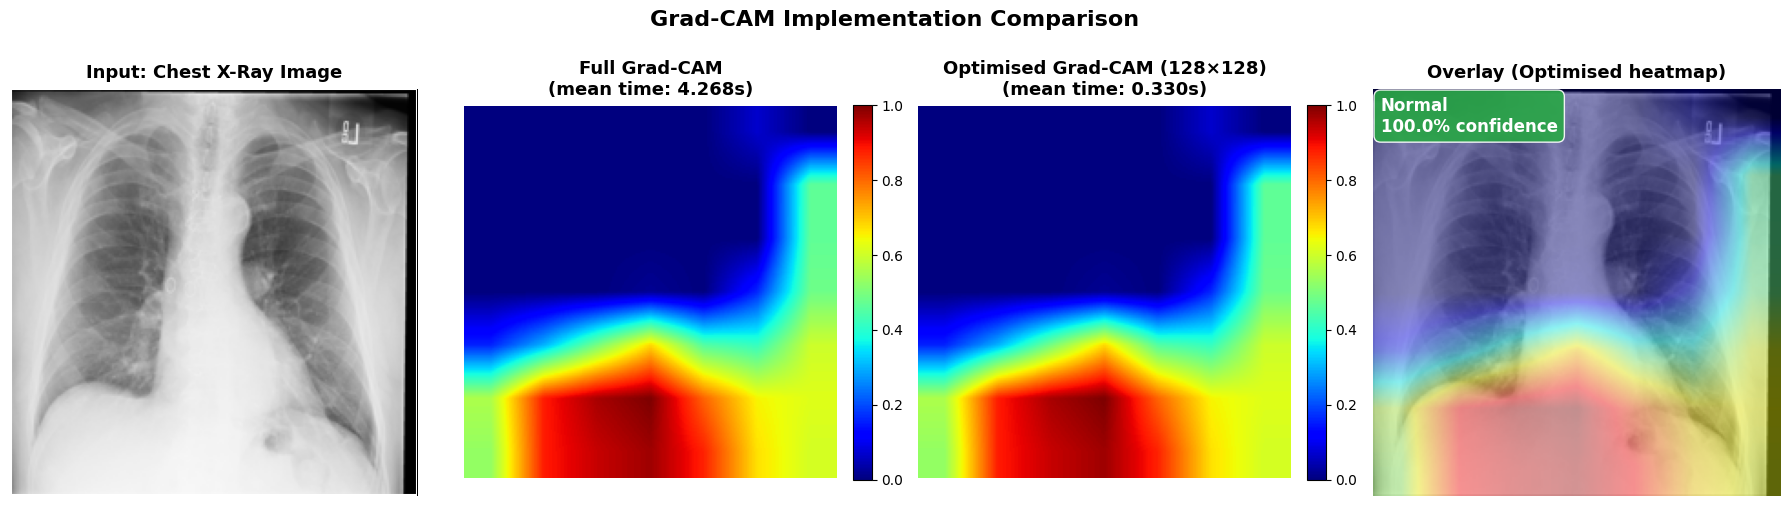


=== GRAD-CAM BENCHMARK SUMMARY ===
Number of images tested: 50
Full Grad-CAM: 4.268 ± 0.962 s (mean ± std)
Optimised Grad-CAM (128×128): 0.330 ± 0.118 s
Speedup (full / optimised): 12.94x
Explanation fidelity: mean correlation = 1.000, mean IoU@0.5 = 1.000


In [ ]:
# Grad-CAM Implementation (Optimised)
import os
import time
import gc
import psutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.efficientnet import preprocess_input
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')



# System Hardware Specifications

cpu_freq = psutil.cpu_freq().current
cpu_cores_phys = psutil.cpu_count(logical=False)
cpu_cores_log = psutil.cpu_count(logical=True)
total_ram_gb = psutil.virtual_memory().total / (1024 ** 3)
print(f"CPU: {cpu_freq:.0f} MHz, {cpu_cores_phys}p/{cpu_cores_log}l cores")
print(f"Total RAM: {total_ram_gb:.2f} GB")


# CONFIGURE COLAB TO MIMIC RASPBERRY PI 4 ENVIRONMENT

PI_CORES = 4        # Quad-core ARM Cortex-A72
PI_CPU_GHZ = 1.5     # 1.5GHz clock speed

print("\nOriginal TensorFlow thread configuration:")
print(f"- Intra-op threads: {tf.config.threading.get_intra_op_parallelism_threads()} (default)")
print(f"- Inter-op threads: {tf.config.threading.get_inter_op_parallelism_threads()} (default)")

print("\nConfiguring Colab to mimic Raspberry Pi 4:")
print(f"- Limiting TensorFlow to use {PI_CORES} threads")
print(f"- Mimicking {PI_CPU_GHZ}GHz clock speed behavior")

os.environ['TF_NUM_INTRAOP_THREADS'] = str(PI_CORES)
os.environ['TF_NUM_INTEROP_THREADS'] = '1'

# Get and display original CPU clock speed
try:
    original_ghz = psutil.cpu_freq().current / 1000
    print(f"\nOriginal CPU clock speed: {original_ghz:.2f} GHz")
    print(f"Target Raspberry Pi clock speed: {PI_CPU_GHZ} GHz")

    clock_factor = original_ghz / PI_CPU_GHZ
    print(f"Clock speed adjustment factor: {clock_factor:.2f}x")
except:
    original_ghz = "N/A"
    clock_factor = 1.5
    print("Could not detect CPU frequency - using default clock speed factor: 1.50x")


## Optimsed Grad-Cam Function.
class OptimisedClinicalGradCAM:
    """
    Minimal, focused Grad-CAM helper:
     - Loads H5 model (for Grad-CAM computation and classification used in overlays)
     - Compiles an optimized (downsampled) tf.function Grad-CAM path
     - Provides full-resolution Grad-CAM (for fidelity baseline) and optimised Grad-CAM
    """

    def __init__(self, h5_path, gradcam_size=(128, 128), target_size=(224, 224), clock_factor=1.0):
        # Use externally-provided clock factor (computed once at top)
        self.clock_factor = clock_factor

        # Load Keras model (used for Grad-CAM and label/confidence for overlay)
        self.h5_model = load_model(h5_path)
        self.target_size = target_size
        self.gradcam_size = gradcam_size

        # Identify last conv layer
        self.last_conv_layer = self._find_last_conv_layer()
        self.grad_model = Model(
            inputs=self.h5_model.inputs,
            outputs=[self.h5_model.get_layer(self.last_conv_layer).output, self.h5_model.output]
        )

        # Determine output type (softmax vs sigmoid)
        out_shape = self.h5_model.output_shape
        self.model_type = "softmax" if len(out_shape) == 2 and out_shape[1] == 2 else "sigmoid"

        # Compile optimized gradcam function
        self._compile_gradcam_function()

    def _find_last_conv_layer(self):
        for layer in reversed(self.h5_model.layers):
            if 'conv' in layer.name.lower() and len(layer.output.shape) == 4:
                return layer.name
        raise ValueError("No suitable convolutional layer found for Grad-CAM")

    def _compile_gradcam_function(self):
        """Compile an efficient Grad-CAM routine that accepts downsampled inputs."""
        @tf.function
        def _gradcam_compiled(input_tensor):
            # input_tensor shape: (1, grad_h, grad_w, 3) OR (1, target_h, target_w, 3)
            with tf.GradientTape() as tape:
                tape.watch(input_tensor)
                conv_output, preds = self.grad_model(input_tensor)
                if self.model_type == "softmax":
                    score = preds[:, 1]    # pneumonia class
                else:
                    score = preds[:, 0]

            grads = tape.gradient(score, conv_output)
            pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
            conv_output = conv_output[0]
            heatmap = tf.tensordot(conv_output, pooled_grads, axes=[[2], [0]])
            heatmap = tf.nn.relu(heatmap)
            heatmap = tf.image.resize(heatmap[..., tf.newaxis], self.target_size)[..., 0]
            return heatmap, preds

        self._gradcam_compiled = _gradcam_compiled
        # Warm-up compile (try with downsampled shape; fallback to target size)
        try:
            dummy = tf.zeros((1, *self.gradcam_size, 3), dtype=tf.float32)
            _ = self._gradcam_compiled(dummy)
        except Exception:
            dummy = tf.zeros((1, *self.target_size, 3), dtype=tf.float32)
            _ = self._gradcam_compiled(dummy)

    def prepare_image(self, img_path):
        img = Image.open(img_path).convert('RGB').resize(self.target_size)
        img_arr = np.array(img, dtype=np.float32)
        img_pre = preprocess_input(img_arr.copy())
        img_keras = np.expand_dims(img_pre, 0).astype(np.float32)
        img_display = np.array(img, dtype=np.uint8)
        return img_keras, img_display

    def generate_optimised_gradcam(self, img_keras):
        """Downsample + compiled tf.function path. Returns (heatmap, preds, elapsed_s)."""
        img_small = tf.image.resize(img_keras, self.gradcam_size, method='bilinear')
        start = time.perf_counter()
        try:
            heatmap_tf, preds = self._gradcam_compiled(img_small)
        except Exception:
            heatmap_tf, preds = self._gradcam_compiled(img_keras)
        elapsed = (time.perf_counter() - start) * self.clock_factor
        heatmap = heatmap_tf.numpy()
        # Normalise
        if heatmap.max() > 0:
            heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
        else:
            heatmap = np.zeros_like(heatmap)
        return heatmap, preds[0], elapsed

    def generate_full_gradcam(self, img_keras):
        """Full-resolution Grad-CAM (baseline). Returns (heatmap, preds, elapsed_s)."""
        input_tensor = tf.convert_to_tensor(img_keras, dtype=tf.float32)
        start = time.perf_counter()
        with tf.GradientTape() as tape:
            tape.watch(input_tensor)
            conv_output, preds = self.grad_model(input_tensor)
            if self.model_type == "softmax":
                score = preds[:, 1]
            else:
                score = preds[:, 0]
        grads = tape.gradient(score, conv_output)
        pooled = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_output = conv_output[0]
        heatmap = tf.tensordot(conv_output, pooled, axes=[[2], [0]])
        heatmap = tf.nn.relu(heatmap)
        heatmap = tf.image.resize(heatmap[..., tf.newaxis], self.target_size)[..., 0]
        elapsed = (time.perf_counter() - start) * self.clock_factor
        heatmap = heatmap.numpy()
        if heatmap.max() > 0:
            heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
        else:
            heatmap = np.zeros_like(heatmap)
        return heatmap, preds[0], elapsed

    def create_overlay(self, original_img, heatmap, alpha=0.4):
        gray = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
        gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
        heatmap_colored = cv2.applyColorMap((heatmap * 255).astype('uint8'), cv2.COLORMAP_JET)
        heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
        overlay = cv2.addWeighted(heatmap_colored, alpha, gray_rgb, 1 - alpha, 0)
        return overlay


def calculate_iou(map1, map2, threshold=0.5):
    b1 = (map1 >= threshold).astype(np.uint8)
    b2 = (map2 >= threshold).astype(np.uint8)
    inter = np.logical_and(b1, b2).sum()
    union = np.logical_or(b1, b2).sum()
    return float(inter / union) if union != 0 else 0.0


def measure_gradcam_overhead_and_visualise(h5_path, test_dir, n_images=50):
    """Measure full vs optimised Grad-CAM on up to n_images and visualise one representative case."""
    gc.collect()
    gradcam = OptimisedClinicalGradCAM(h5_path, clock_factor=clock_factor)

    # Collect image paths
    image_paths = []
    for root, _, files in os.walk(test_dir):
        for f in sorted(files):
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, f))
                if len(image_paths) >= n_images:
                    break
        if len(image_paths) >= n_images:
            break
    if not image_paths:
        raise RuntimeError("No images found in TEST_DIR")

    # For measurements
    full_times = []
    opt_times = []
    fidelity = []

    # Warm-up with first image (compile caches)
    sample = image_paths[0]
    img_keras_w, _ = gradcam.prepare_image(sample)
    _ = gradcam.generate_optimised_gradcam(img_keras_w)
    _ = gradcam.generate_full_gradcam(img_keras_w)

    # Iterate and measure (no TFLite inference here)
    for p in image_paths:
        img_keras, img_display = gradcam.prepare_image(p)

        heat_full, preds_full, t_full = gradcam.generate_full_gradcam(img_keras)
        heat_opt, preds_opt, t_opt = gradcam.generate_optimised_gradcam(img_keras)

        full_times.append(t_full)
        opt_times.append(t_opt)

        # fidelity metrics
        try:
            corr, _ = pearsonr(heat_full.ravel(), heat_opt.ravel())
            iou = calculate_iou(heat_full, heat_opt, threshold=0.5)
        except Exception:
            corr, iou = 0.0, 0.0
        fidelity.append({'correlation': corr, 'iou': iou})

    # Summary statistics
    full_mean, full_std = float(np.mean(full_times)), float(np.std(full_times))
    opt_mean, opt_std = float(np.mean(opt_times)), float(np.std(opt_times))
    speedup = full_mean / opt_mean if opt_mean > 0 else float('inf')
    mean_corr = float(np.mean([m['correlation'] for m in fidelity]))
    mean_iou = float(np.mean([m['iou'] for m in fidelity]))

    # Visualise an image with 4 panels
    # Prepare a representative image
    rep_img = '/content/drive/MyDrive/NIH_processed/test/normal/00000219_002.png'
    img_keras, img_display = gradcam.prepare_image(rep_img)
    heat_full, preds_full, t_full = gradcam.generate_full_gradcam(img_keras)
    heat_opt, preds_opt, t_opt = gradcam.generate_optimised_gradcam(img_keras)

    # Determine diagnosis text from preds_full
    if gradcam.model_type == "softmax":
        normal_prob = float(tf.nn.softmax(np.expand_dims(preds_full, axis=0)).numpy()[0, 0])
        pneumonia_prob = float(tf.nn.softmax(np.expand_dims(preds_full, axis=0)).numpy()[0, 1])
    else:
        pneumonia_prob = float(preds_full)
        normal_prob = 1.0 - pneumonia_prob
    diagnosis = "Pneumonia" if pneumonia_prob > 0.5 else "Normal"
    confidence = (pneumonia_prob if diagnosis == "Pneumonia" else normal_prob) * 100.0

    # Create overlay using optimised heatmap (upsampled in generate_optimised_gradcam)
    overlay = gradcam.create_overlay(img_display, heat_opt)

    # Plot 4 panels in a row with main title centered
    fig, axes = plt.subplots(1, 4, figsize=(18, 5))
    fig.suptitle("Grad-CAM Implementation Comparison", fontsize=16, fontweight='bold', y=1.03)

    axes[0].imshow(img_display)
    axes[0].set_title("Input: Chest X-Ray Image", fontsize=13, fontweight='bold', pad=8)
    axes[0].axis('off')
    axes[0].add_patch(Rectangle((0, 0), gradcam.target_size[0]-1, gradcam.target_size[1]-1,
                               fill=False, edgecolor='white', linewidth=1.5))

    ax1 = axes[1].imshow(heat_full, cmap='jet', vmin=0, vmax=1)
    axes[1].set_title(f"Full Grad-CAM\n(mean time: {full_mean:.3f}s)", fontsize=13, fontweight='bold', pad=8)
    axes[1].axis('off')
    plt.colorbar(ax1, ax=axes[1], fraction=0.046, pad=0.04)

    ax2 = axes[2].imshow(heat_opt, cmap='jet', vmin=0, vmax=1)
    axes[2].set_title(f"Optimised Grad-CAM ({gradcam.gradcam_size[0]}×{gradcam.gradcam_size[1]})\n(mean time: {opt_mean:.3f}s)",
                      fontsize=13, fontweight='bold', pad=8)
    axes[2].axis('off')
    plt.colorbar(ax2, ax=axes[2], fraction=0.046, pad=0.04)

    axes[3].imshow(overlay)
    axes[3].set_title("Overlay (Optimised heatmap)", fontsize=13, fontweight='bold', pad=8)
    axes[3].axis('off')
    # Diagnosis annotation on overlay
    diag_color = '#dc3545' if diagnosis == "Pneumonia" else '#28a745'
    axes[3].text(0.02, 0.98, f'{diagnosis}\n{confidence:.1f}% confidence',
                 transform=axes[3].transAxes, fontsize=12, fontweight='bold',
                 verticalalignment='top', color='white',
                 bbox=dict(boxstyle='round,pad=0.4', facecolor=diag_color, alpha=0.9, edgecolor='white'))

    plt.tight_layout()
    plt.show()

    # Minimal academic-style summary (only the essentials)
    print("\n=== GRAD-CAM BENCHMARK SUMMARY ===")
    print(f"Number of images tested: {len(image_paths)}")
    print(f"Full Grad-CAM: {full_mean:.3f} ± {full_std:.3f} s (mean ± std)")
    print(f"Optimised Grad-CAM ({gradcam.gradcam_size[0]}×{gradcam.gradcam_size[1]}): {opt_mean:.3f} ± {opt_std:.3f} s")
    print(f"Speedup (full / optimised): {speedup:.2f}x")
    print(f"Explanation fidelity: mean correlation = {mean_corr:.3f}, mean IoU@0.5 = {mean_iou:.3f}")

    # Return compact metrics for further programmatic use if desired
    return {
        'n_images': len(image_paths),
        'full_mean_s': full_mean,
        'full_std_s': full_std,
        'opt_mean_s': opt_mean,
        'opt_std_s': opt_std,
        'speedup': speedup,
        'mean_correlation': mean_corr,
        'mean_iou': mean_iou
    }


# -------------------------
# Example driver (adjust paths as needed)
# -------------------------
if __name__ == "__main__":
    H5_MODEL_PATH = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'
    TEST_DIR = '/content/drive/MyDrive/NIH_processed/test'

    # Run the Grad-CAM overhead measurement + visualisation
    metrics = measure_gradcam_overhead_and_visualise(H5_MODEL_PATH, TEST_DIR, n_images=50)

### **Other Explored Methods (Optional)**

#### **LIME**

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=dcc999fd7dcd1af519f12c6c28be9829f16a77087057498a82158ee7701a1ad6
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


Found 512 pneumonia images
Attempt 1: Processing 00023176_007.png


  0%|          | 0/300 [00:00<?, ?it/s]

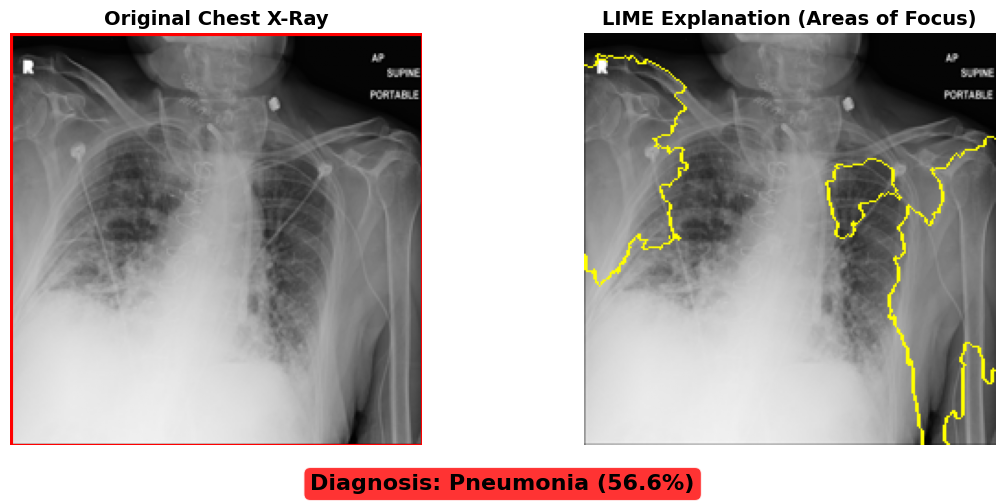

Result: Pneumonia (56.6%)
Pneumonia-positive image successfully explained.


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import random
from PIL import Image
from lime import lime_image
from skimage.segmentation import mark_boundaries
import warnings
warnings.filterwarnings('ignore')

class PneumoniaExplainer:
    """
    Explainable AI for quantized pneumonia detection model using LIME
    """
    def __init__(self, model_path):
        # Load TFLite model
        self.interpreter = tf.lite.Interpreter(model_path=model_path)
        self.interpreter.allocate_tensors()
        self.input_details = self.interpreter.get_input_details()
        self.output_details = self.interpreter.get_output_details()
        self.target_size = (224, 224)

    def predict_fn(self, images):
        """
        Prediction function for LIME
        """
        predictions = []
        for img in images:
            # Preprocess image (same as during training)
            if np.max(img) > 1:
                img = img / 255.0
            img = tf.keras.applications.efficientnet.preprocess_input(img)
            img = np.expand_dims(img, 0).astype(np.float32)

            # Run inference
            self.interpreter.set_tensor(self.input_details[0]['index'], img)
            self.interpreter.invoke()
            output = self.interpreter.get_tensor(self.output_details[0]['index'])

            # Handle different output formats
            if output.shape[1] == 2:  # Softmax
                predictions.append(output[0])
            else:  # Sigmoid
                predictions.append([1 - output[0][0], output[0][0]])

        return np.array(predictions)

    def prepare_image(self, img_path):
        """
        Load and prepare image for display
        """
        img = Image.open(img_path).convert('RGB')
        img = img.resize(self.target_size)
        img_array = np.array(img) / 255.0
        return img_array

    def explain_and_visualize(self, img_path, num_samples=500):
        """
        Generate explanation and visualization for a single image
        """
        # Load and prepare image
        img_array = self.prepare_image(img_path)

        # Create explainer
        explainer = lime_image.LimeImageExplainer()

        # Generate explanation
        explanation = explainer.explain_instance(
            img_array,
            self.predict_fn,
            top_labels=2,
            hide_color=0,
            num_samples=num_samples
        )

        # Get prediction
        prediction = self.predict_fn([img_array])[0]
        if len(prediction) == 2:
            normal_prob, pneumonia_prob = prediction
        else:
            pneumonia_prob = prediction[0]
            normal_prob = 1 - pneumonia_prob

        label = "Pneumonia" if pneumonia_prob > 0.5 else "Normal"
        confidence = pneumonia_prob * 100 if label == "Pneumonia" else normal_prob * 100

        # Create visualization
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Original image
        axes[0].imshow(img_array)
        border_color = 'red' if label == "Pneumonia" else 'green'
        axes[0].add_patch(plt.Rectangle((0, 0), 224, 224, fill=False,
                                      edgecolor=border_color, linewidth=3))
        axes[0].set_title('Original Chest X-Ray', fontsize=14, fontweight='bold')
        axes[0].axis('off')

        # LIME explanation
        temp, mask = explanation.get_image_and_mask(
            explanation.top_labels[0],
            positive_only=True,
            num_features=5,
            hide_rest=False
        )
        axes[1].imshow(mark_boundaries(temp, mask))
        axes[1].set_title('LIME Explanation (Areas of Focus)', fontsize=14, fontweight='bold')
        axes[1].axis('off')

        # Add diagnosis text
        diagnosis_text = f"Diagnosis: {label} ({confidence:.1f}%)"
        info_color = 'red' if label == "Pneumonia" else 'green'
        plt.figtext(0.5, 0.01, diagnosis_text, ha='center', fontsize=16,
                   fontweight='bold', bbox=dict(boxstyle='round', facecolor=info_color,
                                               alpha=0.8, edgecolor='white'))

        plt.tight_layout()
        plt.subplots_adjust(bottom=0.1)
        plt.show()

        return label, confidence

def run_pneumonia_explanation(max_attempts=10):
    MODEL_PATH = '/content/drive/MyDrive/NIH_models/Quantized/EffNetB4_quantized_hybrid.tflite'
    PNEUMONIA_DIR = '/content/drive/MyDrive/NIH_processed/test/pneumonia'

    explainer = PneumoniaExplainer(MODEL_PATH)
    imgs = glob.glob(os.path.join(PNEUMONIA_DIR, '*.png'))

    if not imgs:
        raise FileNotFoundError("No images found in pneumonia directory.")

    print(f"Found {len(imgs)} pneumonia images")

    pneumonia_found = False
    attempts = 0

    for img_path in random.sample(imgs, min(max_attempts, len(imgs))):
        attempts += 1
        print(f"Attempt {attempts}: Processing {os.path.basename(img_path)}")

        label, confidence = explainer.explain_and_visualize(img_path, num_samples=300)
        print(f"Result: {label} ({confidence:.1f}%)")

        if label == "Pneumonia":
            print("Pneumonia-positive image successfully explained.")
            pneumonia_found = True
            break

    if not pneumonia_found:
        print(f"\nWARNING: No pneumonia-positive predictions in {attempts} attempts")

        # Find image with highest pneumonia probability
        print("Finding image with highest pneumonia probability...")
        max_prob = -1
        max_img = None

        for img_path in random.sample(imgs, min(10, len(imgs))):
            img_array = explainer.prepare_image(img_path)
            prediction = explainer.predict_fn([img_array])[0]

            if len(prediction) == 2:
                prob = prediction[1]
            else:
                prob = prediction[0]

            if prob > max_prob:
                max_prob = prob
                max_img = img_path

        print(f"Image with highest pneumonia probability: {max_prob:.4f}")
        explainer.explain_and_visualize(max_img)

if __name__ == "__main__":
    run_pneumonia_explanation()

### **CAM Implementation**

Loading model...
Using conv layer: top_conv
Analyzing pneumonia case: 00006713_001.png


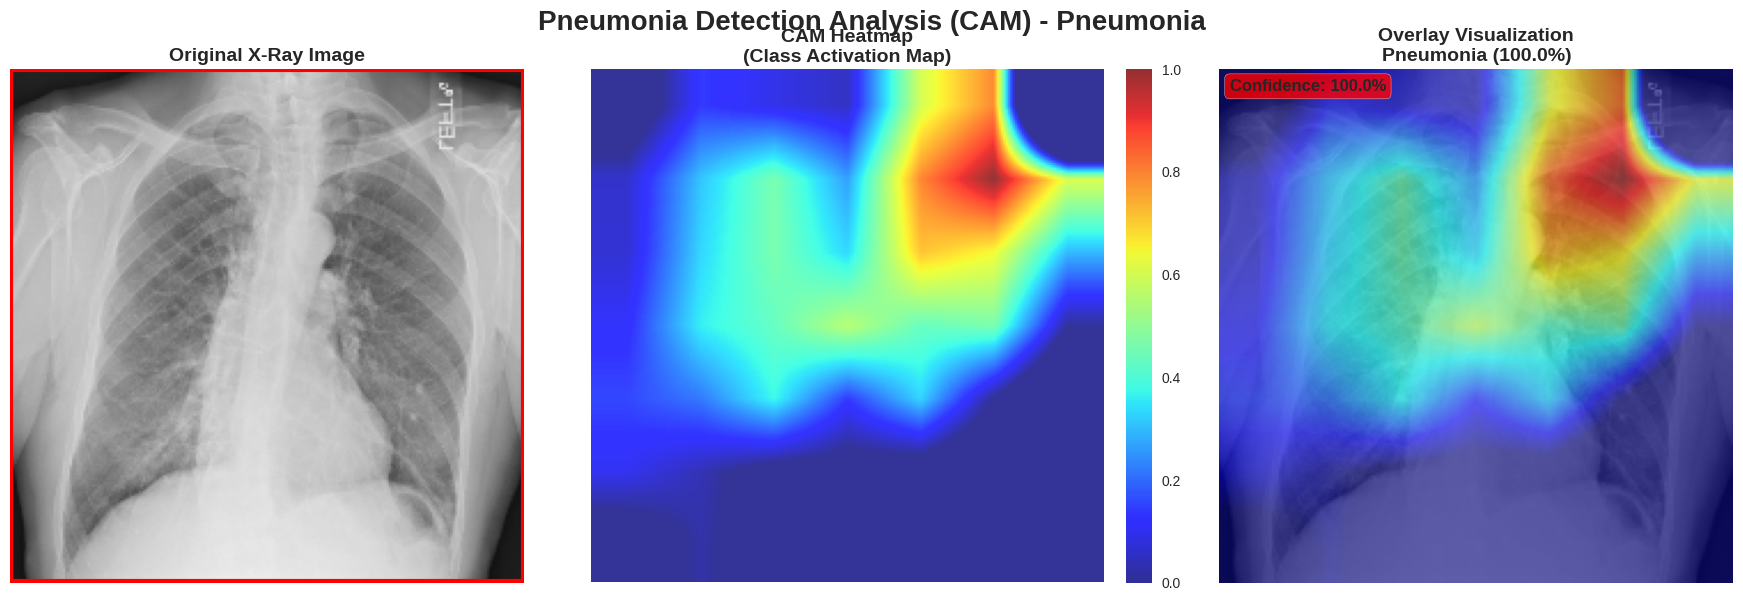


PNEUMONIA DETECTION ANALYSIS RESULTS (CAM)
Image: 00006713_001.png
Prediction: Pneumonia
Confidence: 100.0%
Raw Score: 0.9998


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import random
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Suppress TensorFlow warnings
tf.get_logger().setLevel('ERROR')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class PneumoniaCAM:
    def __init__(self, model_path, target_size=(224, 224)):
        """
        Initialize CAM for pneumonia detection

        Args:
            model_path: Path to the trained model
            target_size: Input image size for the model
        """
        print("Loading model...")
        self.original_model = load_model(model_path, compile=False)
        self.original_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.target_size = target_size
        self.last_conv_layer = self._find_last_conv_layer()
        if self.last_conv_layer is None:
             raise ValueError("Could not find a convolutional layer in the model.")
        print(f"Using conv layer: {self.last_conv_layer.name}")


    def _find_last_conv_layer(self):
        """
        Find the last convolutional layer in the model.
        Handles nested models (like EfficientNet base).
        """
        last_conv = None
        # Iterate through layers in reverse order
        for layer in reversed(self.original_model.layers):
            # Check if it's a nested model
            if hasattr(layer, 'layers'):
                for sublayer in reversed(layer.layers):
                    # Check if it's a Conv2D layer and has a 4D output shape
                    if isinstance(sublayer, tf.keras.layers.Conv2D) and hasattr(sublayer.output, 'shape') and len(sublayer.output.shape) == 4:
                         last_conv = sublayer
                         break
            # Check if it's a top-level Conv2D layer with 4D output shape
            elif isinstance(layer, tf.keras.layers.Conv2D) and hasattr(layer.output, 'shape') and len(layer.output.shape) == 4:
                last_conv = layer
                break

            if last_conv: # Found a layer, break outer loop
                break

        # Fallback: try finding by common names for EfficientNet
        if last_conv is None:
            fallback_names = ['top_conv', 'block7a_expand_conv', 'block6a_expand_conv']
            for name in fallback_names:
                try:
                    layer = self.original_model.get_layer(name)
                    if isinstance(layer, tf.keras.layers.Conv2D) and hasattr(layer.output, 'shape') and len(layer.output.shape) == 4:
                        last_conv = layer
                        break
                except:
                    continue

        return last_conv

    def preprocess_image(self, img_path):
        """
        Preprocess image for model input

        Args:
            img_path: Path to the image

        Returns:
            Preprocessed image array and original image
        """
        # Load and resize image
        img = image.load_img(img_path, target_size=self.target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Also return original image for visualization
        original_img = cv2.imread(img_path)
        original_img = cv2.resize(original_img, self.target_size)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

        return img_array, original_img

    def generate_cam(self, img_array):
        """
        Generate CAM heatmap using a gradient-based approach.

        Args:
            img_array: Preprocessed image array

        Returns:
            CAM heatmap
        """
        # Create a model that maps the input image to the activations of the last conv layer
        grad_model = Model(
            inputs=[self.original_model.inputs],
            outputs=[self.last_conv_layer.output, self.original_model.output]
        )

        # Compute the gradient of the predicted class for our input image
        with tf.GradientTape() as tape:
            conv_outputs, predictions = grad_model(img_array)
            # For binary classification with sigmoid output, use the output directly
            loss = predictions[0][0] # Assuming index 0 is the output neuron for binary classification

        # Extract the gradients
        grads = tape.gradient(loss, conv_outputs)[0]

        # Global average pool the gradients
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

        # Weight the convolutional outputs with the pooled gradients
        conv_outputs = conv_outputs[0]
        cam = conv_outputs @ pooled_grads[..., tf.newaxis]
        cam = tf.squeeze(cam)

        # Normalize and resize
        cam = cv2.resize(cam.numpy(), self.target_size)
        cam = np.maximum(cam, 0)
        if np.max(cam) > np.min(cam):
            cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))
        else:
             cam = np.zeros_like(cam) # Handle case where all values are the same

        return cam


    def create_superimposed_img(self, original_img, heatmap, alpha=0.6):
        """
        Create superimposed image with heatmap overlay

        Args:
            original_img: Original image
            heatmap: CAM heatmap
            alpha: Overlay transparency

        Returns:
            Superimposed image
        """
        # Convert heatmap to RGB
        heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
        heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

        # Superimpose the heatmap on original image
        superimposed_img = heatmap_colored * alpha + original_img * (1 - alpha)

        return superimposed_img.astype(np.uint8)

    def visualize_prediction(self, img_path, save_path=None):
        """
        Create comprehensive visualization of model prediction with CAM

        Args:
            img_path: Path to input image
            save_path: Optional path to save the visualization
        """
        # Preprocess image
        img_array, original_img = self.preprocess_image(img_path)

        # Get prediction
        prediction = self.original_model.predict(img_array, verbose=0)[0][0]
        confidence = prediction * 100 if prediction > 0.5 else (1 - prediction) * 100
        predicted_class = "Pneumonia" if prediction > 0.5 else "Normal"

        # Generate CAM
        heatmap = self.generate_cam(img_array)

        # Create superimposed image
        superimposed_img = self.create_superimposed_img(original_img, heatmap)

        # Create visualization
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Pneumonia Detection Analysis (CAM) - {predicted_class}',
                    fontsize=20, fontweight='bold', y=0.98)

        # Original image
        axes[0].imshow(original_img, cmap='gray')
        axes[0].set_title('Original X-Ray Image', fontsize=14, fontweight='bold')
        axes[0].axis('off')

        # Add border based on prediction
        border_color = 'red' if prediction > 0.5 else 'green'
        border_width = 3
        axes[0].add_patch(Rectangle((0, 0), self.target_size[0]-1, self.target_size[1]-1,
                                  fill=False, edgecolor=border_color, linewidth=border_width))

        # CAM heatmap
        im1 = axes[1].imshow(heatmap, cmap='jet', alpha=0.8)
        axes[1].set_title('CAM Heatmap\n(Class Activation Map)', fontsize=14, fontweight='bold')
        axes[1].axis('off')
        plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

        # Superimposed image
        axes[2].imshow(superimposed_img)
        axes[2].set_title(f'Overlay Visualization\n{predicted_class} ({confidence:.1f}%)',
                         fontsize=14, fontweight='bold')
        axes[2].axis('off')

        # Add confidence indicator
        conf_color = 'red' if prediction > 0.5 else 'green'
        axes[2].text(0.02, 0.98, f'Confidence: {confidence:.1f}%',
                    transform=axes[2].transAxes, fontsize=12, fontweight='bold',
                    verticalalignment='top', bbox=dict(boxstyle='round',
                    facecolor=conf_color, alpha=0.8, edgecolor='white'))

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')

        plt.show()

        return prediction, confidence, heatmap

# Main execution function
def run_cam_analysis():
    """
    Main function to run CAM analysis on pneumonia detection
    """
    # Configuration
    MODEL_PATH = '/content/drive/MyDrive/NIH_models/Results/EffNetB4_epoch_15.h5'
    TEST_DIR = "/content/drive/MyDrive/NIH_processed/test"

    # Initialize CAM
    cam = PneumoniaCAM(MODEL_PATH, target_size=(224, 224))

    # Collect test images
    image_paths = []
    for condition in ['normal', 'pneumonia']:
        condition_path = os.path.join(TEST_DIR, condition)
        if os.path.exists(condition_path):
            images = glob.glob(os.path.join(condition_path, '*.jpeg'))
            images += glob.glob(os.path.join(condition_path, '*.jpg'))
            images += glob.glob(os.path.join(condition_path, '*.png'))
            image_paths.extend(images)

    if not image_paths:
        print("No images found in the test directory!")
        return

    # Select random image (focusing on pneumonia cases as requested)
    pneumonia_images = [path for path in image_paths if 'pneumonia' in path.lower()]

    if pneumonia_images:
        selected_image = random.choice(pneumonia_images)
        print(f"Analyzing pneumonia case: {os.path.basename(selected_image)}")
    else:
        selected_image = random.choice(image_paths)
        print(f"Analyzing random case: {os.path.basename(selected_image)}")

    # Run analysis
    prediction, confidence, heatmap = cam.visualize_prediction(
        selected_image,
        save_path=f'/content/drive/MyDrive/cam_analysis_{os.path.basename(selected_image)}.png'
    )

    # Print results
    print(f"\n{'='*50}")
    print(f"PNEUMONIA DETECTION ANALYSIS RESULTS (CAM)")
    print(f"{'='*50}")
    print(f"Image: {os.path.basename(selected_image)}")
    print(f"Prediction: {'Pneumonia' if prediction > 0.5 else 'Normal'}")
    print(f"Confidence: {confidence:.1f}%")
    print(f"Raw Score: {prediction:.4f}")
    print(f"{'='*50}")

    return cam, selected_image, prediction, confidence

# Run the analysis
if __name__ == "__main__":
    cam, image_path, pred, conf = run_cam_analysis()

# **END OF PROJECT**